<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASES FOR DATA SCIENCE 2022/2023</h1> </center> <br>
<center> <h2> Case study challenge - Monthly sales forecast</h2> </center> <br>
<center> by Siemens Advanta Consulting </center>

</div>

<center> <b>Group C</b>
    
***


|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |     Carolina Costa   |       20220715         | 
| 2    |     Martim Santos    |       20220540         |
| 3    |     Pedro Pereira    |       20220684         | 
| 4    |     Rodrigo Silva    |       20221360         | 
| 5    |     Rúben Serpa      |       20221284         |

# Table of Contents
* [1. Libraries, Functions, Classes,and Colors](#libraries)
* [2. Data Importing](#importing)
* [3. Market Data Reshaping](#heading3)
* [4. Sales Data Reshaping](#heading4)
* [5. Covid Data Reshaping](#heading5)
* [6. Data Exploration and Understanding](#heading6)
    * [6.1. Market Data](#market_data_exploration)
        * [6.1.1. Missing Values](#subtitle6.1.1)
        * [6.1.2. Duplicated Columns/Indexes](#subtitle6.1.2)
        * [6.1.3. Duplicated Values](#subtitle6.1.3)
        * [6.1.4. Checking Inconsistencies](#subtitle6.1.4)
        * [6.1.5. Descriptive Statistics](#subtitle6.1.5)
        * [6.1.6. Visual Exploration](#subtitle6.1.6)
    * [6.2. Sales Data](#sales_exploration)
        * [6.2.1. Missing Values](#subtitle6.2.1)
        * [6.2.2. Duplicated Columns/GCK Sales](#subtitle6.2.2)
        * [6.2.3. Duplicated Values](#subtitle6.2.3)
        * [6.2.4. Outlier Detection](#subtitle6.2.4)
        * [6.2.5. Descriptive Statistics](#subtitle6.2.5)
        * [6.2.6. Stationarity (significance level 1% and ACF AND PACF Analysis](#subtitle6.2.6)
        * [6.2.7. STL Decomposition](#subtitle6.2.7)
        * [6.2.8. Visual Exploration](#subtitle6.2.8)
    * [6.3. Covid Data](#covid_exploration)
        * [6.3.1. Missing Values](#subtitle6.3.1)
        * [6.3.2. Duplicated Columns/ Cases distribution amongst countries](#subtitle6.3.2)
        * [6.3.3. Duplicated Values](#subtitle6.3.3)
        * [6.3.4. Checking Inconsistencies](#subtitle6.3.4)
        * [6.3.5. Descriptive Statistics](#subtitle6.3.5)
        * [6.3.6. Normalizing Cases by 100k Habitants](#subtitle6.3.6)
        * [6.3.7. Visual Exploration](#subtitle6.1.6)
* [7. Data Preprocessing](#preprocessing)
    * [7.1. Fixing Inconsistencies](#subtitle7.1)
    * [7.2. Missing Values Treatment](#subtitle7.3)
    * [7.3. Missing Values Treatment](#subtitle7.2)
    * [7.4. Feature Engineering](#subtitle7.4)
        * [7.4.1. Adding Exogenous Features](#subtitle7.4.1)
        * [7.4.2. Converting to Lag Variables](#subtitle7.4.2)
    * [7.5. Feature Selection](#subtitle7.5)
    * [7.6. Final Dataset Preparation](#subtitle7.6)
* [8. Modelling](#title8)
    * [8.1. Splitting Data/ Defining Target and Independent Variables](#subtitle8.1)
    * [8.2. Validation Time Series Forecasting](#subtitle8.2)
    * [8.3. Test Time Series Forecasting](#subtitle8.3)
* [9. Evaluation](#title9)
    * [Product Group 1](#gck1)
    * [Product Group 3](#gck3)
    * [Product Group 4](#gck4)
    * [Product Group 5](#gck5)
    * [Product Group 6](#gck6)
    * [Product Group 8](#gck8)
    * [Product Group 9](#gck9)
    * [Product Group 11](#gck11)
    * [Product Group 12](#gck12)
    * [Product Group 13](#gck13)
    * [Product Group 14](#gck14)
    * [Product Group 16](#gck16)
    * [Product Group 20](#gck20)
    * [Product Group 36](#gck36)

<hr>
<a class="anchor" id="libraries">
    
# 1. Libraries, Functions, Classes, and Colors
    
</a>

**Libraries**

In [235]:
#!pip install mlxtend
#!pip install xgboost
#!pip install prophet

In [236]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import statistics
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from pmdarima import auto_arima
from prophet import Prophet
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, PredefinedSplit
import itertools
import re

import sys
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import time
import warnings
warnings.filterwarnings("ignore")

**Functions**

In [237]:
# Creating a function to impute missing values using AutoReg model
def forecast_impute_AutoReg(series, lags=5):
    missing = series.isna()
    non_missing = ~missing

    # Checking if there are any missing values in the series
    if missing.any():
        model = AutoReg(series[non_missing], lags=lags, old_names=False)
        results = model.fit()

        # Forecasting the missing values
        forecast = results.predict(start=len(series[non_missing]), end=len(series)-1)
        imputed_series = series.copy()
        imputed_series.loc[missing] = forecast.values
    else:
        imputed_series = series.copy()

    return imputed_series

In [238]:
def hist_box_maker(df,titl, figx, figy):
    num_of_rows = len(df.columns)
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Iterate across axes objects and associate each histogram:
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        if i%2 == 0:
            ax.hist(df[feat], bins = 50, color=main_color)
            ax.set_title(feat,x=-0.3)
            pltiswork=feat
        else:
            sns.boxplot(x=df[pltiswork], ax = ax, color=main_color)
        i+=1    
    title = titl
    plt.suptitle(title,y=0.90)
    plt.show()

In [239]:
# Creating a function to visualize trends and seasonality using the STL (Seasonal and Trend decomposition using Loess) method

def stl_decomposition(df, column):
    """
    Apply STL decomposition to a given column of a dataframe and plot the results.
    
    Args:
        df (pandas.DataFrame): the dataframe containing the data to be analyzed
        column (str): the name of the column to be analyzed
        main_color (str): the color to use for the plot
        
    Returns:
        None
    """
    # Extract the column to be analyzed
    data = df[column]
    
    # Apply STL decomposition
    stl = STL(data, period=12)
    res = stl.fit()
    
    # Plot the results
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,6), squeeze=True)  # set squeeze=True to return a list of axes objects
    
    axes[0, 0].set_title(f'STL decomposition for {column}')
    axes[0, 0].plot(data.index, data.values, label='Original data', color=main_color)
    axes[0, 0].legend(loc='upper left')
    
    axes[0, 1].set_title('Seasonal component')
    axes[0, 1].plot(data.index, res.seasonal, color=main_color)
    
    axes[1, 0].set_title('Trend component')
    axes[1, 0].plot(data.index, res.trend, color=main_color)
    
    axes[1, 1].set_title('Residual component')
    axes[1, 1].plot(data.index, res.resid, color=main_color)
    
    plt.tight_layout()
    plt.show()

In [240]:
# Creating a function to visualize ACF and PACF

def acf_pacf(df, column):
    """
    Apply ACF and PACF to a given column of a dataframe and plot the results.
    
    Args:
        df (pandas.DataFrame): the dataframe containing the data to be analyzed
        column (str): the name of the column to be analyzed
    
    Returns:
        None
    """
    # Extract the column to be analyzed
    data = df[column]
    
    # Plot the results
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,4))
    
    # Plot the autocorrelation function (ACF)
    plot_acf(data, ax=axes[0], lags=20,color=main_color)  # You may need to adjust the 'lags' parameter depending on your data's seasonality
    # Plot the partial autocorrelation function (PACF)
    plot_pacf(data, ax=axes[1], lags=20,color=main_color)  # You may need to adjust the 'lags' parameter depending on your data's seasonality
    
    
    # Set the titles for the subplots
    axes[0].set_title(f'Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for {column}')
    axes[1].set_title("")
    
    plt.tight_layout()
    plt.show()

In [241]:
def correlation_matrix (df, features):
    
    '''
    Pass a dataframe and the dataframe metric features,
    and plots the correlation matrix (all the correlations 
    between the correspondent features).
 
    Arguments:
        df (dataframe): dataframe
        features (list): df metric features
        
    '''
    correlation_df= df[features].corr(method='kendall')
    #calls correlation_matrix_from_corr() function
    correlation_matrix_from_corr(correlation_df)
    return

In [242]:
def correlation_matrix_from_corr(correlation_df):
    
    '''
    Plots the correlation_df in an heatmap format.
 
    Arguments:
        correlation_df (dataframe): dataframe
        
    '''
    
    mask = np.triu(np.ones_like(correlation_df, dtype=bool))
 
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(19, 17))
 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_df, annot = True, mask=mask, cmap=cmap,vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
    plt.title('Correlation Between Variables ', size=20)
    return

In [243]:
# Creating a function to drop columns that contain a certain word in their name

def columns_containing_words(data, words_list):
    """
    Drops columns from the input DataFrame whose names contain any of the specified words.
    
    Parameters:
    - data (pandas DataFrame): The input DataFrame to modify.
    - words_list (list of str): The list of words to search for in the column names.
    
    Returns:
    - data (pandas DataFrame): The modified DataFrame with selected columns dropped.
    """
    # get the list of column names
    cols = data.columns.tolist()
    
    # create a new list of column names that don't contain any of the specified words
    new_cols = [col for col in cols if any(word in col for word in words_list)]

    
    return new_cols


In [244]:
# Creating a function that createas a monthly sales bar chart for each product type 

def plot_monthly_sales_by_product_type(sales_data, product_type):
    # Melt the data to create a "long" format with separate rows for each product
    sales_data_melted = sales_data.melt(id_vars='date', var_name='Product', value_name='Sales')

    # Filter the data to include only the specified product type
    sales_data_filtered = sales_data_melted[sales_data_melted['Product'] == product_type]

    # Group the data by month and calculate the total sales for each group
    sales_by_month = sales_data_filtered.groupby(pd.Grouper(key='date', freq='M')).sum()

    # Format the date string to display only the month and year
    sales_by_month.index = sales_by_month.index.strftime('%b %Y')

    # Create the bar chart for the filtered data
    sns.set_style("darkgrid")
    plt.figure(figsize=(15, 10))
    sns.barplot(x=sales_by_month.index, y='Sales', color= main_color, data=sales_by_month)
    plt.xticks(rotation=45)

    # Set the plot title and axis labels
    plt.title(f"Monthly Sales for {product_type}")
    plt.xlabel("Month")
    plt.ylabel("Sales")

    # Show the plot
    plt.show()


In [245]:
# Function to create lag features
def series_to_supervised(data, n_in_start=1,n_in_end=8, n_out=1, dropnan=True, varNames=None):
    """"
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in_start: Minimum number of lag observations as input (X).
        n_in_end: Maxmum umber of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
        varNames: List of column names (same size as the number of variables).
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in_end, n_in_start-1, -1):
        cols.append(df.shift(i))
        names += [(varNames[j]+'(t-%d)' % (i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(varNames[j]+'(t)' ) for j in range(n_vars)]
        else:
            names += [(varNames[j]+'(t+%d)' % (i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [246]:
def stationarity_verification (df,product_column_name):
    
    #Rolling 
    plt.plot(df[product_column_name], label='Original',color='black')
    plt.plot(df[product_column_name].rolling(window=5, center=False).mean(), label='Rolling Mean',color='#00d7a0')
    plt.plot(df[product_column_name].rolling(window=5, center=False).std(), label='Rolling Std',color='#00557c')
    plt.grid()
    plt.legend()
    plt.figure(figsize=(10, 15))
    plt.show()
    
    #Augmented Dickey–Fuller test:
    #Null Hypothesis: The data is not stationary.
    #Alternative Hypothesis: The data is stationary.
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(df[product_column_name], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return 
    

In [247]:
def plotTrainValidation(y_train,y_val=None,y_pred=None):
    title='Train and Validation sets for '+y_train.columns[0]
    plt.figure(figsize=(15,5))
    plt.title(title, size=12)
    
    plt.plot(y_train, label='Training set',color='black')
    if y_val is not None:
        plt.plot(y_val, label='Validation set', color='#00d7a0')
    
    if y_pred is not None:
        plt.plot(y_pred, label='Prediction set', color='#9C332D')
    plt.legend();

In [248]:
# Function to create dataframe with metrics

def performanceMetricsDF(metricsObj, yTrain=None, yPredTrain=None, yTest=None, 
                         yPredTest=None, set1="Train", set2="Test"):
    measures_list = ["MAE", "RMSE", "R^2", "MAPE (%)", "MAX Error"]
    if yTrain is not None:
        train_results = [
            np.round(metricsObj.mean_absolute_error(yTrain, yPredTrain),3),
            np.round(np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),3),
            np.round(metricsObj.r2_score(yTrain, yPredTrain),3),
            np.round(metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),3),
            np.round(metricsObj.max_error(yTrain, yPredTrain),3),
        ]
    if yTest is not None:
        test_results = [
            np.round(metricsObj.mean_absolute_error(yTest, yPredTest),3),
            np.round(np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),3),
            np.round(metricsObj.r2_score(yTest, yPredTest),3),
            np.round(metricsObj.mean_absolute_percentage_error(yTest, yPredTest),3),
            np.round(metricsObj.max_error(yTest, yPredTest),3)
        ]
    if (yTrain is not None) and (yTest is not None):
        resultsDF = pd.DataFrame(
            {"Measure": measures_list, set1: train_results, set2: test_results}
        )
    if (yTrain is None) and (yTest is not None):
        resultsDF = pd.DataFrame(
            {"Measure": measures_list, set2: test_results}
        )
    if (yTrain is not None) and (yTest is None):
        resultsDF = pd.DataFrame(
            {"Measure": measures_list, set1: train_results}
        )

    return resultsDF

In [249]:
def xgboostModel_predict_months(xgboost,X_train,y_train,months_to_predict):
    predictions=[]
    #For each month that needs predictions, a walking forward approach is taken.
    for month in range(1,months_to_predict+1):
        new_date= X_train.index.max()+ pd.DateOffset(1)+pd.offsets.MonthEnd(1)

        row_to_input={}
        #the lag is taken from each column's name and retrieved the original value from the no lag dataframes
        for column in X_train.columns:
            column_withoutlag= column.split("(")[0]
            #extract lag 
            match1 = re.search(r'\(t-(\d+)\)', column)
            number_lags = int(match1.group(1))
            
            date_from_lag=new_date + pd.DateOffset(days=1)- pd.DateOffset(months=number_lags+1)+pd.offsets.MonthEnd(1)

            if 'GCK' not in column:
                row_to_input[column] = market_data.loc[date_from_lag,column_withoutlag]
            else:
                row_to_input[column] = y_train.loc[date_from_lag,column_withoutlag+"(t)"]
        
       
        row_to_input = pd.DataFrame(row_to_input, index=[new_date], columns=X_train.columns)
        
        #the model is fitted on the current X_Train and y_Train
        xgboost.fit(X_train, y_train)
        prediction=xgboost.predict(row_to_input)[0]
        predictions.append(prediction)
        # the training dataframes are updated with the predicted value and the correspoding lag features
        X_train= X_train.append(row_to_input)
        y_train.loc[new_date] =prediction
    return X_train,y_train,predictions

**Classes**

In [250]:
class ProductsEnsemble:
 
    def __init__(self, estimators, holidays_prophet): 
        """
        Estimators list is required, with tuples format (estimator_name,estimator). They can be preffit or not.
        """
        self.estimators = estimators
        self.holidays_prophet = holidays_prophet
    
    def fit_predict_all(self, X_train_list,y_train_list,X_test_list,y_test_list):
        """ 
        For each estimator and the respective X_train and y_train,
        assuming the same order, the model is trained with the dependent and target variables.
        The model returns the predictions regarding the dependent variables.
        """
        predictions_list=[]
        for ((name,estimator),X_train, y_train,X_test,y_test) in zip(self.estimators,X_train_list,y_train_list,X_test_list,y_test_list):
            forecasts={}
            if 'mean' in estimator:
                # Use the mean of the training data as a forecast
                predictions =np.full(len(y_test),np.mean(y_train))
                forecasts['mean']=predictions
                
            if 'median' in estimator:
                # Use the median of the training data as a forecast
                predictions =np.full(len(y_test),np.median(y_train))
                forecasts['median']=predictions
                
            if 'prophet' in estimator:
                # Use Facebook Prophet to make a forecast
        
                # mapping 'date' indexes as columns 'ds'.
                prophet_train_data=y_train.reset_index().rename(columns={'date':'ds',y_train.columns[0]:"y"})
                prophet_test_data=y_test.reset_index().rename(columns={'date':'ds',y_train.columns[0]:"y"})
                
                #prophet object is created with holidays feature being used. 
                prophet=Prophet(holidays=holidays_prophet)
                # fitting prophet with training data and regressors
                #print(prophet_train_data)
                prophet.fit(prophet_train_data)
                #predicting validation data
                predictions= prophet.predict(prophet_test_data)['yhat'].values
                forecasts['prophet']=predictions
                
            if 'prophet_w_reg' in estimator:
                # Use Facebook Prophet with exogenous regressors to make a forecast
        
                # Defining external variables. The lags of the product sales are not included.
                regressors_prophet = [regressor for regressor in X_train.columns if "GCK" not in regressor]
                
                prod_col=y_train.columns[0]
                # joining x and y features of train/validation, with columns date as 'ds' and product as 'y'
                prophet_train_data = y_train.merge(X_train[regressors_prophet], how='left', on="date").reset_index().rename(
                    columns={'date': 'ds', prod_col: "y"})
                prophet_test_data = y_test.merge(X_test[regressors_prophet], how='left', on="date").reset_index().rename(
                    columns={'date': 'ds', prod_col: "y"})
                #prophet object is created with holidays feature being used. 
                prophet_w_reg=Prophet(holidays=holidays_prophet)
                # Adding external variables as regressors. The lags of the product sales are not included.
                for regressor in regressors_prophet:
                    if "GCK" not in regressor:
                        prophet_w_reg.add_regressor(regressor)
                        
                # fitting prophet with training data and regressors
                prophet_w_reg.fit(prophet_train_data)
                #predicting validation data
                predictions = prophet_w_reg.predict(prophet_test_data)['yhat'].values
                forecasts['prophet_w_reg']=predictions
                
            if 'arima' in estimator:
                # Use Arima to make a forecast
        
                # fitting Arima with training datas
                arima = auto_arima(y_train,start_p=1,start_q=1, trace=False,stationary=True, 
                           steperror_action='ignore', suppress_warnings=True)
                # make prediction for the validation
                predictions = arima.predict(n_periods=len(y_test))
                forecasts['arima']=predictions
            
        
            if 'arima_w_reg' in estimator:
                # Use Arima with exogenous regressors to make a forecast
        
                # Defining external variables. The lags of the product sales are not included.
                regressors_arima = [regressor for regressor in X_train.columns if "GCK" not in regressor]

                # fitting Arima with training data and regressors
                arima_w_reg = auto_arima(y_train, X_train[regressors_arima],start_p=1,start_q=1,stationary=True, trace=False, steperror_action='ignore', suppress_warnings=True)
                # make prediction for the validation
                predictions = arima_w_reg.predict(n_periods=len(y_test), X=X_test[regressors_arima])
                forecasts['arima_w_reg']=predictions
            
            if 'xgboost' in estimator:
                values= estimator.split("(")
                values=values[1].split(")")[0]
                # Use XGBoost with exogenous regressors to make a forecast
                 
                # Drop null values, since this model uses the sales lag features
                X_train_xgboost= X_train.dropna()
                y_train_xgboost = y_train.loc[X_train_xgboost.index].copy()

                n_estimators,max_depth,learning_rate=values.split(",")
                # Use XGBoost with exogenous regressors to make a forecast
                xgboost=xgb.XGBRegressor(n_estimators=int(n_estimators),
                                         max_depth=int(max_depth),
                                         learning_rate=float(learning_rate))

                # fit the model object to the training data
                _,_,predictions = xgboostModel_predict_months(xgboost,X_train_xgboost,y_train_xgboost,len(y_test))
                forecasts['xgboost']=predictions
                    
            if 'ensemble' in estimator:
                # get models from ensemble name
                models_list= estimator[9:len(estimator)-1]
                models_list = models_list.split(";")
                # Calculate the ensemble forecast for the current combination
                predictions = sum(forecasts[forecast] for forecast in forecasts.keys()) / len(forecasts.keys())
            else:
                # if is not ensemble only adds the first and only predictions to the predictions_list
                predictions= list(forecasts.values())[0]
      
            predictions_list.append(pd.DataFrame(predictions,index=y_test.index))
        
        return predictions_list
   
    

**Colours**

In [251]:
color_palette = ['#00557c', '#009490', '#00c1b6', '#00d7aC', '#ffa600', '#f95d6a','#1abc9c','#f1c40f','#8e44ad']

main_color= '#009490'

<hr>
<a class="anchor" id="importing">
    
# 2. Data Importing
    
</a>

In [252]:
# The data is imported using pandas

# Market Data seems misshaped when opening in Excel, so is imported without automatic header detection.
market_data = pd.read_excel('Case3_Market data.xlsx',header=None)

# Market, Sales and Covid Data have not the correct formats for forecast so,
## The datasets are reshaped on sections 3, 4 and 5.
sales_data = pd.read_csv('Case3_Sales data.csv',sep=";")

# Source: 
# https://github.com/owid/covid-19-data
# https://github.com/OxCGRT/covid-policy-tracker
covid_data = pd.read_csv('Case3_Covid data.csv',sep=",")

# Import inflation data
# Source: https://www.destatis.de/EN/Themes/Economy/Prices/Consumer-Price-Index/_node.html#sprg481842

inflation_data= pd.read_csv("Case3_Inflation_Germany.csv",sep=";")

# Import GDP data
# Source: https://fred.stlouisfed.org/series/CPMNACNSAB1GQDE

gdp_data = pd.read_csv("Case3_GDP.csv")

# Using Bavaria's school holidays because is where Siemen's headquarters is located.
# Source: https://www.iamexpat.de/education/primary-secondary-education/school-holiday-dates-germany
#This dataset will be explored on section 7
holidays = pd.read_csv("Case3_SchoolHolidays.csv",sep=";")

#Import Test Data
test_data= pd.read_csv("Case3_Test Set Template.csv",sep=";")

Before moving to the [Data Exploration and Understanding](#exploration), the ***market_data***, ***sales_data*** and ***covid_data*** are reshaped to possibilitate a correct analysis.

<hr>
<a class="anchor" id="heading3">
    
# 3. Market Data Reshaping
    
</a>

In [253]:
market_data.head(4)
#Rows 0, 1 and 2 can be joined to form new columns based on index and 

0   \
0                                      NaN   
1  Index 2010=100 (if not otherwise noted)   
2                                     date   
3                                   2004m2   

                                         1   \
0                                     China   
1  Production Index Machinery & Electricals   
2                            MAB_ELE_PRO156   
3                                 16.940704   

                                        2   \
0                                    China   
1  Shipments Index Machinery & Electricals   
2                           MAB_ELE_SHP156   
3                                16.940704   

                                         3   \
0                                    France   
1  Production Index Machinery & Electricals   
2                            MAB_ELE_PRO250   
3                                112.091273   

                                        4   \
0                                   France   
1  Shipments Index Machinery & Electricals   
2                           MAB_ELE_SHP250   
3                                83.458866   

                                         5   \
0                                   Germany   
1  Production Index Machinery & Electricals   
2                            MAB_ELE_PRO276   
3                                 82.623037   

                                        6   \
0                                  Germany   
1  Shipments Index Machinery & Electricals   
2                           MAB_ELE_SHP276   
3                                79.452532   

                                         7   \
0                                     Italy   
1  Production Index Machinery & Electricals   
2                            MAB_ELE_PRO380   
3                                124.289603   

                                        8   \
0                                    Italy   
1  Shipments Index Machinery & Electricals   
2                           MAB_ELE_SHP380   
3                                86.560493   

                                         9   ...  \
0                                     Japan  ...   
1  Production Index Machinery & Electricals  ...   
2                            MAB_ELE_PRO392  ...   
3                                 109.33401  ...   

                                       38  \
0                        production index   
1  France: Machinery and equipment n.e.c.   
2                            PRO28250_org   
3                              118.274109   

                                        39  \
0                         production index   
1  Germany: Machinery and equipment n.e.c.   
2                             PRO28276_org   
3                                 80.82901   

                                    40                           41  \
0                     production index             production index   
1  United States: Electrical equipment  World: Electrical equipment   
2                         PRO27840_org                PRO271000_org   
3                           117.723991                          NaN   

                                  42                                    43  \
0                   production index                      production index   
1  Switzerland: Electrical equipment  United Kingdom: Electrical equipment   
2                       PRO27756_org                          PRO27826_org   
3                               81.1                            120.706516   

                            44                           45  \
0             production index             production index   
1  Italy: Electrical equipment  Japan: Electrical equipment   
2                 PRO27380_org                 PRO27392_org   
3                   141.510864                   106.161262   

                             46                             47  
0              production index               production index  
1  France: Electrical equipmen

In [254]:
# Mapping Empty cells to Nans
market_data.replace("",np.NaN,inplace=True)

In [255]:
# In case there is any extra space in the values (either to the left or to the right), they are removed.
market_data = market_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [256]:
#Checking for possible Columns names relationships.
pd.DataFrame(market_data.iloc[0:3,:].T).rename(columns={0:"Row 1",1:"Row 2",3:"Row 3"})

Row 1                                           Row 2  \
0                NaN         Index 2010=100 (if not otherwise noted)   
1              China        Production Index Machinery & Electricals   
2              China         Shipments Index Machinery & Electricals   
3             France        Production Index Machinery & Electricals   
4             France         Shipments Index Machinery & Electricals   
5            Germany        Production Index Machinery & Electricals   
6            Germany         Shipments Index Machinery & Electricals   
7              Italy        Production Index Machinery & Electricals   
8              Italy         Shipments Index Machinery & Electricals   
9              Japan        Production Index Machinery & Electricals   
10             Japan         Shipments Index Machinery & Electricals   
11       Switzerland        Production Index Machinery & Electricals   
12       Switzerland         Shipments Index Machinery & Electricals   
13    United Kingdom        Production Index Machinery & Electricals   
14    United Kingdom         Shipments Index Machinery & Electricals   
15     United States        Production Index Machinery & Electricals   
16     United States         Shipments Index Machinery & Electricals   
17            Europe        Production Index Machinery & Electricals   
18            Europe         Shipments Index Machinery & Electricals   
19               NaN                     World: Price of Base Metals   
20               NaN                          World: Price of Energy   
21               NaN              World: Price of Metals  & Minerals   
22               NaN               World: Price of Natural gas index   
23               NaN              World: Price of Crude oil, average   
24               NaN                          World: Price of Copper   
25               NaN                       United States: EUR in LCU   
26   Producer Prices             United States: Electrical equipment   
27   Producer Prices            United Kingdom: Electrical equipment   
28   Producer Prices                     Italy: Electrical equipment   
29   Producer Prices                    France: Electrical equipment   
30   Producer Prices                   Germany: Electrical equipment   
31   Producer Prices                     China: Electrical equipment   
32  production index   United States: Machinery and equipment n.e.c.   
33  production index           World: Machinery and equipment n.e.c.   
34  production index     Switzerland: Machinery and equipment n.e.c.   
35  production index  United Kingdom: Machinery and equipment n.e.c.   
36  production index           Italy: Machinery and equipment n.e.c.   
37  production index           Japan: Machinery and equipment n.e.c.   
38  production index          France: Machinery and equipment n.e.c.   
39  production index         Germany: Machinery and equipment n.e.c.   
40  production index             United States: Electrical equipment   
41  production index                     World: Electrical equipment   
42  production index               Switzerland: Electrical equipment   
43  production index            United Kingdom: Electrical equipment   
44  production index                     Italy: Electrical equipment   
45  production index                     Japan: Electrical equipment   
46  production index                    France: Electrical equipment   
47  production index                   Germany: Electrical equipment   

                         2  
0                     date  
1           MAB_ELE_PRO156  
2           MAB_ELE_SHP156  
3           MAB_ELE_PRO250  
4           MAB_ELE_SHP250  
5           MAB_ELE_PRO276  
6           MAB_ELE_SHP276  
7           MAB_ELE_PRO380  
8           MAB_ELE_SHP380  
9           MAB_ELE_PRO392  
10          MAB_ELE_SHP392  
11          MAB_ELE_PRO756  
12          MAB_ELE_SHP756  
13          MAB_ELE_PRO826  
14          MAB_ELE_SHP826  
15          MAB_ELE_PR

In [257]:
#From columns 1 to 18, location is on the first row and the index on the second.
location_on_first_row_columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

#From columns 19 to 47, location is joined to the second row through ":".
location_on_second_row_columns=np.arange(19,48)
producer_prices_columns=[26,27,28,29,30,31]
production_indexes_columns=[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]
#Eur in lcu will be replaced by EUR/USD
eur_in_lcu = 25

# For each column, in in each of the referred columns, proceeds to do the necessary transformation,
# to join the index name with the location as Index Name_Location

new_row=[]
for each_column in market_data.columns:
    
    if each_column in location_on_first_row_columns:
        new_row.append(market_data.iloc[1,each_column].title()+"_"+market_data.iloc[0,each_column].title())
        
    if each_column in location_on_second_row_columns:
        location=market_data.iloc[1,each_column].split(": ")[0].title()
        index=market_data.iloc[1,each_column].split(": ")[1].title()
        
        if each_column in producer_prices_columns:
            index="Producer Prices "+index
            
        if each_column in production_indexes_columns:
            index="Production Index "+index
            
        if each_column==eur_in_lcu:
            location="World"
            index="EUR/USD"
            
        new_row.append(index+"_"+location)

In [258]:
# Replace unnecessary third row with the new one.
market_data.iloc[2,1:]=new_row
# Define the new row as columns and deleted the older ones.
market_data.columns=market_data.iloc[2,:]
market_data.drop([0,1,2],inplace=True)

# Map the date column, in datetime type
market_data['date'] = pd.to_datetime(market_data['date'].str.split('m', expand=True)[0] + '-' +
                                     market_data['date'].str.split('m', expand=True)[1] + '-1',
                                     format="%Y-%m-%d") + pd.offsets.MonthEnd(1)

#Set the date column as index
market_data.set_index(keys="date",drop=True,inplace=True)
market_data.columns.name = ''
# Map all the values to numeric, since they are values.
market_data = market_data.apply(pd.to_numeric)
#Reorder Columns by name
market_data = market_data.reindex(sorted(market_data.columns), axis=1)

In [259]:
market_data.head(3)

EUR/USD_World  Price Of Base Metals_World  Price Of Copper_World  \
date                                                                           
2004-02-29         1.2646                   54.039811              36.623832   
2004-03-31         1.2262                   54.666162              39.931055   
2004-04-30         1.1985                   54.872715              39.134854   

            Price Of Crude Oil, Average_World  Price Of Energy_World  \
date                                                                   
2004-02-29                          39.639458              44.123338   
2004-03-31                          42.592034              47.588957   
2004-04-30                          42.650637              47.779013   

            Price Of Metals  & Minerals_World  \
date                                            
2004-02-29                          48.747945   
2004-03-31                          49.256157   
2004-04-30                          49.423751   

            Price Of Natural Gas Index_World  \
date                                           
2004-02-29                         87.076974   
2004-03-31                         87.192705   
2004-04-30                         91.379923   

            Producer Prices Electrical Equipment_China  \
date                                                     
2004-02-29                                         NaN   
2004-03-31                                         NaN   
2004-04-30                                         NaN   

            Producer Prices Electrical Equipment_France  \
date                                                      
2004-02-29                                          NaN   
2004-03-31                                          NaN   
2004-04-30                                          NaN   

            Producer Prices Electrical Equipment_Germany  ...  \
date                                                      ...   
2004-02-29                                     93.230453  ...   
2004-03-31                                     93.335678  ...   
2004-04-30                                     93.440903  ...   

            Production Index Machinery And Equipment N.E.C._World  \
date                                                                
2004-02-29                                          97.597374       
2004-03-31                                         113.224892       
2004-04-30                                         100.169090       

            Shipments Index Machinery & Electricals_China  \
date                                                        
2004-02-29                                      16.940704   
2004-03-31                                      23.711852   
2004-04-30                                      24.435235   

            Shipments Index Machinery & Electricals_Europe  \
date                                                         
2004-02-29                                       80.098530   
2004-03-31                                       96.015929   
2004-04-30                                       85.167236   

            Shipments Index Machinery & Electricals_France  \
date                                                         
2004-02-29                                       83.458866   
2004-03-31                                      106.168192   
2004-04-30                                       92.007646   

            Shipments Index Machinery & Electricals_Germany  \
date                                                          
2004-02-29                                        79.452532   
2004-03-31                                        97.012918   
2004-04-30                                        84.932358   

            Shipments Index Machinery & Electricals_Italy  \
date                                                        
2004-02-29                                      86.560493   
2004-03-31                                     106.344544   
2004-04-30      

In [260]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2004-02-29 to 2022-04-30
Data columns (total 47 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   EUR/USD_World                                                   219 non-null    float64
 1   Price Of Base Metals_World                                      219 non-null    float64
 2   Price Of Copper_World                                           219 non-null    float64
 3   Price Of Crude Oil, Average_World                               219 non-null    float64
 4   Price Of Energy_World                                           219 non-null    float64
 5   Price Of Metals  & Minerals_World                               219 non-null    float64
 6   Price Of Natural Gas Index_World                                219 non-null    float64
 7   Producer Prices Electrical Equipme

In [261]:
market_data.head()

EUR/USD_World  Price Of Base Metals_World  Price Of Copper_World  \
date                                                                           
2004-02-29         1.2646                   54.039811              36.623832   
2004-03-31         1.2262                   54.666162              39.931055   
2004-04-30         1.1985                   54.872715              39.134854   
2004-05-31         1.2007                   51.230356              36.278433   
2004-06-30         1.2138                   52.876331              35.657380   

            Price Of Crude Oil, Average_World  Price Of Energy_World  \
date                                                                   
2004-02-29                          39.639458              44.123338   
2004-03-31                          42.592034              47.588957   
2004-04-30                          42.650637              47.779013   
2004-05-31                          47.517121              53.590898   
2004-06-30                          44.967605              50.799575   

            Price Of Metals  & Minerals_World  \
date                                            
2004-02-29                          48.747945   
2004-03-31                          49.256157   
2004-04-30                          49.423751   
2004-05-31                          46.468392   
2004-06-30                          47.803913   

            Price Of Natural Gas Index_World  \
date                                           
2004-02-29                         87.076974   
2004-03-31                         87.192705   
2004-04-30                         91.379923   
2004-05-31                         99.044520   
2004-06-30                         98.636267   

            Producer Prices Electrical Equipment_China  \
date                                                     
2004-02-29                                         NaN   
2004-03-31                                         NaN   
2004-04-30                                         NaN   
2004-05-31                                         NaN   
2004-06-30                                         NaN   

            Producer Prices Electrical Equipment_France  \
date                                                      
2004-02-29                                          NaN   
2004-03-31                                          NaN   
2004-04-30                                          NaN   
2004-05-31                                          NaN   
2004-06-30                                          NaN   

            Producer Prices Electrical Equipment_Germany  ...  \
date                                                      ...   
2004-02-29                                     93.230453  ...   
2004-03-31                                     93.335678  ...   
2004-04-30                                     93.440903  ...   
2004-05-31                                     93.546127  ...   
2004-06-30                                     93.440903  ...   

            Production Index Machinery And Equipment N.E.C._World  \
date                                                                
2004-02-29                                          97.597374       
2004-03-31                                         113.224892       
2004-04-30                                         100.169090       
2004-05-31                                          99.581436       
2004-06-30                                         109.277710       

            Shipments Index Machinery & Electricals_China  \
date                                                        
2004-02-29                                      16.940704   
2004-03-31                                      23.711852   
2004-04-30                                      24.435235   
2004-05-31                                      23.708115   
2004-06-30                                      27.009138   

            Shipments Index Machinery & Electricals_Europe  \
date          

<hr>
<a class="anchor" id="heading4">
    
# 4. Sales Data Reshaping
    
</a>

In [262]:
print(sales_data.info())
sales_data.tail(3)
# Date is not in the correct data type.
# Columns Mapped_GCK and Sales can be extended as unique sales columns (i.e. GCK_1,GCK_2,GCK_3,...)
# Sales is not in number format due to incorrect decimal divisor (,)

#Since the sales data is intended to be analysed in a monthly spectrum, the data will be grouped by month.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB
None


DATE Mapped_GCK Sales_EUR
9799  12.08.2019        #12         0
9800  28.08.2019         #8  43763,91
9801  27.08.2019         #8         0

In [263]:
# Mapping Empty cells to Nans
sales_data.replace("",np.NaN,inplace=True)

In [264]:
# In case there is any extra space in the values (either to the left or to the right), they are removed.
sales_data = sales_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [265]:
# Mappig Mapped_GCK values to GCK_number
sales_data['Mapped_GCK'] = "GCK_"+sales_data['Mapped_GCK'].str.replace('#', '')
# Replacing "," by "." to enable numeric datatype
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].str.replace(',', '.')

In [266]:
# Pivoting to the desired format, columns as GCKs and values as Sales
sales_data['date'] = pd.to_datetime(sales_data['DATE'], format='%d.%m.%Y') 
sales_data=sales_data.pivot(index="date",columns="Mapped_GCK",values="Sales_EUR")

In [267]:
# Map all the values to numeric, since they are sales values.
sales_data = sales_data.apply(pd.to_numeric)
#Reorder Columns by name
desired_order = ['GCK_1', 'GCK_3', 'GCK_4', 'GCK_5', 'GCK_6', 'GCK_8', 'GCK_9', 
                 'GCK_11', 'GCK_12', 'GCK_13', 'GCK_14', 'GCK_16', 'GCK_20', 'GCK_36']
sales_data = sales_data[desired_order]

In [268]:
# Aggregating dataset by month, and applying sum to all days
sales_data=sales_data.resample('M').sum()

In [269]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-31 to 2022-04-30
Freq: M
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GCK_1   43 non-null     float64
 1   GCK_3   43 non-null     float64
 2   GCK_4   43 non-null     float64
 3   GCK_5   43 non-null     float64
 4   GCK_6   43 non-null     float64
 5   GCK_8   43 non-null     float64
 6   GCK_9   43 non-null     float64
 7   GCK_11  43 non-null     float64
 8   GCK_12  43 non-null     float64
 9   GCK_13  43 non-null     float64
 10  GCK_14  43 non-null     float64
 11  GCK_16  43 non-null     float64
 12  GCK_20  43 non-null     float64
 13  GCK_36  43 non-null     float64
dtypes: float64(14)
memory usage: 5.0 KB


In [270]:
sales_data.tail()

Mapped_GCK        GCK_1        GCK_3      GCK_4        GCK_5      GCK_6  \
date                                                                      
2021-12-31  33950069.83  12376414.58  199188.75   8656479.64  190074.96   
2022-01-31  37942942.06  13754291.32  283630.81   7731408.33  157670.31   
2022-02-28  36293076.33  15665217.47  245306.13   7675455.55  391088.30   
2022-03-31  40220407.03  14320304.55  406399.83  14739187.18  316132.21   
2022-04-30  41053203.12  11999374.51  302057.04   8884607.53  333705.61   

Mapped_GCK       GCK_8    GCK_9      GCK_11     GCK_12    GCK_13    GCK_14  \
date                                                                         
2021-12-31  2655036.78  14935.2  2645689.71  322647.82  24868.86  17427.60   
2022-01-31  1208090.29   2064.7  1054580.98  147680.18  37972.81   2820.00   
2022-02-28  1239171.41    901.5   964672.32  312165.52  33449.25   4410.00   
2022-03-31  1873520.38   4452.6  2284958.40  343523.42  12149.40  46100.24   
2022-04-30  1336220.96   3285.0  1126268.66  178141.00  17020.04   1846.20   

Mapped_GCK     GCK_16   GCK_20    GCK_36  
date                                      
2021-12-31  271111.39   156.00  48933.50  
2022-01-31   91021.89     0.00   6014.39  
2022-02-28   45696.76   589.50  29869.50  
2022-03-31   98729.91  2885.08   2564.85  
2022-04-30  134071.24  6280.63  17029.47

<hr>
<a class="anchor" id="heading5">
    
# 5. Covid Data Reshaping
    
</a>

In [271]:
print(covid_data.info())
covid_data.tail(3)
# Date is not in the correct data type.
# The only necessary columns are date, location, new_cases, new_deaths and
# the columns will be extended to the format date,new_cases_country1,new_deaths_country1,new_cases_country2,...

#Since the sales data is intended to be analysed in a monthly spectrum, the data will be grouped by month.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306057 entries, 0 to 306056
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    306057 non-null  object 
 1   continent                                   291537 non-null  object 
 2   location                                    306057 non-null  object 
 3   date                                        306057 non-null  object 
 4   total_cases                                 270197 non-null  float64
 5   new_cases                                   297465 non-null  float64
 6   new_cases_smoothed                          296201 non-null  float64
 7   total_deaths                                249686 non-null  float64
 8   new_deaths                                  297583 non-null  float64
 9   new_deaths_smoothed                         296353 non-null  float64
 

iso_code continent  location        date  total_cases  new_cases  \
306054      ZWE    Africa  Zimbabwe  2023-04-24     264639.0        2.0   
306055      ZWE    Africa  Zimbabwe  2023-04-25     264639.0        0.0   
306056      ZWE    Africa  Zimbabwe  2023-04-26     264639.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
306054               3.714        5685.0         0.0                0.143   
306055               3.714        5685.0         0.0                0.143   
306056               2.857        5685.0         0.0                0.143   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
306054  ...          30.7                  36.791                         1.7   
306055  ...          30.7                  36.791                         1.7   
306056  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
306054            61.49                    0.571  16320539.0   
306055            61.49                    0.571  16320539.0   
306056            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
306054                                   NaN                          NaN   
306055                                   NaN                          NaN   
306056                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
306054               NaN                                      NaN  
306055               NaN                                      NaN  
306056               NaN                                      NaN  

[3 rows x 67 columns]

In [272]:
covid_data= covid_data[["date","location","new_cases","new_deaths","stringency_index"]]

In [273]:
# Mapping Empty cells to Nans
covid_data.replace("",np.NaN,inplace=True)

In [274]:
# In case there is any extra space in the values (either to the left or to the right), they are removed.
covid_data = covid_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [275]:
# Filtering countries by the ones in the market dataset
countries = ['China', 'France', 'Germany', 'Italy', 'Japan', 'Switzerland', 'United Kingdom', 'United States', 'Europe']
covid_data = covid_data[covid_data['location'].isin(countries)]

# Converting object to datetime type
covid_data["date"]= pd.to_datetime(covid_data["date"],format="%Y-%m-%d")

In [276]:
covid_data= covid_data.rename(columns={"new_cases": "Cases", 
                                       "new_deaths": "Deaths", 
                                       "stringency_index": "Stringency"})

In [277]:
# Pivoting to the desired format, columns as countries and cases.
covid_data = covid_data.melt(id_vars=["date","location"],value_vars=["Cases","Deaths","Stringency"],value_name="Count")
covid_data["Variable_Location"]=covid_data["variable"]+"_"+covid_data["location"]
covid_data=covid_data.pivot(index="date",columns=["Variable_Location"],values="Count")
covid_data.columns.name = ''
#Reorder Columns by name
covid_data = covid_data.reindex(sorted(covid_data.columns), axis=1)

In [278]:
# Resample cases and deaths data to monthly frequency
covid_data_cases = covid_data.filter(like='Cases').resample('M').sum()
covid_data_deaths = covid_data.filter(like='Deaths').resample('M').sum()

# Resample stringency data to monthly frequency, taking the mean
covid_data_stringency = covid_data.filter(like='Stringency').resample('M').mean()

# Combine the resampled data into a single dataframe
covid_data = pd.concat([covid_data_cases, covid_data_deaths, covid_data_stringency], axis=1)

In [279]:
covid_data.tail()

Cases_China  Cases_Europe  Cases_France  Cases_Germany  \
date                                                                 
2022-12-31   77399423.0     4470063.0     1499362.0       900204.0   
2023-01-31   11437134.0     1714136.0      215485.0       381297.0   
2023-02-28     512684.0     1515381.0       97935.0       390336.0   
2023-03-31     198607.0     1596392.0      197272.0       195179.0   
2023-04-30       5494.0      787758.0      180371.0        44278.0   

            Cases_Italy  Cases_Japan  Cases_Switzerland  Cases_United Kingdom  \
date                                                                            
2022-12-31     753932.0    4301168.0            57982.0              171631.0   
2023-01-31     301632.0    3320370.0             6101.0               94015.0   
2023-02-28     119423.0     672183.0             4462.0              101636.0   
2023-03-31     105818.0     236356.0             6644.0              134468.0   
2023-04-30      69908.0     206455.0             3702.0               45857.0   

            Cases_United States  Deaths_China  ...  Deaths_United States  \
date                                           ...                         
2022-12-31            2111048.0       18418.0  ...               12963.0   
2023-01-31            1522698.0       65135.0  ...               14578.0   
2023-02-28            1085170.0        6038.0  ...               12111.0   
2023-03-31             678002.0         985.0  ...                7909.0   
2023-04-30             383887.0          27.0  ...                4765.0   

            Stringency_China  Stringency_Europe  Stringency_France  \
date                                                                 
2022-12-31         57.573871                NaN              11.11   
2023-01-31               NaN                NaN                NaN   
2023-02-28               NaN                NaN                NaN   
2023-03-31               NaN                NaN                NaN   
2023-04-30               NaN                NaN                NaN   

            Stringency_Germany  Stringency_Italy  Stringency_Japan  \
date                                                                 
2022-12-31               11.11          19.56871         32.136452   
2023-01-31                 NaN               NaN               NaN   
2023-02-28                 NaN               NaN               NaN   
2023-03-31                 NaN               NaN               NaN   
2023-04-30                 NaN               NaN               NaN   

            Stringency_Switzerland  Stringency_United Kingdom  \
date                                                            
2022-12-31                    5.56                       5.56   
2023-01-31                     NaN                        NaN   
2023-02-28                     NaN                        NaN   
2023-03-31                     NaN                        NaN   
2023-04-30                     NaN                        NaN   

            Stringency_United States  
date                                  
2022-12-31                     28.73  
2023-01-31                       NaN  
2023-02-28                       NaN  
2023-03-31                       NaN  
2023-04-30                       NaN  

[5 rows x 27 columns]

<hr>
<a class="anchor" id="heading6">
    
# 6. Data Exploration and Understanding
    
</a>

<a class="anchor" id="market_data_exploration">
    
## 6.1. Market Data
    
</a>

In [280]:
market_data.head()

EUR/USD_World  Price Of Base Metals_World  Price Of Copper_World  \
date                                                                           
2004-02-29         1.2646                   54.039811              36.623832   
2004-03-31         1.2262                   54.666162              39.931055   
2004-04-30         1.1985                   54.872715              39.134854   
2004-05-31         1.2007                   51.230356              36.278433   
2004-06-30         1.2138                   52.876331              35.657380   

            Price Of Crude Oil, Average_World  Price Of Energy_World  \
date                                                                   
2004-02-29                          39.639458              44.123338   
2004-03-31                          42.592034              47.588957   
2004-04-30                          42.650637              47.779013   
2004-05-31                          47.517121              53.590898   
2004-06-30                          44.967605              50.799575   

            Price Of Metals  & Minerals_World  \
date                                            
2004-02-29                          48.747945   
2004-03-31                          49.256157   
2004-04-30                          49.423751   
2004-05-31                          46.468392   
2004-06-30                          47.803913   

            Price Of Natural Gas Index_World  \
date                                           
2004-02-29                         87.076974   
2004-03-31                         87.192705   
2004-04-30                         91.379923   
2004-05-31                         99.044520   
2004-06-30                         98.636267   

            Producer Prices Electrical Equipment_China  \
date                                                     
2004-02-29                                         NaN   
2004-03-31                                         NaN   
2004-04-30                                         NaN   
2004-05-31                                         NaN   
2004-06-30                                         NaN   

            Producer Prices Electrical Equipment_France  \
date                                                      
2004-02-29                                          NaN   
2004-03-31                                          NaN   
2004-04-30                                          NaN   
2004-05-31                                          NaN   
2004-06-30                                          NaN   

            Producer Prices Electrical Equipment_Germany  ...  \
date                                                      ...   
2004-02-29                                     93.230453  ...   
2004-03-31                                     93.335678  ...   
2004-04-30                                     93.440903  ...   
2004-05-31                                     93.546127  ...   
2004-06-30                                     93.440903  ...   

            Production Index Machinery And Equipment N.E.C._World  \
date                                                                
2004-02-29                                          97.597374       
2004-03-31                                         113.224892       
2004-04-30                                         100.169090       
2004-05-31                                          99.581436       
2004-06-30                                         109.277710       

            Shipments Index Machinery & Electricals_China  \
date                                                        
2004-02-29                                      16.940704   
2004-03-31                                      23.711852   
2004-04-30                                      24.435235   
2004-05-31                                      23.708115   
2004-06-30                                      27.009138   

            Shipments Index Machinery & Electricals_Europe  \
date          

In [281]:
market_data.shape

(219, 47)

In [282]:
market_data.columns

Index(['EUR/USD_World', 'Price Of Base Metals_World', 'Price Of Copper_World',
       'Price Of Crude Oil, Average_World', 'Price Of Energy_World',
       'Price Of Metals  & Minerals_World', 'Price Of Natural Gas Index_World',
       'Producer Prices Electrical Equipment_China',
       'Producer Prices Electrical Equipment_France',
       'Producer Prices Electrical Equipment_Germany',
       'Producer Prices Electrical Equipment_Italy',
       'Producer Prices Electrical Equipment_United Kingdom',
       'Producer Prices Electrical Equipment_United States',
       'Production Index Electrical Equipment_France',
       'Production Index Electrical Equipment_Germany',
       'Production Index Electrical Equipment_Italy',
       'Production Index Electrical Equipment_Japan',
       'Production Index Electrical Equipment_Switzerland',
       'Production Index Electrical Equipment_United Kingdom',
       'Production Index Electrical Equipment_United States',
       'Production Index Elect

<a class="anchor" id="subtitle6.1.1">
    
### 6.1.1. Missing Values 
    
</a>

In [283]:
market_data.isna().sum()[market_data.isna().sum()>0]


Producer Prices Electrical Equipment_China                     23
Producer Prices Electrical Equipment_France                    35
Producer Prices Electrical Equipment_United Kingdom            18
Production Index Electrical Equipment_Switzerland               1
Production Index Electrical Equipment_World                    11
Production Index Machinery & Electricals_Switzerland            1
Production Index Machinery And Equipment N.E.C._Switzerland     1
Shipments Index Machinery & Electricals_Switzerland             1
Shipments Index Machinery & Electricals_United Kingdom         18
Shipments Index Machinery & Electricals_United States           1
dtype: int64

**Producer Prices Electrical Equipment_China**

In [284]:
#Dates where there is no values
market_data[market_data['Producer Prices Electrical Equipment_United Kingdom'].isna()].index

DatetimeIndex(['2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30'],
              dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

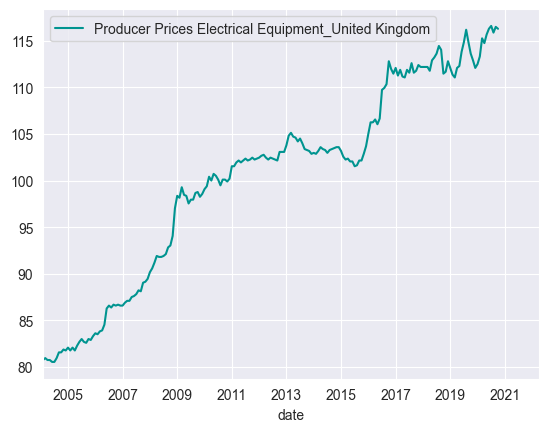

In [285]:
#plot all values
market_data.plot(y="Producer Prices Electrical Equipment_United Kingdom",color=main_color)

**Producer Prices Electrical Equipment_France**

In [286]:
#Dates where there is no values
market_data[market_data['Producer Prices Electrical Equipment_France'].isna()].index

DatetimeIndex(['2004-02-29', '2004-03-31', '2004-04-30', '2004-05-31',
               '2004-06-30', '2004-07-31', '2004-08-31', '2004-09-30',
               '2004-10-31', '2004-11-30', '2004-12-31', '2005-01-31',
               '2005-02-28', '2005-03-31', '2005-04-30', '2005-05-31',
               '2005-06-30', '2005-07-31', '2005-08-31', '2005-09-30',
               '2005-10-31', '2005-11-30', '2005-12-31', '2006-01-31',
               '2006-02-28', '2006-03-31', '2006-04-30', '2006-05-31',
               '2006-06-30', '2006-07-31', '2006-08-31', '2006-09-30',
               '2006-10-31', '2006-11-30', '2006-12-31'],
              dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

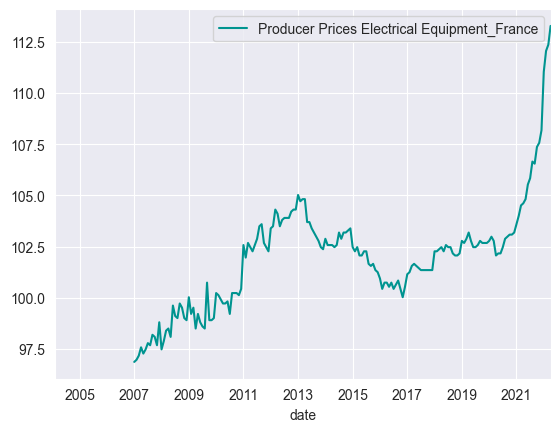

In [287]:
#plot all values
market_data.plot(y="Producer Prices Electrical Equipment_France",color=main_color)

**Producer Prices Electrical Equipment_United Kingdom**

In [288]:
#Dates where there is no values
market_data[market_data['Producer Prices Electrical Equipment_United Kingdom'].isna()].index

DatetimeIndex(['2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30'],
              dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

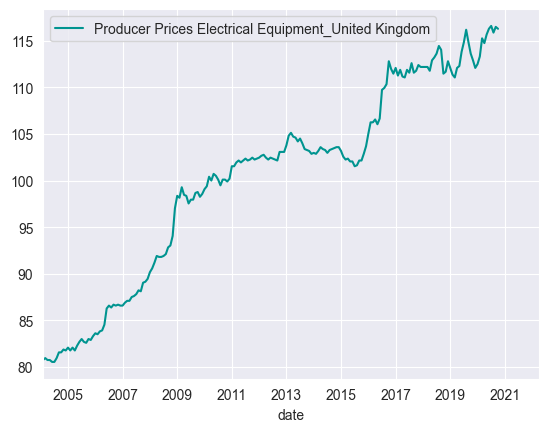

In [289]:
#plot all values
market_data.plot(y="Producer Prices Electrical Equipment_United Kingdom",color=main_color)

**Production Index Electrical Equipment_Switzerland**

In [290]:
#Dates where there is no values
market_data[market_data['Production Index Electrical Equipment_Switzerland'].isna()].index

DatetimeIndex(['2022-04-30'], dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

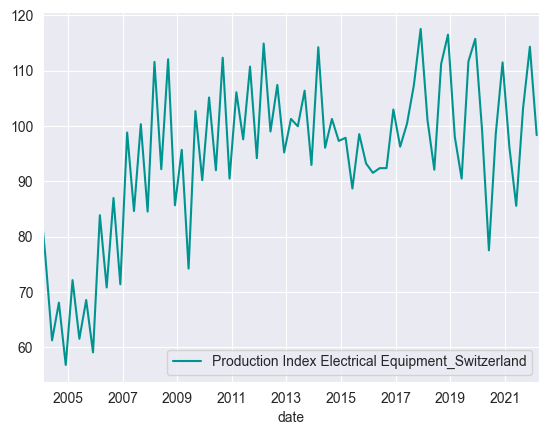

In [291]:
#plot all values
market_data.plot(y="Production Index Electrical Equipment_Switzerland",color=main_color)

**Production Index Electrical Equipment_World**

In [292]:
#Dates where there is no values
market_data[market_data['Production Index Electrical Equipment_World'].isna()].index

DatetimeIndex(['2004-02-29', '2004-03-31', '2004-04-30', '2004-05-31',
               '2004-06-30', '2004-07-31', '2004-08-31', '2004-09-30',
               '2004-10-31', '2004-11-30', '2004-12-31'],
              dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

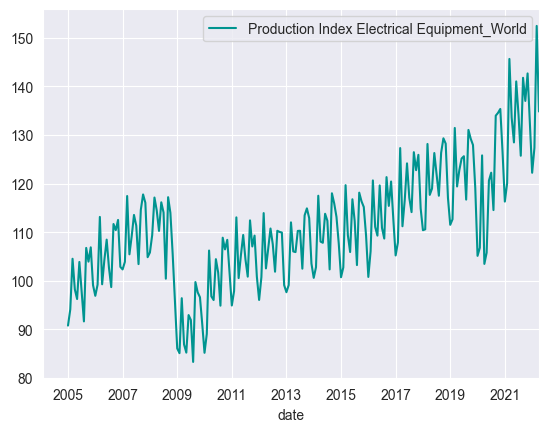

In [293]:
#plot all values
market_data.plot(y="Production Index Electrical Equipment_World",color=main_color)

**Production Index Machinery & Electricals_Switzerland**

In [294]:
#Dates where there is no values
market_data[market_data['Production Index Machinery & Electricals_Switzerland'].isna()].index

DatetimeIndex(['2022-04-30'], dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

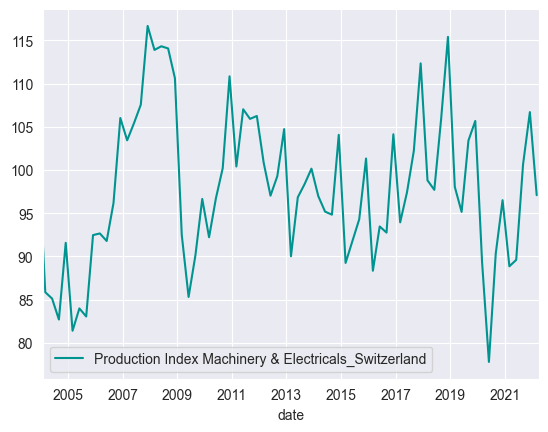

In [295]:
#plot all values
market_data.plot(y="Production Index Machinery & Electricals_Switzerland",color=main_color)

**Production Index Machinery And Equipment N.E.C._Switzerland**

In [296]:
#Dates where there is no values
market_data[market_data['Production Index Machinery And Equipment N.E.C._Switzerland'].isna()].index

DatetimeIndex(['2022-04-30'], dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

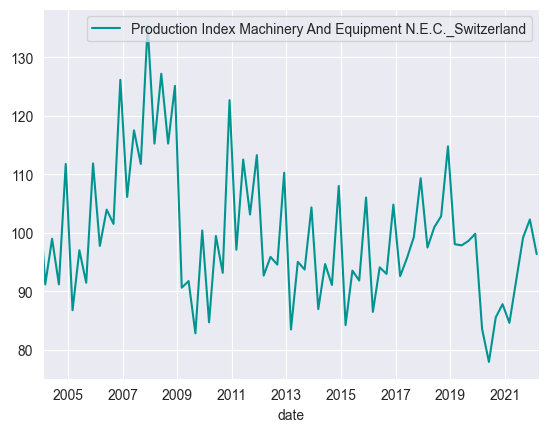

In [297]:
#plot all values
market_data.plot(y="Production Index Machinery And Equipment N.E.C._Switzerland",color=main_color)

**Shipments Index Machinery & Electricals_Switzerland**

In [298]:
#Dates where there is no values
market_data[market_data['Shipments Index Machinery & Electricals_Switzerland'].isna()].index

DatetimeIndex(['2022-04-30'], dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

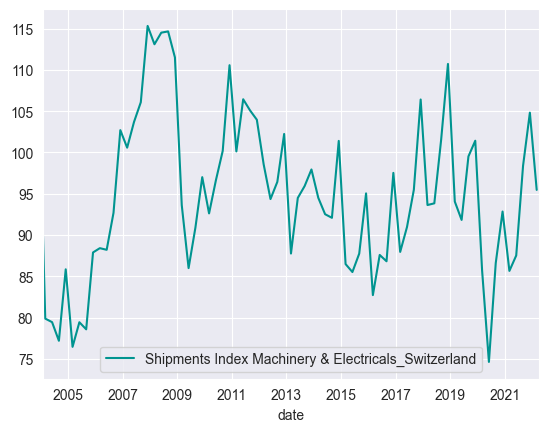

In [299]:
#plot all values
market_data.plot(y="Shipments Index Machinery & Electricals_Switzerland",color=main_color)

**Shipments Index Machinery & Electricals_United Kingdom**

In [300]:
#Dates where there is no values
market_data[market_data['Shipments Index Machinery & Electricals_United Kingdom'].isna()].index

DatetimeIndex(['2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30'],
              dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

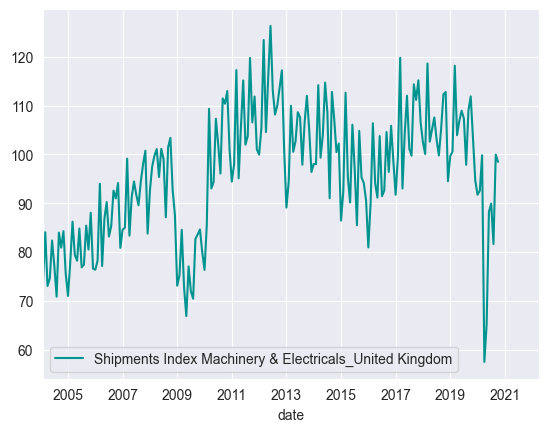

In [301]:
#plot all values
market_data.plot(y="Shipments Index Machinery & Electricals_United Kingdom",color=main_color)

**Shipments Index Machinery & Electricals_United States**

In [302]:
#Dates where there is no values
market_data[market_data['Shipments Index Machinery & Electricals_United States'].isna()].index

DatetimeIndex(['2022-04-30'], dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

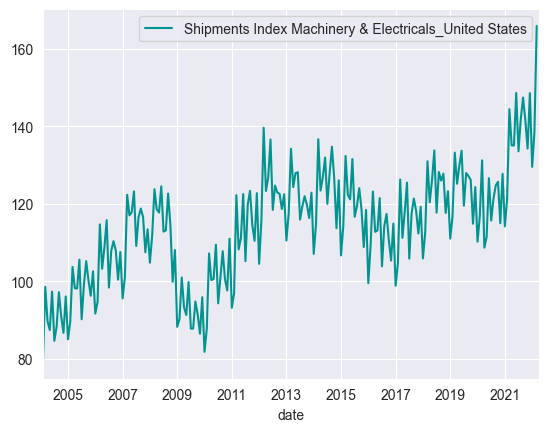

In [303]:
#plot all values
market_data.plot(y="Shipments Index Machinery & Electricals_United States",color=main_color)

<a class="anchor" id="subtitle6.1.2">
    
### 6.1.2. Duplicated Columns/Indexes
    
</a>

In [304]:
# Checking columns with same descriptive statistics
describe_df=market_data.describe().T
describe_df[describe_df.duplicated(keep=False)]
#Production Index Machinery & Electricals_China and Shipments Index Machinery & Electricals_China are the same.

count        mean        std  \
                                                                               
Production Index Machinery & Electricals_China  219.0  138.303637  78.883209   
Shipments Index Machinery & Electricals_China   219.0  138.303637  78.883209   

                                                      min       25%  \
                                                                      
Production Index Machinery & Electricals_China  16.940704  68.47774   
Shipments Index Machinery & Electricals_China   16.940704  68.47774   

                                                      50%         75%  \
                                                                        
Production Index Machinery & Electricals_China  133.50769  198.473934   
Shipments Index Machinery & Electricals_China   133.50769  198.473934   

                                                       max  
                                                            
Production Index Machinery & Electricals_China  329.413367  
Shipments Index Machinery & Electricals_China   329.413367

<a class="anchor" id="subtitle6.1.3">
    
### 6.1.3. Duplicated Values
    
</a>

In [305]:
market_data.duplicated(keep=False).sum()
#There are no duplicated rows

0

<a class="anchor" id="subtitle6.1.4">
    
### 6.1.4. Checking Inconsistencies
    
</a>

**Different date index ranges**

In [306]:
print("Sales Data: ", sales_data.index.min(),"|", sales_data.index.max())
print("Market Data: ", market_data.index.min(),"|",  market_data.index.max())
# Market_data dates don't coincide with the sales dales

Sales Data:  2018-10-31 00:00:00 | 2022-04-30 00:00:00
Market Data:  2004-02-29 00:00:00 | 2022-04-30 00:00:00


<a class="anchor" id="subtitle6.1.5">
    
### 6.1.5. Descriptive Statistics
    
</a>

In [307]:
market_data.describe(include='all').T
# All values seem to be well specified.

count        mean  \
                                                                        
EUR/USD_World                                       219.0    1.253503   
Price Of Base Metals_World                          219.0   89.733341   
Price Of Copper_World                               219.0   86.344288   
Price Of Crude Oil, Average_World                   219.0   89.446520   
Price Of Energy_World                               219.0   92.558006   
Price Of Metals  & Minerals_World                   219.0   86.064857   
Price Of Natural Gas Index_World                    219.0  103.367773   
Producer Prices Electrical Equipment_China          196.0   97.681389   
Producer Prices Electrical Equipment_France         184.0  101.969436   
Producer Prices Electrical Equipment_Germany        219.0  103.173606   
Producer Prices Electrical Equipment_Italy          219.0  102.164957   
Producer Prices Electrical Equipment_United Kin...  201.0  100.151243   
Producer Prices Electrical Equipment_United States  219.0  102.185734   
Production Index Electrical Equipment_France        219.0   96.844134   
Production Index Electrical Equipment_Germany       219.0  102.125494   
Production Index Electrical Equipment_Italy         219.0   95.450517   
Production Index Electrical Equipment_Japan         219.0  105.555794   
Production Index Electrical Equipment_Switzerland   218.0   94.592852   
Production Index Electrical Equipment_United Ki...  219.0  116.667327   
Production Index Electrical Equipment_United St...  219.0  110.902904   
Production Index Electrical Equipment_World         208.0  111.147070   
Production Index Machinery & Electricals_China      219.0  138.303637   
Production Index Machinery & Electricals_Europe     219.0  108.779990   
Production Index Machinery & Electricals_France     219.0  104.431918   
Production Index Machinery & Electricals_Germany    219.0  107.499126   
Production Index Machinery & Electricals_Italy      219.0  105.228363   
Production Index Machinery & Electricals_Japan      219.0  111.948146   
Production Index Machinery & Electricals_Switze...  218.0   97.834543   
Production Index Machinery & Electricals_United...  219.0  108.752949   
Production Index Machinery & Electricals_United...  219.0  109.418255   
Production Index Machinery And Equipment N.E.C....  219.0  109.116660   
Production Index Machinery And Equipment N.E.C....  219.0  110.429205   
Production Index Machinery And Equipment N.E.C....  219.0  109.486312   
Production Index Machinery And Equipment N.E.C....  219.0  115.083174   
Production Index Machinery And Equipment N.E.C....  218.0   99.717112   
Production Index Machinery And Equipment N.E.C....  219.0  104.384938   
Production Index Machinery And Equipment N.E.C....  219.0  108.668835   
Production Index Machinery And Equipment N.E.C....  219.0  112.466417   
Shipments Index Machinery & Electricals_China       219.0  138.303637   
Shipments Index Machinery & Electricals_Europe      219.0  110.551132   
Shipments Index Machinery & Electricals_France      219.0  105.316814   
Shipments Index Machinery & Electricals_Germany     219.0  114.898377   
Shipments Index Machinery & Electricals_Italy       219.0  105.735378   
Shipments Index Machinery & Electricals_Japan       219.0  112.670602   
Shipments Index Machinery & Electricals_Switzer...  218.0   94.784942   
Shipments Index Machinery & Electricals_United ...  201.0   95.957072   
Shipments Index Machinery & Electricals_United ...  218.0  114.160028   

                                                          std        min  \
                                                                           
EUR/USD_World                                        0.120190   1.054300   
Price Of Base Metals_World                          20.810149  50.822012   
Price Of Copper_World                               23.811521  35.657380   
Price Of Crude Oil, Average_World                   30.736831  26.623391   
Price Of Energy_Wo

<a class="anchor" id="subtitle6.1.6">
    
### 6.1.6. Visual Exploration
    
</a>

In [308]:
# Analyze shipment and production performance + producer costs and raw material costs

In [309]:
# For the market_data, the index in sliced to the 
market_data_visualization = market_data.loc[sales_data.index.min():sales_data.index.max()].copy()

**Raw Material Costs**

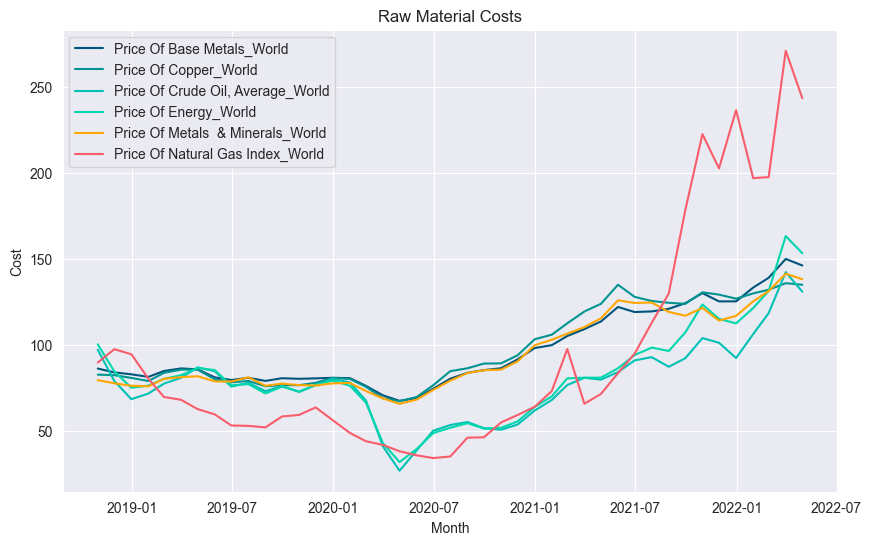

In [310]:
# Create a line chart with the raw material costs for each material
raw_mat_cost = market_data_visualization.iloc[:,1:7]

plt.figure(figsize=(10, 6))
for i, (col, color) in enumerate(zip(raw_mat_cost.columns, color_palette)):
    plt.plot(raw_mat_cost.index, raw_mat_cost[col], label=col, color=color)
plt.title('Raw Material Costs')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.legend()
plt.show() 

In [311]:
# Prices show similar values/behaviors, with some exceptions:
# 1. Strong deline during the initial Covid-19 pandemic spreadout, specially on Energy and Crude oil prices.
# 2. Exponential rise of Natural gas price from beginning of 2021.

**Producer Costs**

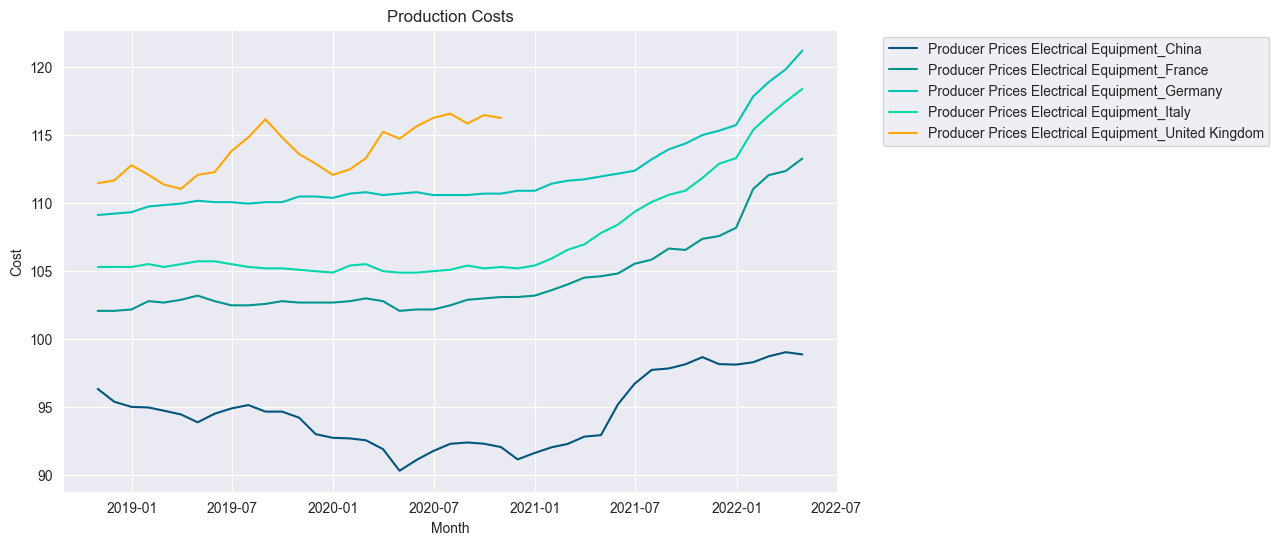

In [312]:
# Create a line chart with the producer costs
producer_cost = market_data_visualization.iloc[:,7:12]

plt.figure(figsize=(10, 6))
for i, col in enumerate(producer_cost.columns):
    plt.plot(producer_cost.index, producer_cost[col], label=col, color=color_palette[i])
plt.title('Production Costs')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [313]:
# Overall rise of producer costs. 
# Missing data from UK producer costs from the end of 2020, probably company cut supply deals due to Brexit instability.

**Production Performance**

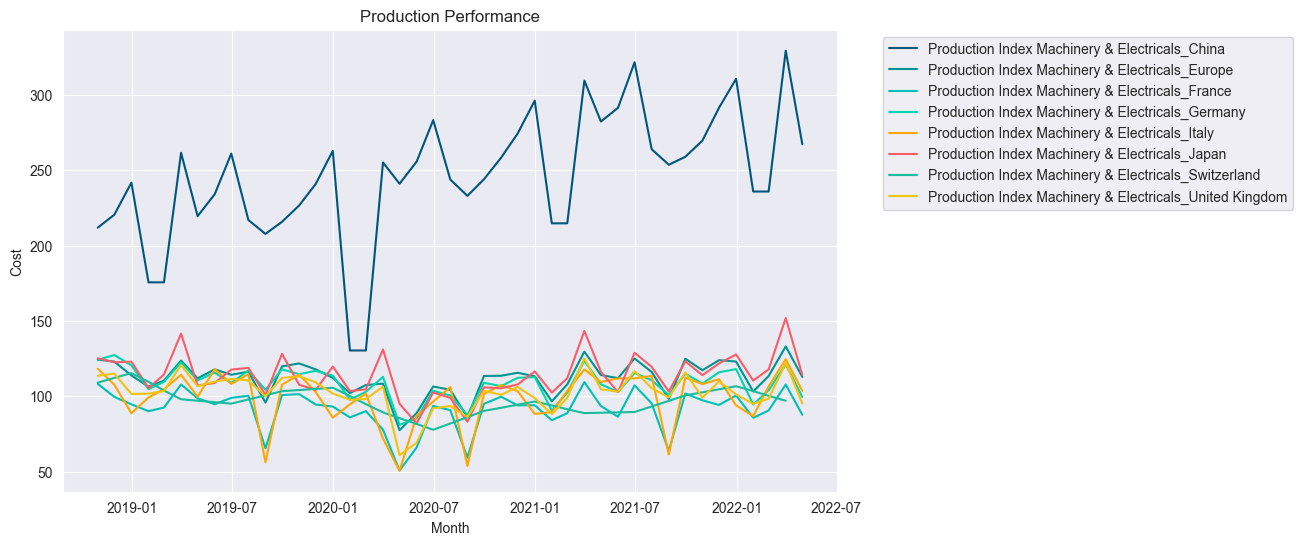

In [314]:
# Create a line chart with the Production Performance
production_performance = market_data_visualization.iloc[:,21:29]

plt.figure(figsize=(10, 6))
for i, col in enumerate(production_performance.columns):
    plt.plot(production_performance.index, production_performance[col], label=col, color=color_palette[i])
plt.title('Production Performance')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [315]:
# Sales stayed overall on the same intervals with seasonal performance drops during the third quarter of each year of analysis except for China.

**Shipment Performance**

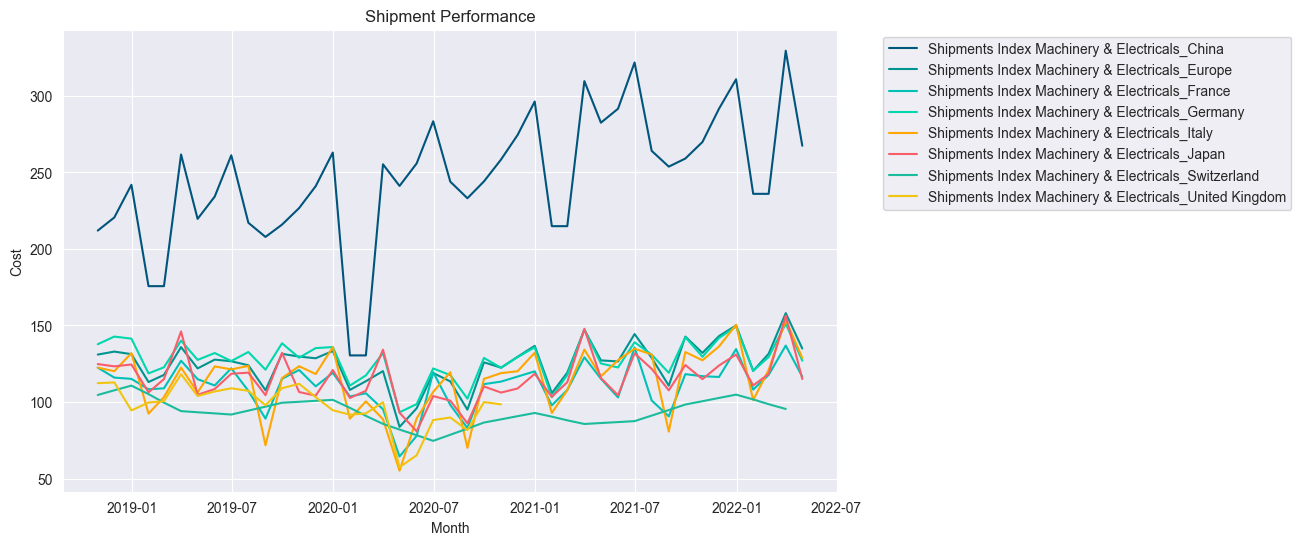

In [316]:
# Create a line chart with the Shipment Performance
shipment_performance = market_data_visualization.iloc[:,38:46]

# Create the plot
plt.figure(figsize=(10, 6))
for i, col in enumerate(shipment_performance.columns):
    plt.plot(shipment_performance.index, shipment_performance[col], label=col, color=color_palette[i % len(color_palette)])
plt.title('Shipment Performance')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 

In [317]:
# Sales stayed overall on the same intervals with seasonal performance drops during the third quarter of each year of analysis except for China.

<a class="anchor" id="sales_exploration">
    
## 6.2. Sales Data
    
</a>

In [318]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-31 to 2022-04-30
Freq: M
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GCK_1   43 non-null     float64
 1   GCK_3   43 non-null     float64
 2   GCK_4   43 non-null     float64
 3   GCK_5   43 non-null     float64
 4   GCK_6   43 non-null     float64
 5   GCK_8   43 non-null     float64
 6   GCK_9   43 non-null     float64
 7   GCK_11  43 non-null     float64
 8   GCK_12  43 non-null     float64
 9   GCK_13  43 non-null     float64
 10  GCK_14  43 non-null     float64
 11  GCK_16  43 non-null     float64
 12  GCK_20  43 non-null     float64
 13  GCK_36  43 non-null     float64
dtypes: float64(14)
memory usage: 5.0 KB


In [319]:
sales_data.head()

Mapped_GCK        GCK_1        GCK_3      GCK_4       GCK_5      GCK_6  \
date                                                                     
2018-10-31  36098918.79   8089465.96  397760.69  2499061.19  369231.60   
2018-11-30   5140760.00  11863001.51  371322.42  8993944.04  473046.96   
2018-12-31  37889612.12   8736859.39  430100.96  6947507.31  999472.69   
2019-01-31  27728148.35  10705300.63  484173.88  8233205.07  598874.10   
2019-02-28  34793163.53  10167796.86  620031.80  6879250.99  542037.52   

Mapped_GCK      GCK_8    GCK_9      GCK_11    GCK_12    GCK_13   GCK_14  \
date                                                                      
2018-10-31  586052.74  3219.32  1021303.50  28686.33  27666.10   5770.0   
2018-11-30  526292.77  1875.90  1898844.80   1070.00  68180.00  17130.0   
2018-12-31  271490.71     0.00  1226122.00  17880.60  15655.18      0.0   
2019-01-31  381400.15  1487.00  2216391.74  21484.00  27198.29   1686.4   
2019-02-28  368475.57  3234.28   610456.60  34214.74  32638.63  19196.3   

Mapped_GCK      GCK_16   GCK_20    GCK_36  
date                                       
2018-10-31   333196.87  4563.14   6474.60  
2018-11-30  1377694.32  5798.14  21617.61  
2018-12-31  4762524.66   918.65  13924.52  
2019-01-31   942957.19  2398.04  15444.39  
2019-02-28   257765.04   620.66   8051.15

<a class="anchor" id="subtitle6.2.1">
    
### 6.2.1. Missing Values 
    
</a>

In [320]:
sales_data.isna().sum()
#There are no missing values

Mapped_GCK
GCK_1     0
GCK_3     0
GCK_4     0
GCK_5     0
GCK_6     0
GCK_8     0
GCK_9     0
GCK_11    0
GCK_12    0
GCK_13    0
GCK_14    0
GCK_16    0
GCK_20    0
GCK_36    0
dtype: int64

<a class="anchor" id="subtitle6.2.2">
    
### 6.2.2.Duplicated Columns/GCK Sales
    
</a>

In [321]:
# Checking columns with same descriptive statistics
describe_df=sales_data.describe().T
describe_df[describe_df.duplicated(keep=False)]
#There are no GCK with the same sales.

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<a class="anchor" id="subtitle6.2.3">
    
### 6.2.3. Duplicated Values
    
</a>

In [322]:
sales_data.duplicated(keep=False).sum()
#There are 3 rows with the same values

0

In [323]:
sales_data[sales_data.duplicated(keep=False)]
#All the values are of 0 sales, so they will be kept.

Empty DataFrame
Columns: [GCK_1, GCK_3, GCK_4, GCK_5, GCK_6, GCK_8, GCK_9, GCK_11, GCK_12, GCK_13, GCK_14, GCK_16, GCK_20, GCK_36]
Index: []

<a class="anchor" id="subtitle6.2.4">
    
### 6.2.4. Outlier Detection
    
</a>

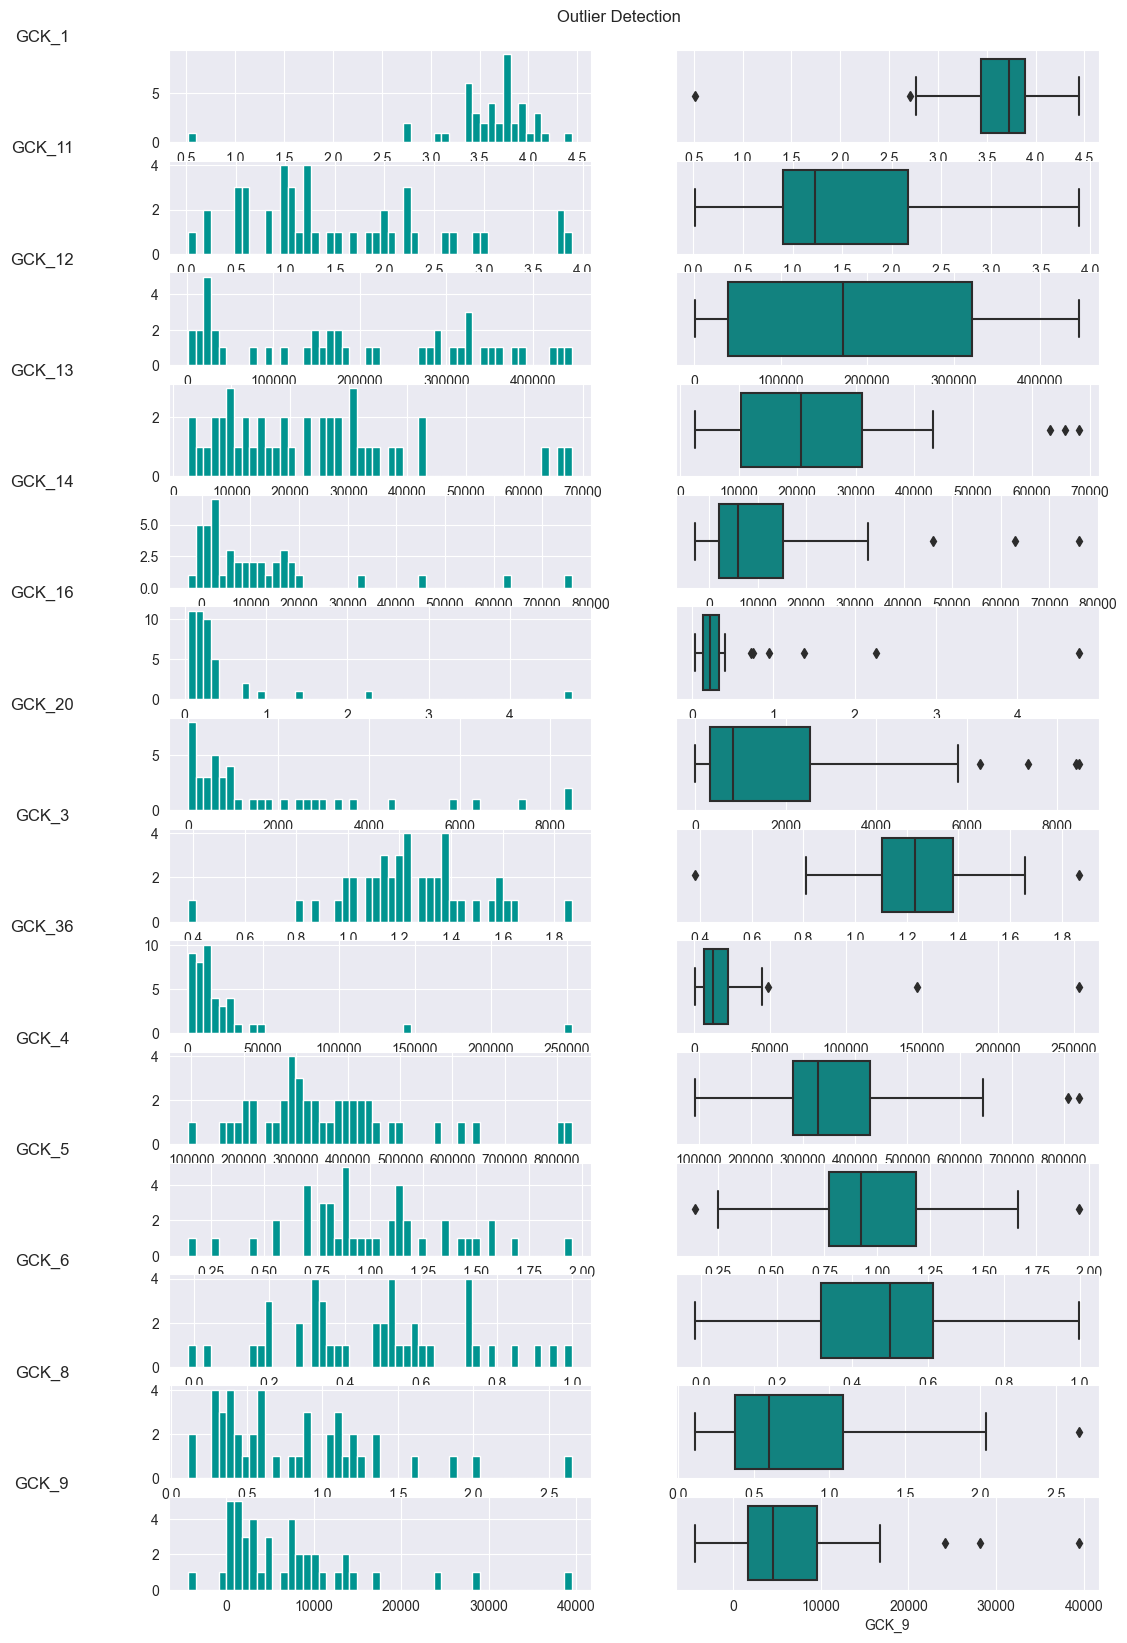

In [324]:
hist_box_maker(sales_data,"Outlier Detection",12,20)
# Analysis of the distributions:
## For GCK1, remove any data points that are less than 2.5.
## For GCK13, remove any data points that are greater than 50000.
## For GCK14, remove any data points that are greater than 30000.
## For GCK16, remove any data points that are greater than 1.
## For GCK20, remove any data points that are greater than 60000.
## For GCK3, remove any data points that are less than 0.8 or greater than 1.8.
## For GCK_36, remove any data points that are greater than 100000.
## For GCK4, remove any data points that are greater than 700000.
## For GCK8, remove any data points that are greater than 2.5.
## For GCK9, remove any data points that are greater than 30000.

<a class="anchor" id="subtitle6.2.5">
    
### 6.2.5. Descriptive Statistics
    
</a>

In [325]:
sales_data.describe(include='all').T
# There are 60 rows with no missing values.
# The date goes from 2018-01-10 up to 2022-12-04.
# There are 14 unique GCKs.

# Hard to detect distribution skeweness from this analysis so it will be further analysed.

count          mean           std         min           25%  \
Mapped_GCK                                                                
GCK_1        43.0  3.591177e+07  5.905117e+06  5140760.00  3.440896e+07   
GCK_3        43.0  1.240566e+07  2.577332e+06  3804319.74  1.105907e+07   
GCK_4        43.0  3.634234e+05  1.557109e+05    93226.32  2.797995e+05   
GCK_5        43.0  9.990585e+06  3.731564e+06  1405295.36  7.703432e+06   
GCK_6        43.0  4.800440e+05  2.422862e+05   -15202.96  3.160555e+05   
GCK_8        43.0  8.109586e+05  5.436111e+05   111791.34  3.749379e+05   
GCK_9        43.0  7.173175e+03  8.231269e+03    -4358.10  1.626700e+03   
GCK_11       43.0  1.532589e+06  9.811598e+05    18200.00  9.035992e+05   
GCK_12       43.0  1.925462e+05  1.410168e+05     1070.00  3.923521e+04   
GCK_13       43.0  2.346877e+04  1.614016e+04     2550.31  1.046647e+04   
GCK_14       43.0  1.148423e+04  1.611617e+04    -2851.45  2.015025e+03   
GCK_16       43.0  4.277018e+05  7.824899e+05    40360.08  1.375541e+05   
GCK_20       43.0  1.821555e+03  2.307900e+03        0.00  3.308100e+02   
GCK_36       43.0  2.322358e+04  4.265128e+04      674.00  6.244495e+03   

                    50%           75%          max  
Mapped_GCK                                          
GCK_1       37323903.07  3.888867e+07  44483013.86  
GCK_3       12317479.75  1.377567e+07  18686819.85  
GCK_4         329430.96  4.281611e+05    829442.33  
GCK_5        9232237.68  1.180077e+07  19524640.52  
GCK_6         499147.73  6.119871e+05    999472.69  
GCK_8         599831.93  1.092310e+06   2655036.78  
GCK_9           4488.09  9.583200e+03     39510.75  
GCK_11       1226122.00  2.161184e+06   3891447.76  
GCK_12        172712.88  3.217951e+05    445648.06  
GCK_13         20663.64  3.096641e+04     68180.00  
GCK_14          5951.85  1.530589e+04     76161.44  
GCK_16        224501.90  3.283725e+05   4762524.66  
GCK_20           842.93  2.543020e+03      8485.60  
GCK_36         12377.77  2.199505e+04    253519.04

<a class="anchor" id="subtitle6.2.6">
    
### 6.2.6. Stationarity (significance level 1%) and ACF and PACF Analysis
    
</a>

**Product 1**

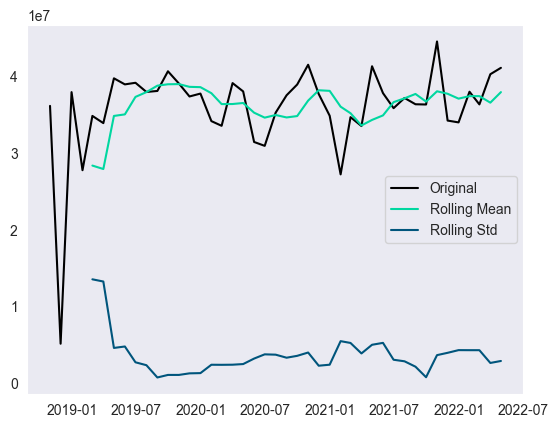

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                -6.002443e+00
p-value                        1.645124e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [326]:
#Verifying stationarity for product 1

stationarity_verification (sales_data, 'GCK_1')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationary. 
#Therefore, product 1 does not have seasonality and trend

#The rolling mean and rolling std are approximately constant over time.

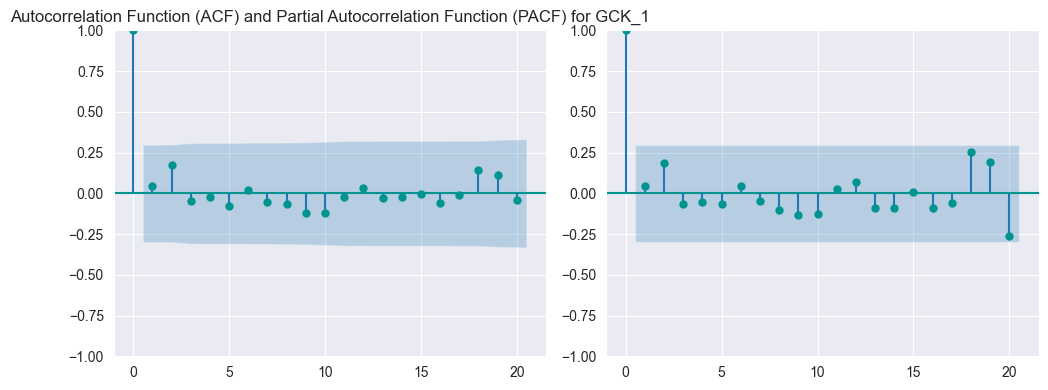

In [327]:
# This code will calculate and plot the ACF and PACF for the 'GCK_1' time series in the sales_data DataFrame
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_1') 

# According to the graphs there is no autocorrection for produtct 1, so we cannot use lag variables to predict

**Product 3**

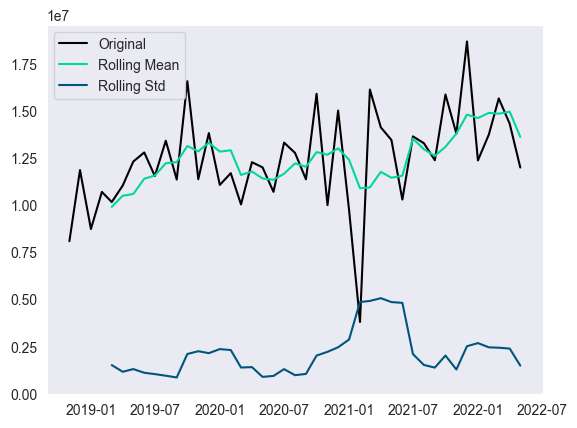

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                -6.590291e+00
p-value                        7.142768e-09
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [328]:
# Verifying stationarity for product 3

stationarity_verification (sales_data, 'GCK_3')

# Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data 
#is stationary. Therefore, product 3 does not have seasonality and trend

# The rolling mean and rolling std are approximately constant over time.

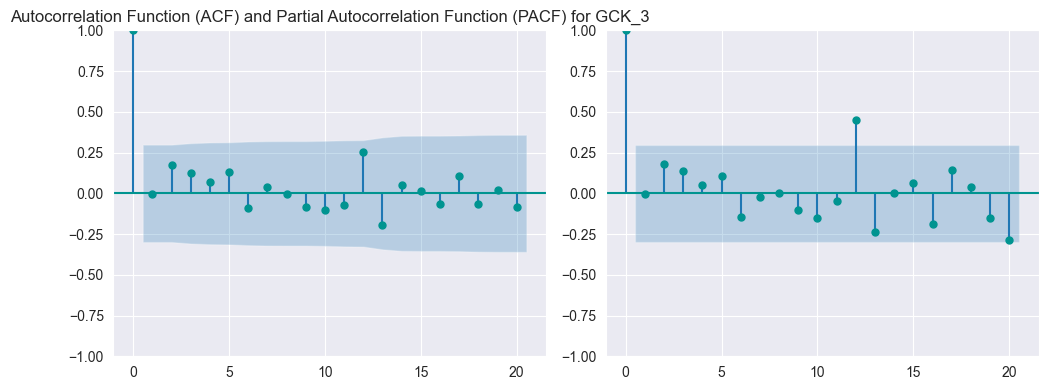

In [329]:
# This code will calculate and plot the ACF and PACF for the 'GCK_3' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_3')

# According to the graphs there is no total autocorrelation for product 3 as well as partial
#(except only one lag value - 12)

**Product 4**

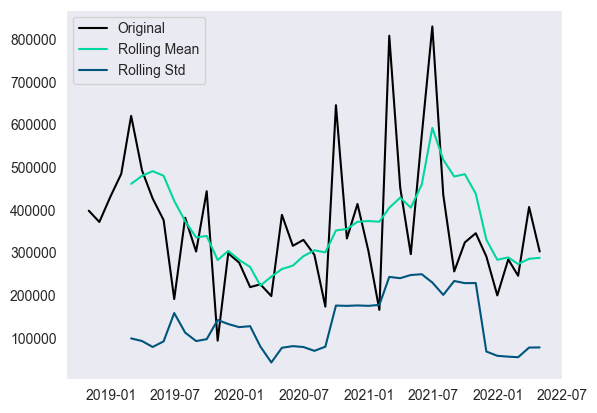

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                 -5.319293
p-value                         0.000005
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [330]:
#Verifying stationarity for product 4

stationarity_verification (sales_data, 'GCK_4')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationary. 
#Therefore, product 4 does not have seasonality and trend

#The rolling mean and rolling std are not constant over time.

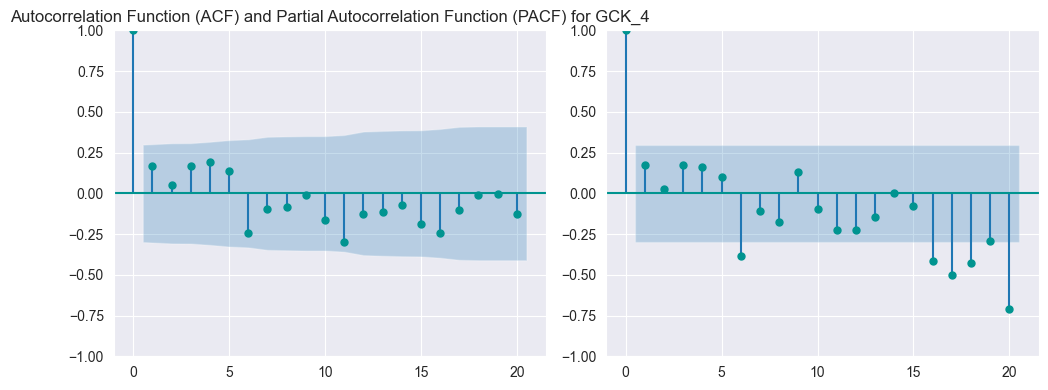

In [331]:
# This code will calculate and plot the ACF and PACF for the 'GCK_4' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_4')

# According to the graphs there is no total autocorrelation for product 4 as well as partial
#(except 6 lag values (6,16,17,18,19,20))

**Product 5**

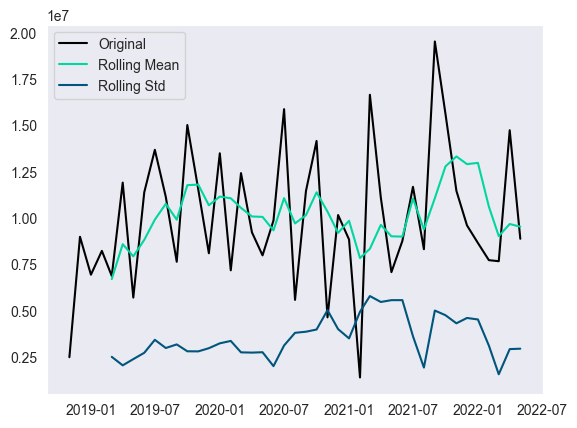

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                -7.636228e+00
p-value                        1.949175e-11
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [332]:
#Verifying stationarity for product 5

stationarity_verification (sales_data, 'GCK_5')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationarity 
#Therefore, product 5 does not have seasonality 

#Both rolling mean and rolling std are approximately constant over time, which confirms the stationarity hypothesis

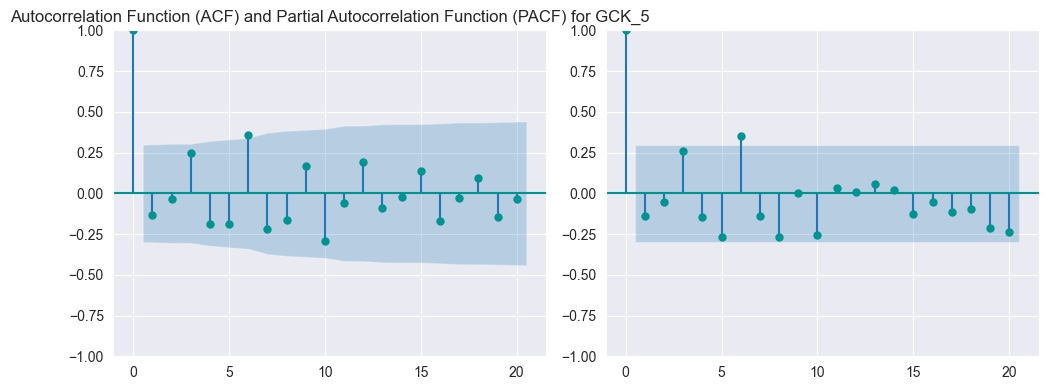

In [333]:
# This code will calculate and plot the ACF and PACF for the 'GCK_5' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_5')

# # According to the graphs there is no total autocorrelation for product 5 as well as partial
#(except 1 lag value for both (6))

**Product 6**

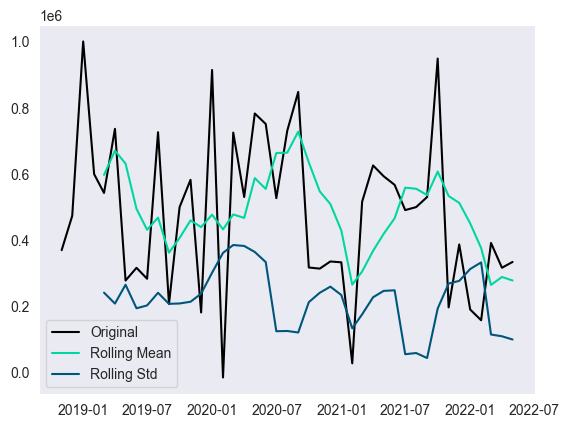

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                 -3.477762
p-value                         0.008577
#Lags Used                      1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [334]:
#Verifying stationarity for product 6

stationarity_verification (sales_data, 'GCK_6')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationarity 
#Therefore, product 6 does not have seasonality 

#Both rolling mean and rolling std are not constant over time

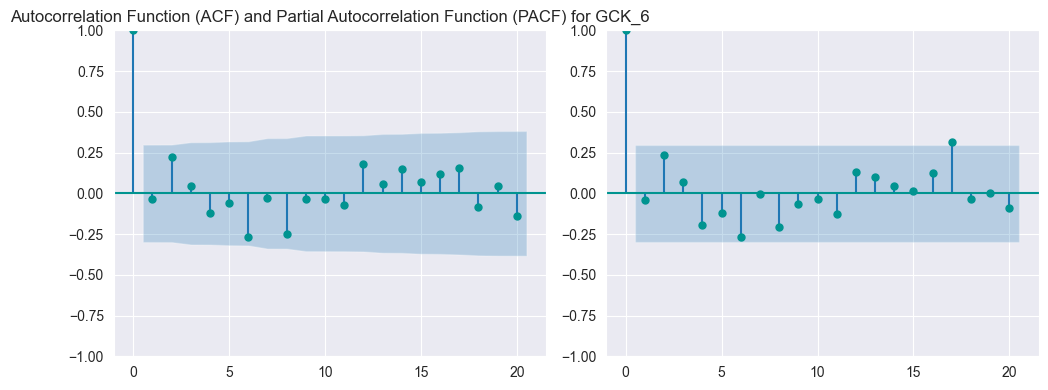

In [335]:
# This code will calculate and plot the ACF and PACF for the 'GCK_6' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_6')

# According to the graphs there is no total autocorrelation for product 6 as well as partial
#(except only one lag values (17))

**Product 8**

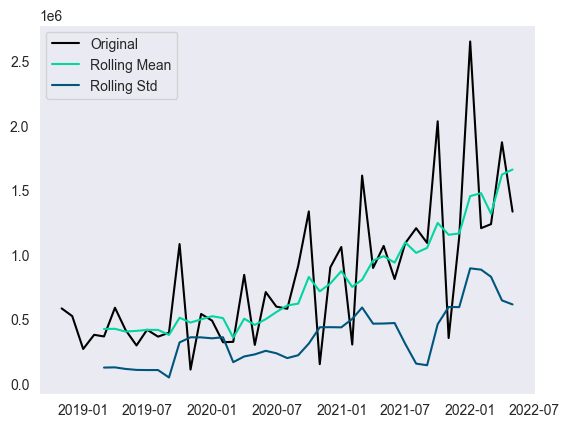

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                  2.340859
p-value                         0.998980
#Lags Used                      6.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [336]:
#Verifying stationarity for product 8

stationarity_verification (sales_data,'GCK_8')

# Since p-value is clearly higher than a significance level of 1%, we do not reject the null hypotheses, 
#therefore, the data is not stationary.
# The product 8 seems to have seasonality and trend patterns

# Both rolling mean and rolling std are increasing over time

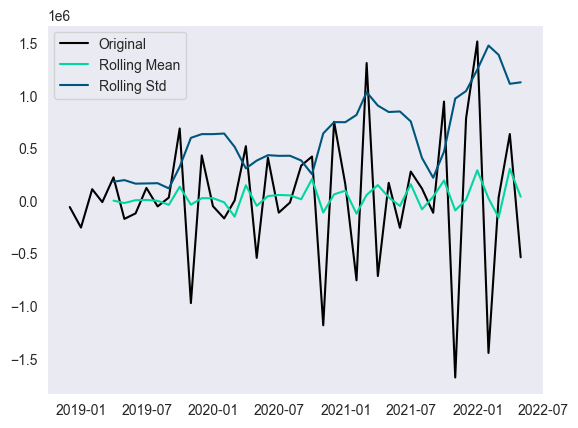

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                 -4.873763
p-value                         0.000039
#Lags Used                      5.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [337]:
# Before using SARIMA (or ARIMA/ARMA depending on the case), as the series is not stationary, we will try to take 
#first differences and check if the series becomes stationary. If it is we already know that degree of differencing
#is one. If not, we will have to check whether we should differentiate again or seasonally diferentiate.
sales_data_temp = sales_data.copy()
sales_data_temp['GCK_8_DIFF_1'] = sales_data_temp['GCK_8'].diff() 
sales_data_temp['GCK_8_DIFF_1']=sales_data_temp['GCK_8_DIFF_1'].dropna()
GCK_8_DIFF_1 = sales_data_temp['GCK_8_DIFF_1'].dropna()
GCK_8_DIFF_1 = pd.DataFrame(GCK_8_DIFF_1)
stationarity_verification(GCK_8_DIFF_1,'GCK_8_DIFF_1') #Considering the p-value we obtained (<0.05), there is
#statistical evidence suggesting that the series is stationary

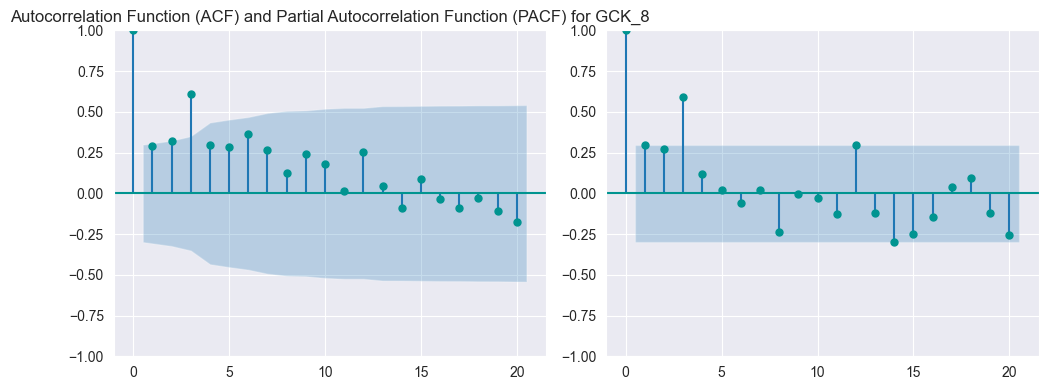

In [338]:
# This code will calculate and plot the ACF and PACF for the 'GCK_8' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_8')

# According to the graphs there is total and partial autocorrection for produtct 8, so we can use lag 3 to predict
#and seem to have seasonality

**Product 9**

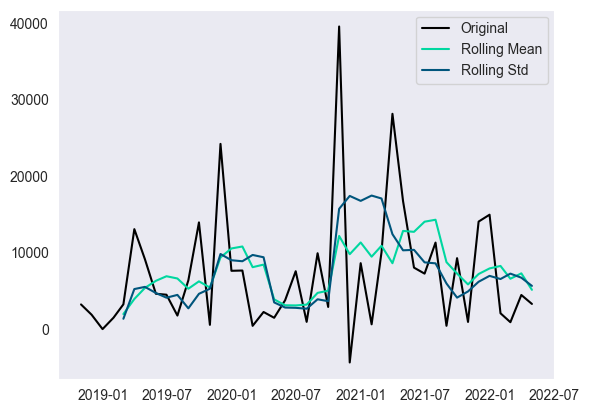

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                -7.013494e+00
p-value                        6.825988e-10
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [339]:
#Verifying stationarity for product 9

stationarity_verification (sales_data,'GCK_9')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationarity 
#Therefore, product 9 does not have seasonality 

#Both rolling mean and rolling std are not constant over time

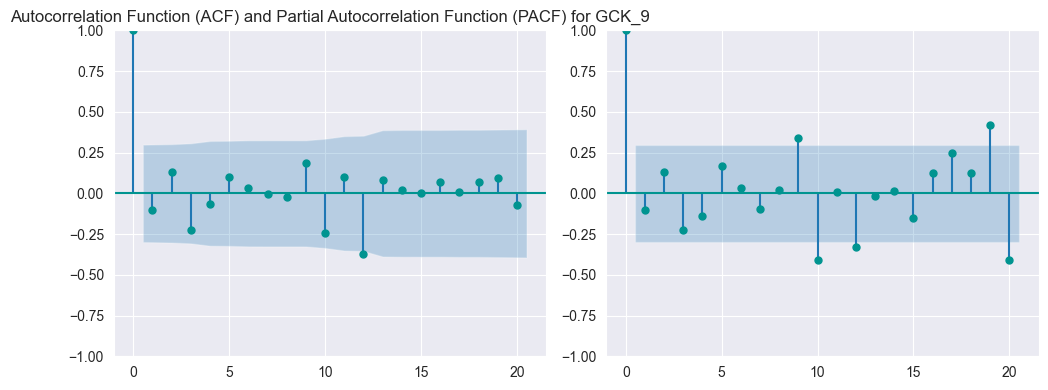

In [340]:
# This code will calculate and plot the ACF and PACF for the 'GCK_9' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_9')

# According to the graphs there is no total autocorrelation for product 9 as well as partial
#(except 5 lag values (9,10,12,19,20) for PACF and only one lag for ACF (12))v

**Product 11**

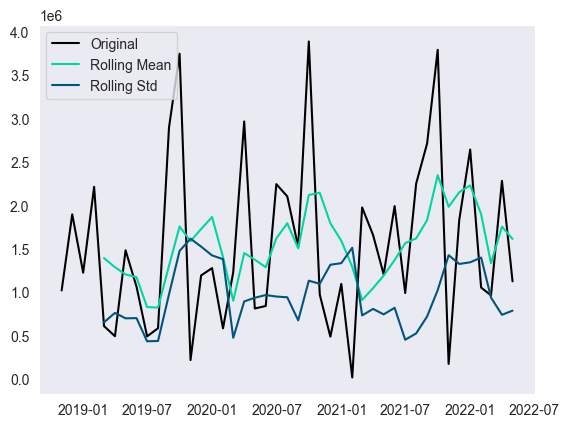

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                 -5.577923
p-value                         0.000001
#Lags Used                      1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [341]:
#Verifying stationarity for product 11

stationarity_verification (sales_data,'GCK_11')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationarity 
#Therefore, product 11 does not have seasonality 

#Both rolling mean and rolling std are not constant over time

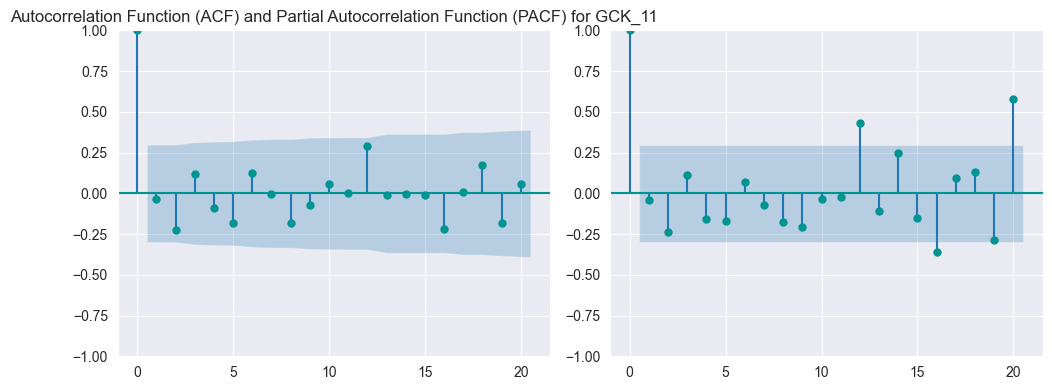

In [342]:
# This code will calculate and plot the ACF and PACF for the 'GCK_11' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_11')

# According to the graphs there is no autocorrection for product 11, so we cannot use lag variables to predict?

**Product 12**

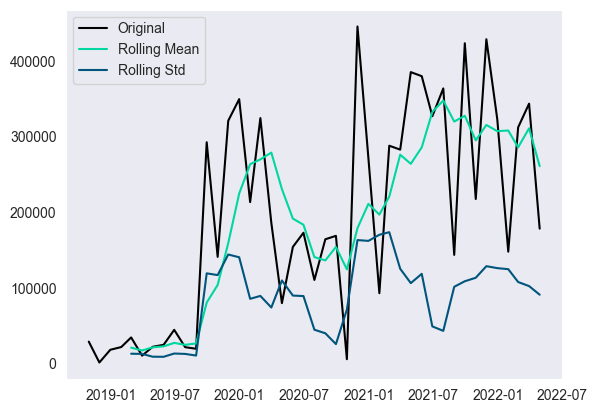

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                 -3.869337
p-value                         0.002272
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [343]:
#Verifying stationarity for product 12

stationarity_verification (sales_data,'GCK_12')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationarity 

# The product 12 seems to have seasonality and trend patterns

# Both rolling mean and rolling std are increasing over time

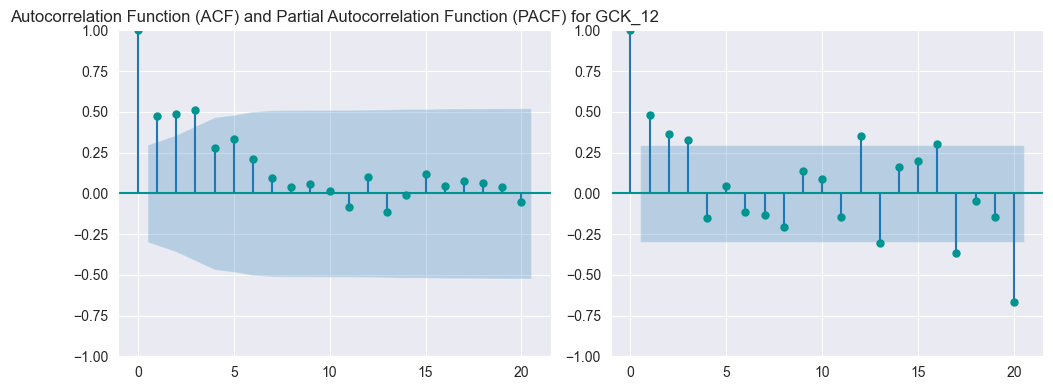

In [344]:
# This code will calculate and plot the ACF and PACF for the 'GCK_12' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_12')

# According to the graphs there is a signficant pattern for product 12 indicantion the possible use of an ARMA(3,3)

**Product 13**

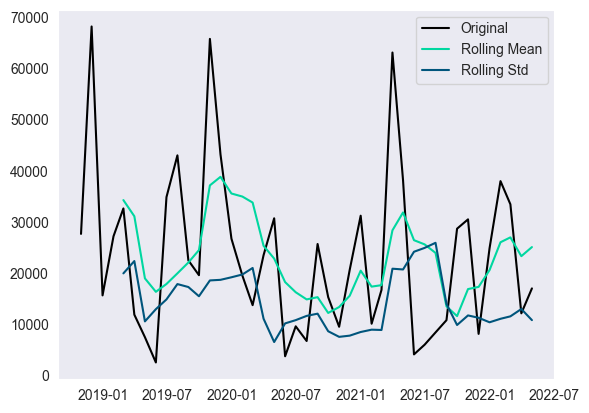

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                 -3.254199
p-value                         0.017054
#Lags Used                      2.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [345]:
#Verifying stationarity for product 13

stationarity_verification (sales_data,'GCK_13')

# Since p-value is higher than a significance level of 1%, we do not reject the null hypotheses, 
#therefore, the data is not stationary.
# The product 13 seems to have seasonality and trend patterns

# Both rolling mean and rolling std are increasing over time

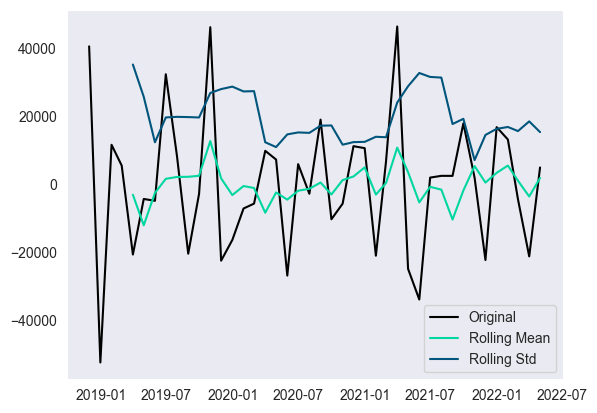

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                -8.439475e+00
p-value                        1.779279e-13
#Lags Used                     1.000000e+00
Number of Observations Used    4.000000e+01
Critical Value (1%)           -3.605565e+00
Critical Value (5%)           -2.937069e+00
Critical Value (10%)          -2.606986e+00
dtype: float64


In [346]:
# Before using SARIMA (or ARIMA/ARMA depending on the case), as the series is not stationary, we will try to take 
#first differences and check if the series becomes stationary. If it is we already know that degree of differencing
#is one. If not, we will have to check whether we should differentiate again or seasonally diferentiate.
sales_data_temp=sales_data.copy()
sales_data_temp['GCK_13_DIFF_1'] = sales_data_temp['GCK_13'].diff() 
sales_data_temp['GCK_13_DIFF_1']=sales_data_temp['GCK_13_DIFF_1'].dropna()
GCK_13_DIFF_1 = sales_data_temp['GCK_13_DIFF_1'].dropna()
GCK_13_DIFF_1 = pd.DataFrame(GCK_13_DIFF_1)
stationarity_verification(GCK_13_DIFF_1,'GCK_13_DIFF_1') 
#Considering the p-value we obtained (<0.05), there is
#statistical evidence suggesting that the series is stationary

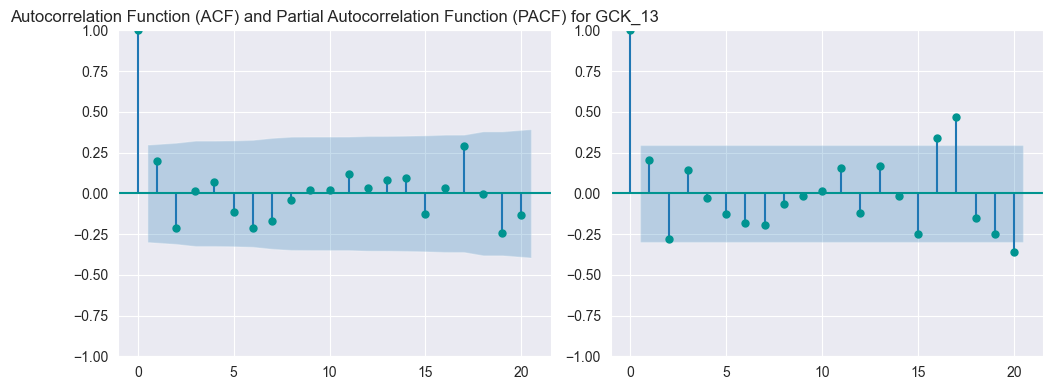

In [347]:
# This code will calculate and plot the ACF and PACF for the 'GCK_13' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data_temp, 'GCK_13')

# According to the graphs there is total and partial autocorrection for produtct 13, so we can use lag 3 to predict
#and seem to have seasonality

**Product 14**

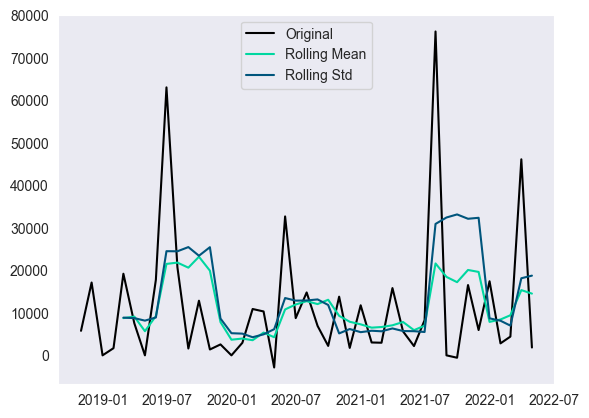

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                -6.871822e+00
p-value                        1.508840e-09
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [348]:
#Verifying stationarity for product 14

stationarity_verification (sales_data,'GCK_14')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationarity 
#Therefore, product 14 does not have seasonality 

#Both rolling mean and rolling std are constant over time

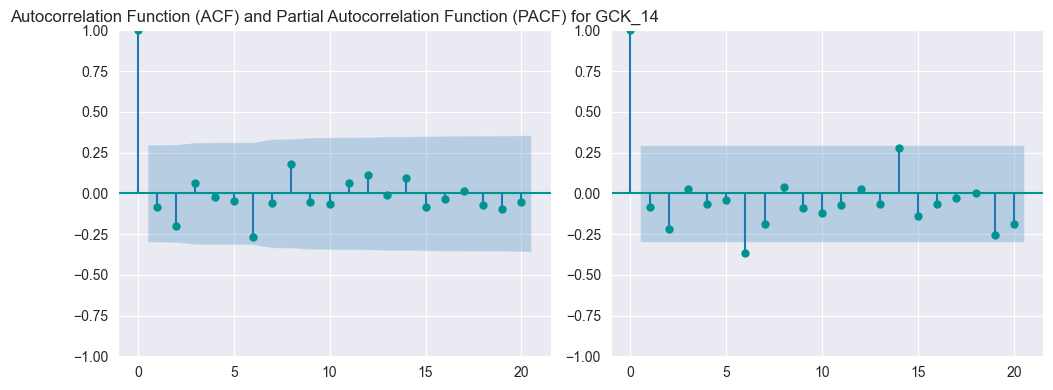

In [349]:
# This code will calculate and plot the ACF and PACF for the 'GCK_14' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_14')

# According to the graphs there is no total autocorrelation for product 14 as well as partial
#(except only one lag values (6))

**Product 16**

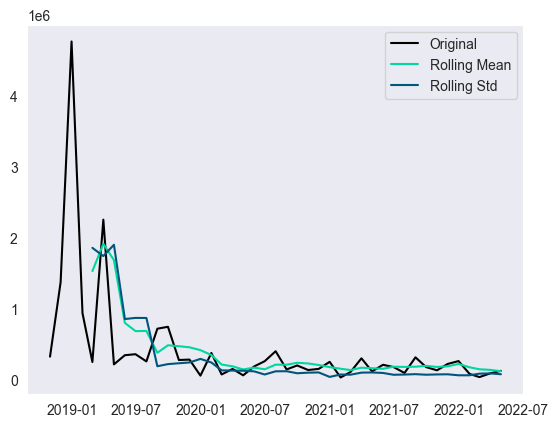

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                -6.367204e+00
p-value                        2.393585e-08
#Lags Used                     9.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


In [350]:
#Verifying stationarity for product 16

stationarity_verification (sales_data,'GCK_16')

#Since p-value is less than a significance level of 5%, we reject the null hypotheses, therefore, the data is stationarity 
#Therefore, product 16 does not have seasonality 

#Both rolling mean and rolling std are aproximadetely constant over time

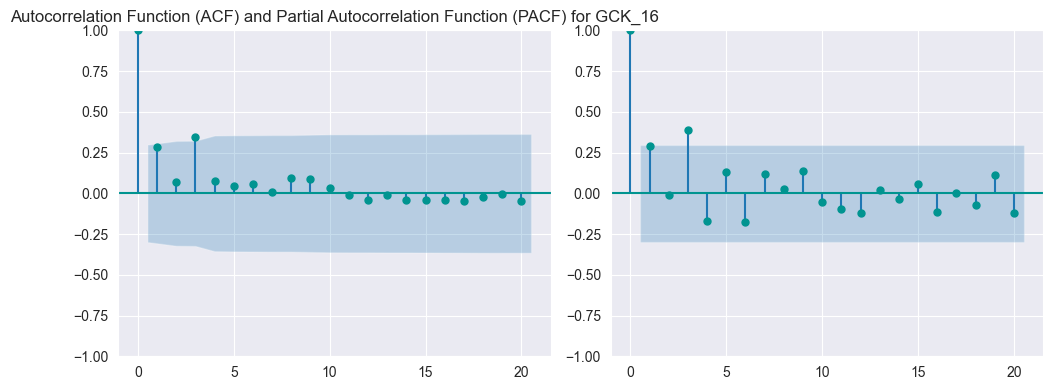

In [351]:
# This code will calculate and plot the ACF and PACF for the 'GCK_16' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_16')

# According to the graphs there is no total autocorrelation for product 16 as well as partial
#(except only 1 lag value for PACF and ACF (3))

**Product 20**

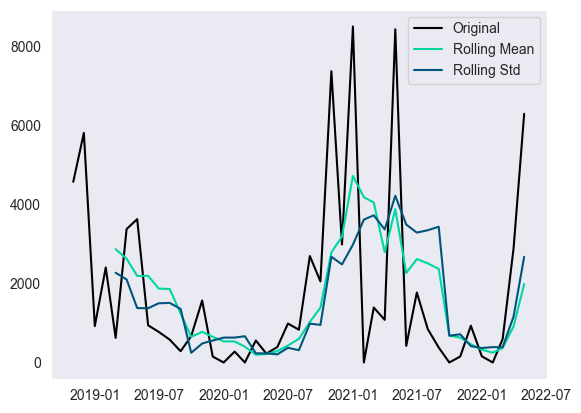

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                 -3.125179
p-value                         0.024745
#Lags Used                      1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [352]:
#Verifying stationarity for product 20

stationarity_verification (sales_data,'GCK_20')

#Since p-value is less than a significance level of 1%, we reject the null hypotheses, therefore, the data is stationarity 
#Therefore, product 20 does not have seasonality 

#Both rolling mean and rolling std are not constant over time

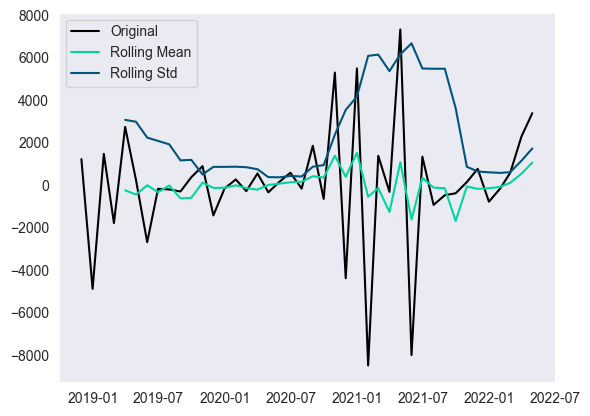

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                 -5.456595
p-value                         0.000003
#Lags Used                      2.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [353]:
# Before using SARIMA (or ARIMA/ARMA depending on the case), as the series is not stationary, we will try to take 
#first differences and check if the series becomes stationary. If it is we already know that degree of differencing
#is one. If not, we will have to check whether we should differentiate again or seasonally diferentiate.
sales_data_temp=sales_data.copy()
sales_data_temp['GCK_20_DIFF_1'] = sales_data_temp['GCK_20'].diff() 
sales_data_temp['GCK_20_DIFF_1']=sales_data_temp['GCK_20_DIFF_1'].dropna()
GCK_20_DIFF_1 = sales_data_temp['GCK_20_DIFF_1'].dropna()
GCK_20_DIFF_1 = pd.DataFrame(GCK_20_DIFF_1)
stationarity_verification(GCK_20_DIFF_1,'GCK_20_DIFF_1') 
#Considering the p-value we obtained (<0.05), there is
#statistical evidence suggesting that the series is stationary

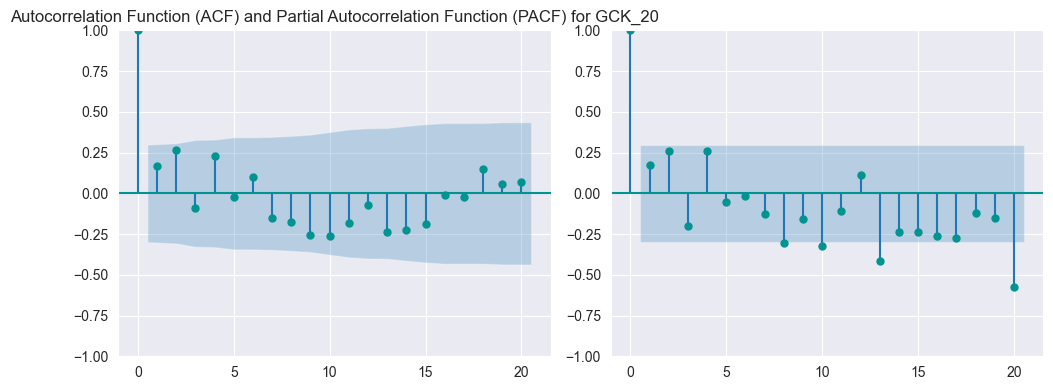

In [354]:
# This code will calculate and plot the ACF and PACF for the 'GCK_20' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data_temp, 'GCK_20')

# According to the graphs there is no total autocorrelation for product 20 as well as partial
#(except only 4 lag values for PACF (8,10,13,20))

**Product 36**

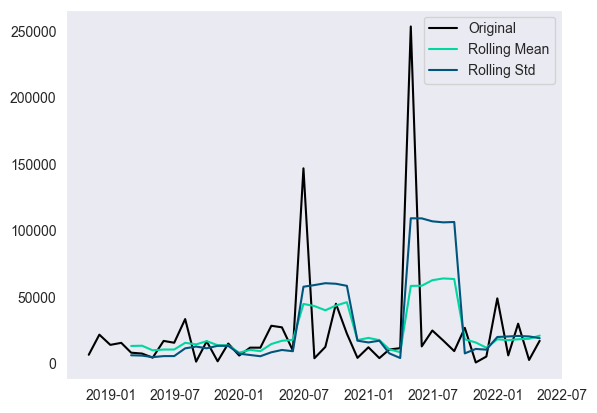

<Figure size 1000x1500 with 0 Axes>

Results of Dickey Fuller Test:
Test Statistic                -7.000027e+00
p-value                        7.362686e-10
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [355]:
#Verifying stationarity for product 36

stationarity_verification (sales_data,'GCK_36')

#Since p-value is less than a significance level of 5%, we reject the null hypotheses, therefore, the data is stationarity 
#Therefore, product 36 does not have seasonality 

#Both rolling mean and rolling std are not constant over time

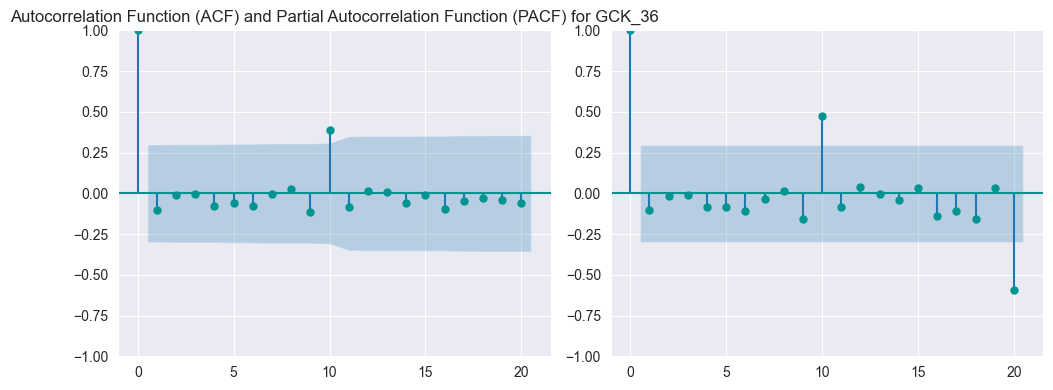

In [356]:
# This code will calculate and plot the ACF and PACF for the 'GCK_36' time series in the sales_data DataFrame.
# Examining the ACF and PACF plots can help identify the temporal dependencies in the data and inform the choice of models, 
#such as autoregressive (AR) or moving average (MA) components.

acf_pacf(sales_data, 'GCK_36')

# According to the graphs there is no total autocorrelation for product 20 as well as partial
#(except only 4 lag values for PACF (8,10,13,20))

<a class="anchor" id="subtitle6.2.7">
    
### 6.2.7. STL Decomposition
    
</a>

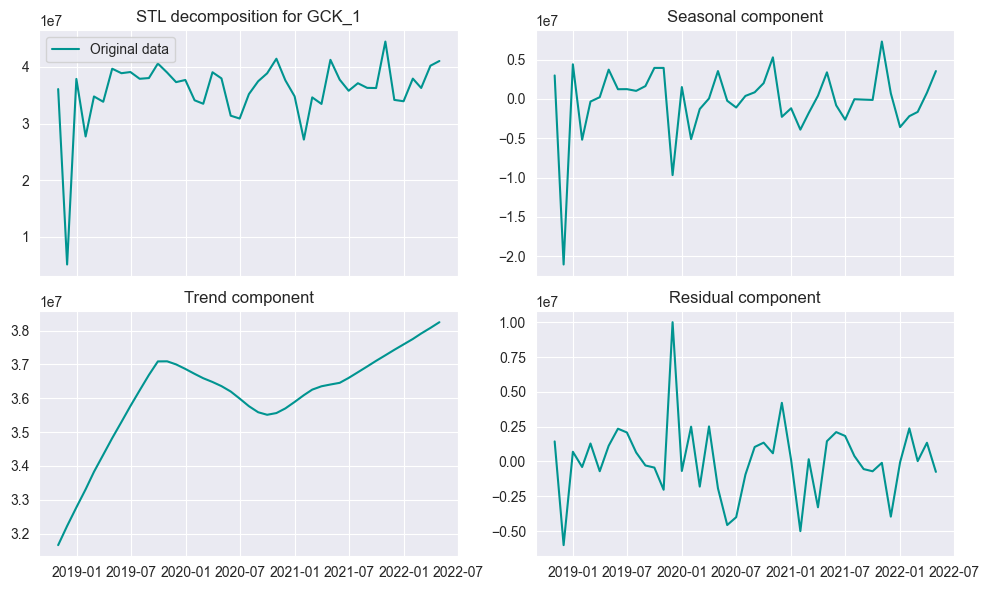

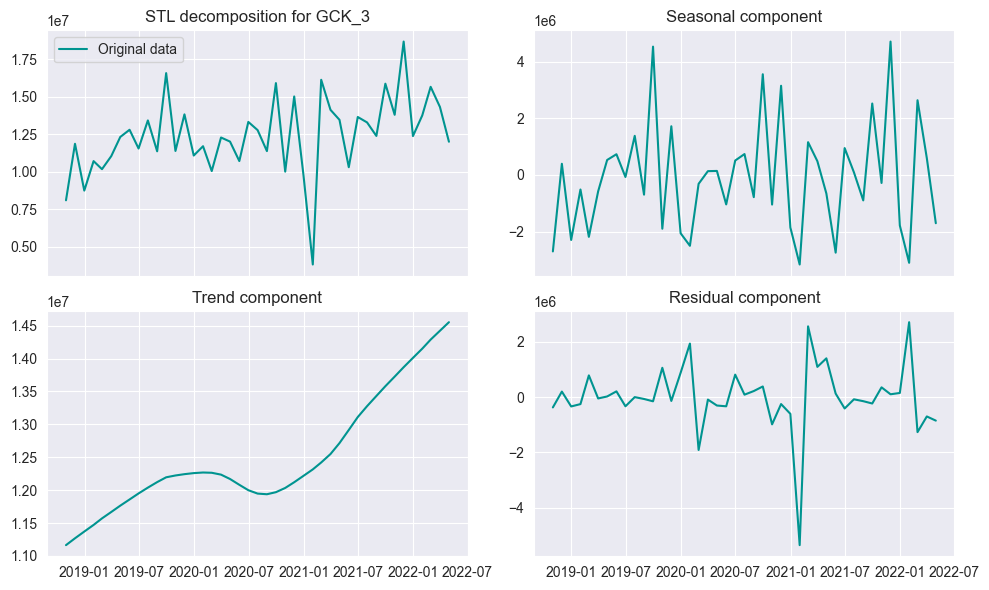

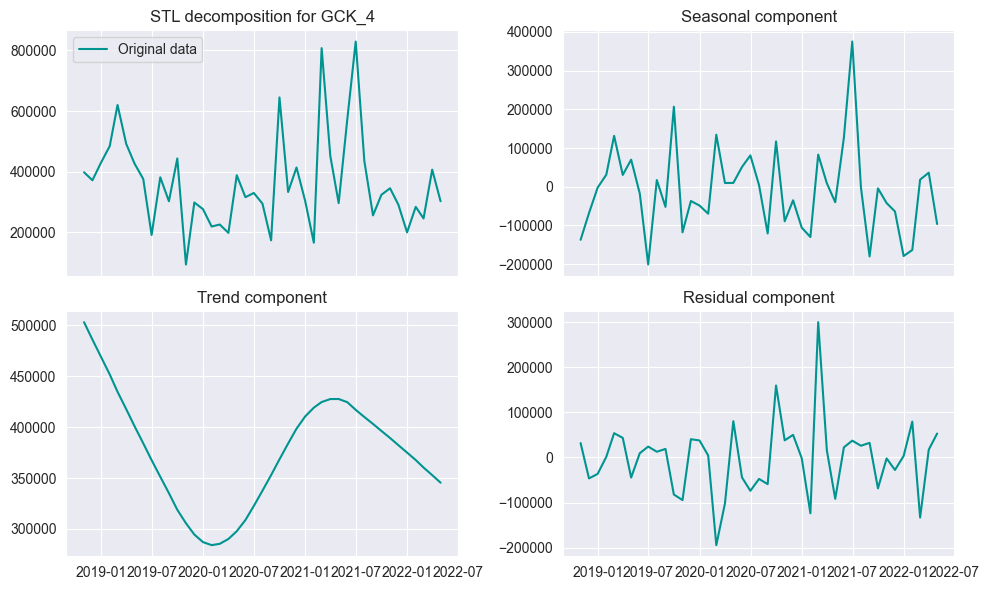

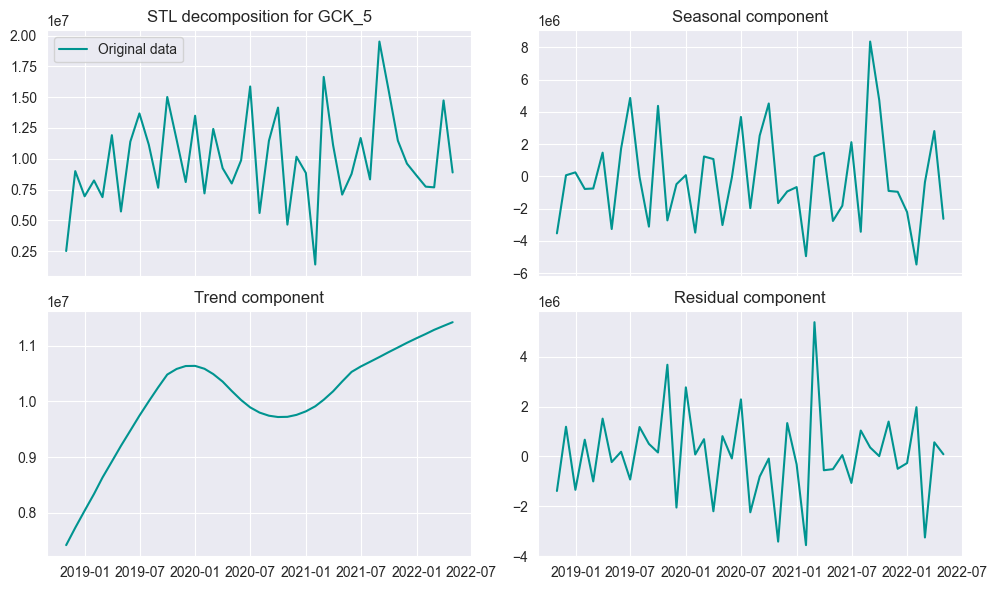

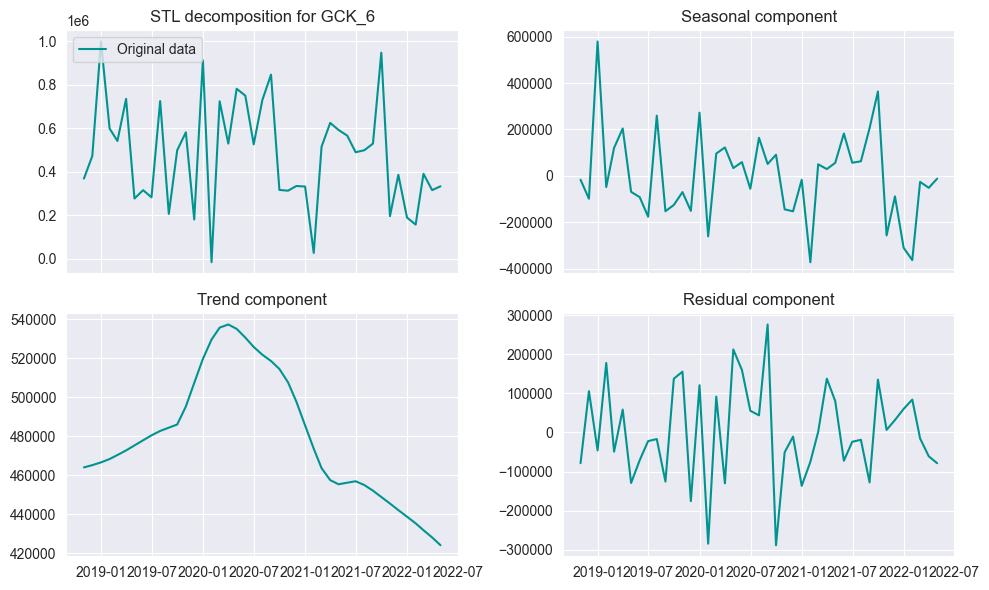

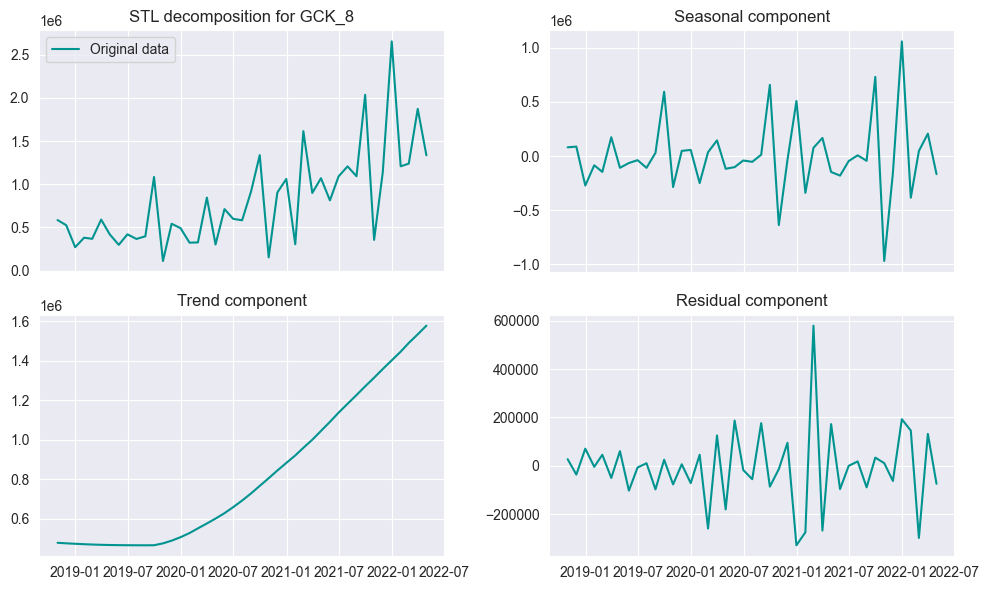

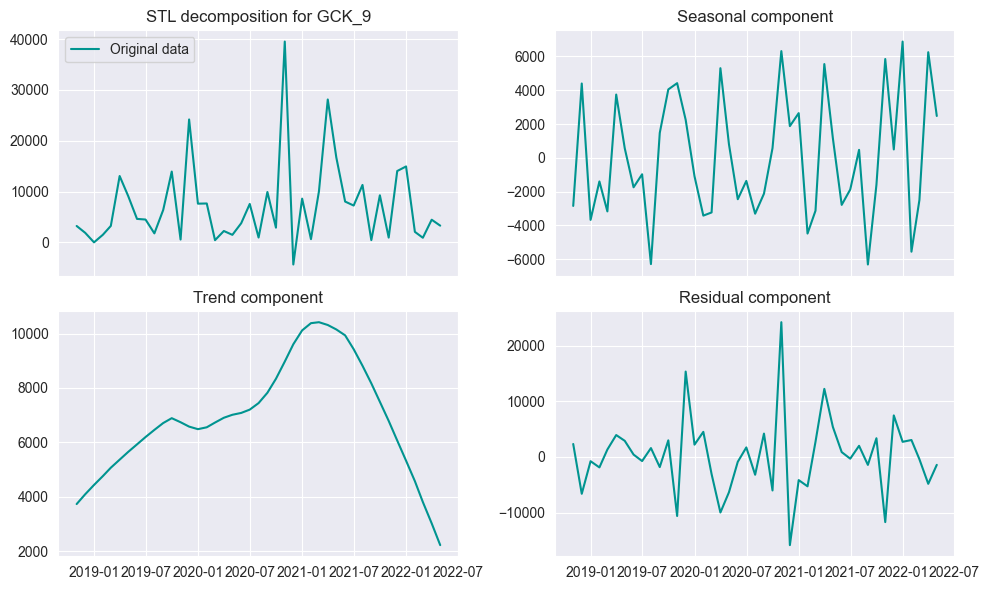

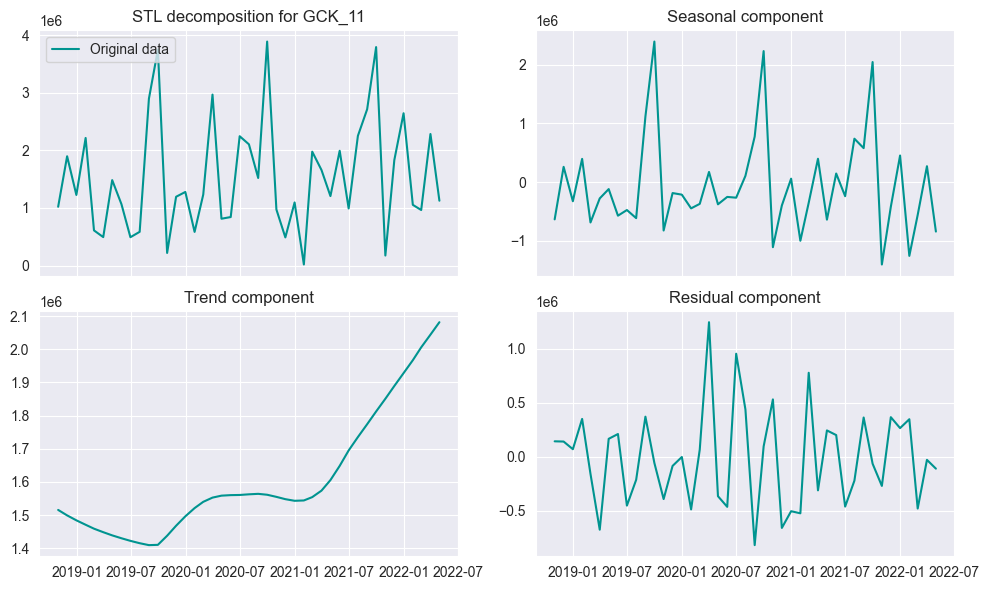

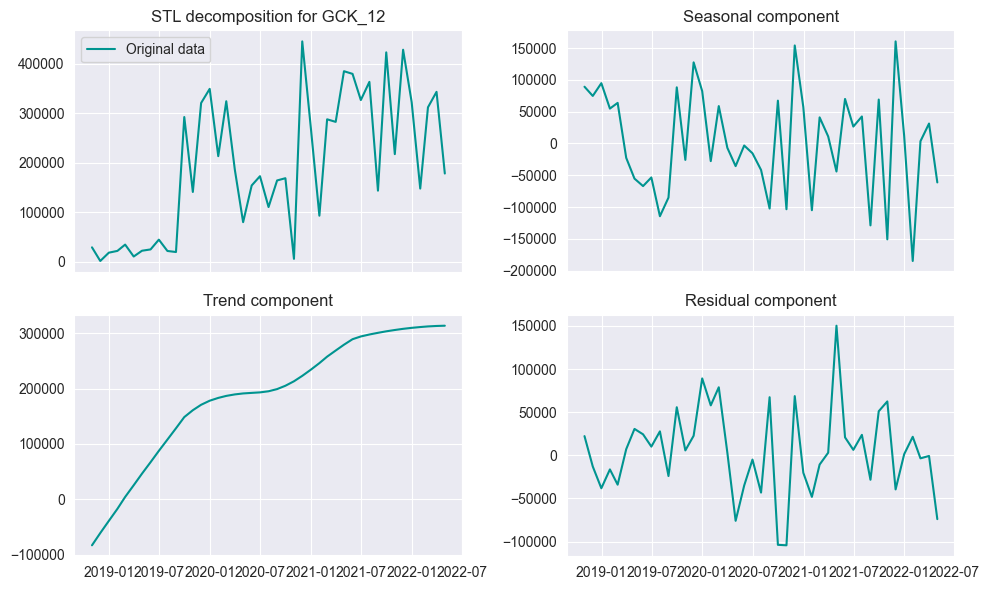

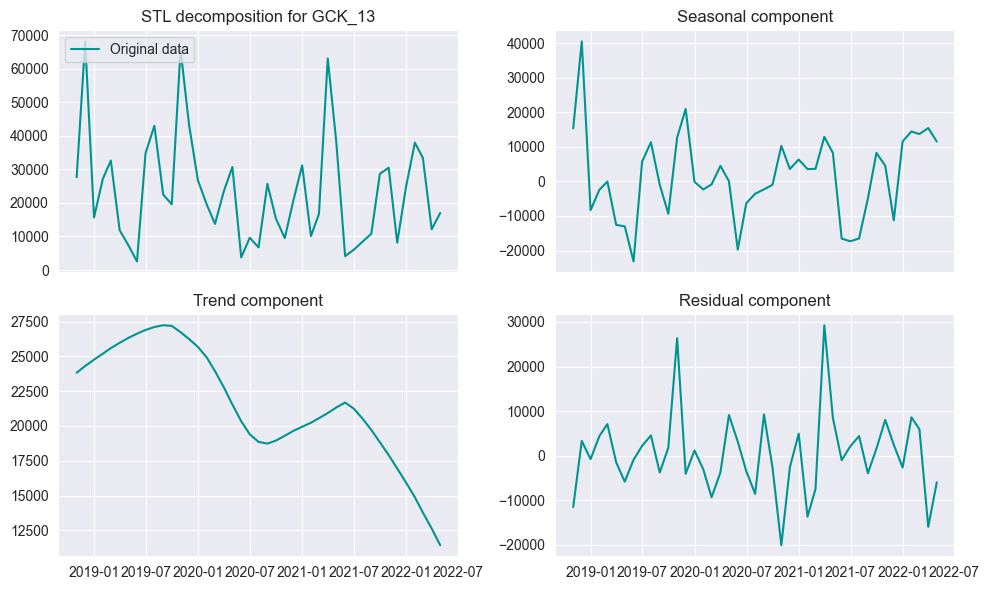

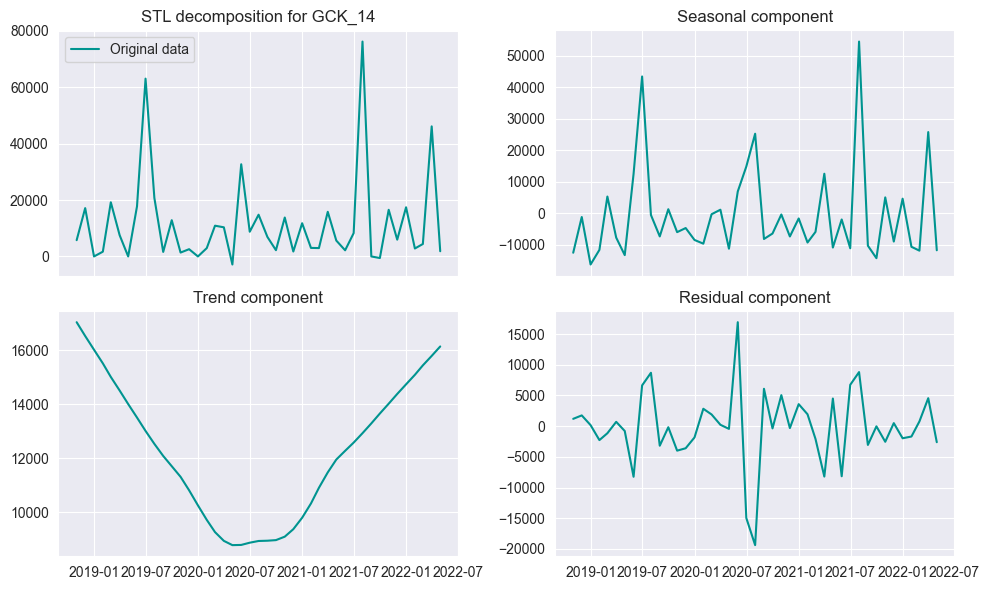

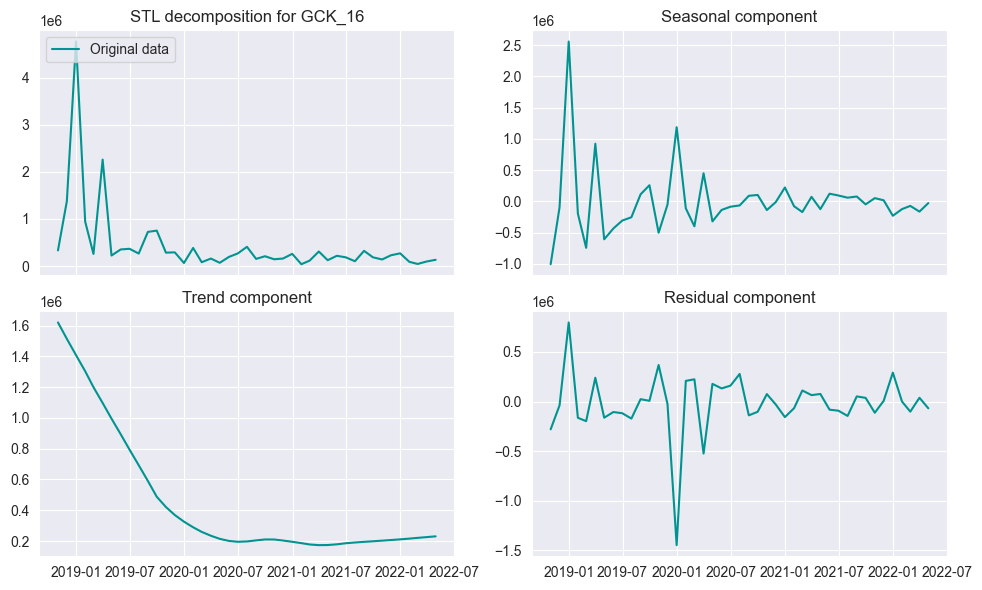

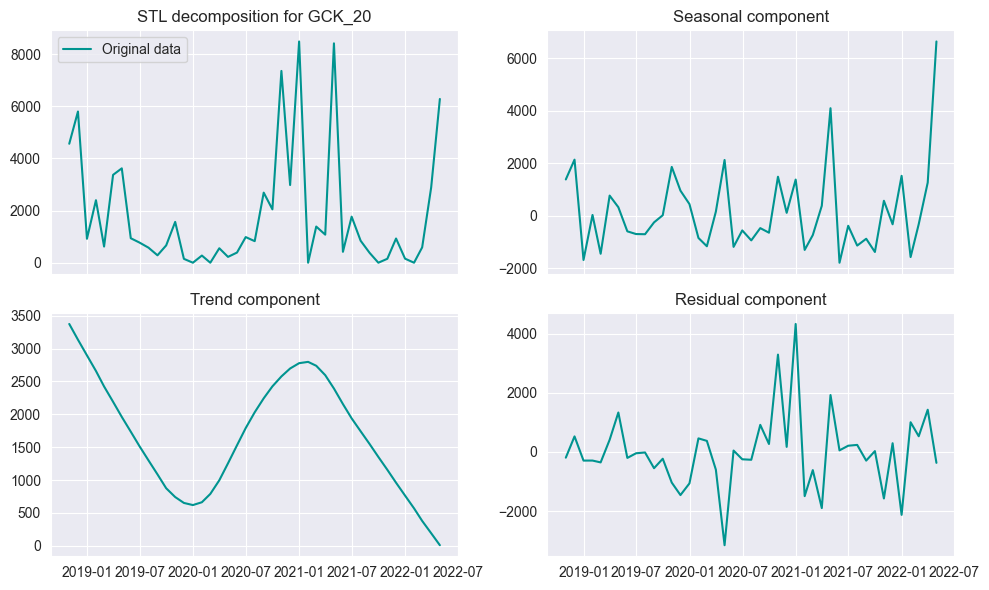

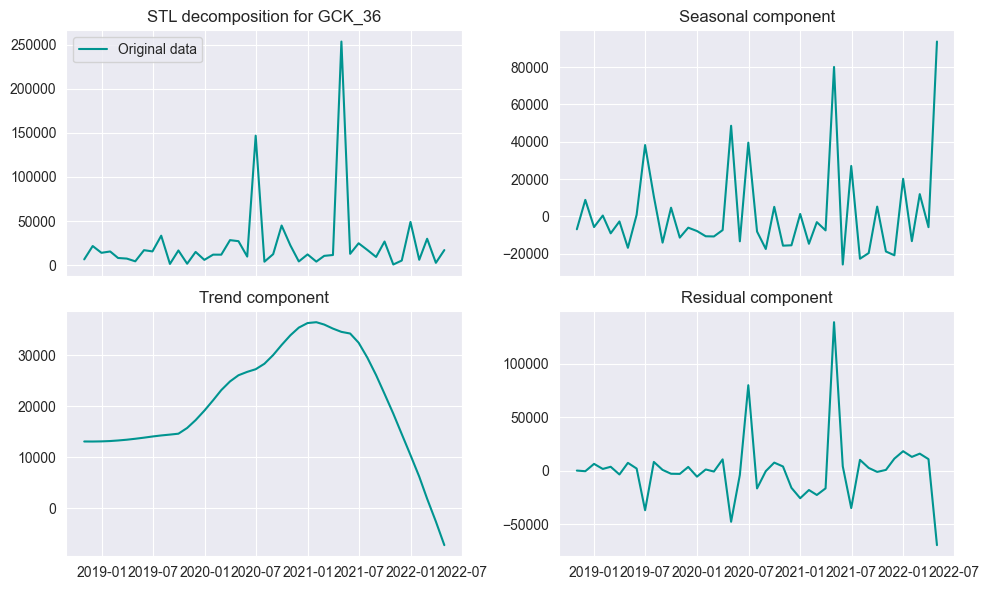

In [357]:
# Plot Trend and Seasonality Plots for each Product Category
for col in sales_data.columns:
    stl_decomposition(sales_data, col)

<a class="anchor" id="subtitle6.2.8">
    
### 6.2.8. Visual Exploration
    
</a>

**Total Sales by Month & Product**

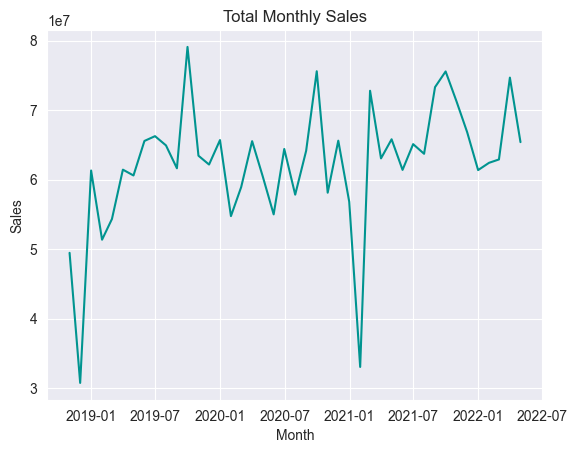

In [358]:
# Calculate total monthly sales
monthly_sales = sales_data.sum(axis=1)

# Create a line chart
plt.plot(monthly_sales.index, monthly_sales,color=main_color)

# Set the plot title and axis labels
plt.title("Total Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

# Show the plot
plt.show()

In [359]:
# Some major sales decline, especially in January 2021.
# Some major sales rises, around September of each year.

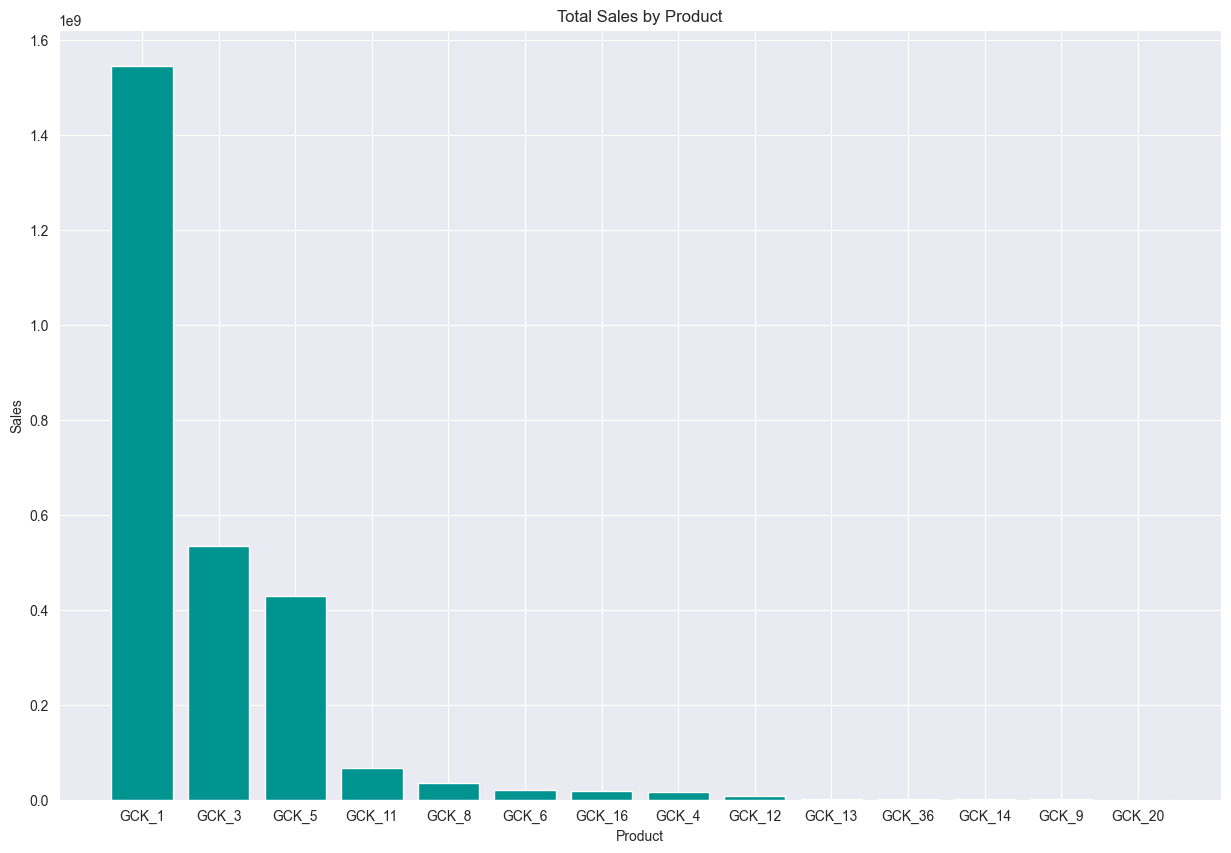

In [360]:
# Calculate total sales by product
total_sales_by_product = sales_data.sum(axis=0).sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(15, 10))
plt.bar(total_sales_by_product.index, total_sales_by_product,color=main_color)

# Set the plot title and axis labels
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Sales")

# Show the plot
plt.show()

In [361]:
# Product group 1, 3 and 5 are the top three products with the highest accumulated sales.

**Product Composition**

In [362]:
# Convert the index to a column of dates
sales_data.reset_index(inplace=True)

# Melt the data to create a "long" format with separate rows for each product
sales_data_melted = sales_data.melt(id_vars='date', var_name='Product', value_name='Sales')

# Pivot the data to create a matrix of sales values by date and product
sales_pivot = sales_data_melted.pivot("date", "Product", "Sales")

In [363]:
sales_data.head()

Mapped_GCK       date        GCK_1        GCK_3      GCK_4       GCK_5  \
0          2018-10-31  36098918.79   8089465.96  397760.69  2499061.19   
1          2018-11-30   5140760.00  11863001.51  371322.42  8993944.04   
2          2018-12-31  37889612.12   8736859.39  430100.96  6947507.31   
3          2019-01-31  27728148.35  10705300.63  484173.88  8233205.07   
4          2019-02-28  34793163.53  10167796.86  620031.80  6879250.99   

Mapped_GCK      GCK_6      GCK_8    GCK_9      GCK_11    GCK_12    GCK_13  \
0           369231.60  586052.74  3219.32  1021303.50  28686.33  27666.10   
1           473046.96  526292.77  1875.90  1898844.80   1070.00  68180.00   
2           999472.69  271490.71     0.00  1226122.00  17880.60  15655.18   
3           598874.10  381400.15  1487.00  2216391.74  21484.00  27198.29   
4           542037.52  368475.57  3234.28   610456.60  34214.74  32638.63   

Mapped_GCK   GCK_14      GCK_16   GCK_20    GCK_36  
0            5770.0   333196.87  4563.14   6474.60  
1           17130.0  1377694.32  5798.14  21617.61  
2               0.0  4762524.66   918.65  13924.52  
3            1686.4   942957.19  2398.04  15444.39  
4           19196.3   257765.04   620.66   8051.15

In [364]:
sales_data.describe(include='all')

Mapped_GCK                 date         GCK_1         GCK_3          GCK_4  \
count                        43  4.300000e+01  4.300000e+01      43.000000   
unique                       43           NaN           NaN            NaN   
top         2018-10-31 00:00:00           NaN           NaN            NaN   
freq                          1           NaN           NaN            NaN   
first       2018-10-31 00:00:00           NaN           NaN            NaN   
last        2022-04-30 00:00:00           NaN           NaN            NaN   
mean                        NaN  3.591177e+07  1.240566e+07  363423.371163   
std                         NaN  5.905117e+06  2.577332e+06  155710.914233   
min                         NaN  5.140760e+06  3.804320e+06   93226.320000   
25%                         NaN  3.440896e+07  1.105907e+07  279799.480000   
50%                         NaN  3.732390e+07  1.231748e+07  329430.960000   
75%                         NaN  3.888867e+07  1.377567e+07  428161.150000   
max                         NaN  4.448301e+07  1.868682e+07  829442.330000   

Mapped_GCK         GCK_5          GCK_6         GCK_8         GCK_9  \
count       4.300000e+01      43.000000  4.300000e+01     43.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
first                NaN            NaN           NaN           NaN   
last                 NaN            NaN           NaN           NaN   
mean        9.990585e+06  480043.964884  8.109586e+05   7173.174651   
std         3.731564e+06  242286.217600  5.436111e+05   8231.269282   
min         1.405295e+06  -15202.960000  1.117913e+05  -4358.100000   
25%         7.703432e+06  316055.490000  3.749379e+05   1626.700000   
50%         9.232238e+06  499147.730000  5.998319e+05   4488.090000   
75%         1.180077e+07  611987.120000  1.092310e+06   9583.200000   
max         1.952464e+07  999472.690000  2.655037e+06  39510.750000   

Mapped_GCK        GCK_11         GCK_12        GCK_13        GCK_14  \
count       4.300000e+01      43.000000     43.000000     43.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
first                NaN            NaN           NaN           NaN   
last                 NaN            NaN           NaN           NaN   
mean        1.532589e+06  192546.193488  23468.765349  11484.233953   
std         9.811598e+05  141016.785899  16140.161949  16116.168947   
min         1.820000e+04    1070.000000   2550.310000  -2851.450000   
25%         9.035992e+05   39235.210000  10466.465000   2015.025000   
50%         1.226122e+06  172712.880000  20663.640000   5951.850000   
75%         2.161184e+06  321795.050000  30966.410000  15305.890000   
max         3.891448e+06  445648.060000  68180.000000  76161.440000   

Mapped_GCK        GCK_16       GCK_20         GCK_36  
count       4.300000e+01    43.000000      43.000000  
unique               NaN          NaN            NaN  
top                  NaN          NaN            NaN  
freq                 NaN          NaN            NaN  
first                NaN          NaN            NaN  
last                 NaN          NaN            NaN  
mean        4.277018e+05  1821.554884   23223.579302  
std         7.824899e+05  2307.900214   42651.283687  
min         4.036008e+04     0.000000     674.000000  
25%         1.375541e+05   330.810000    6244.495000  
50%         2.245019e+05   842.930000   12377.770000  
75%         3.283725e+05  2543.020000   21995.050000  
max         4.762525e+06  8485.600000  253519.040000

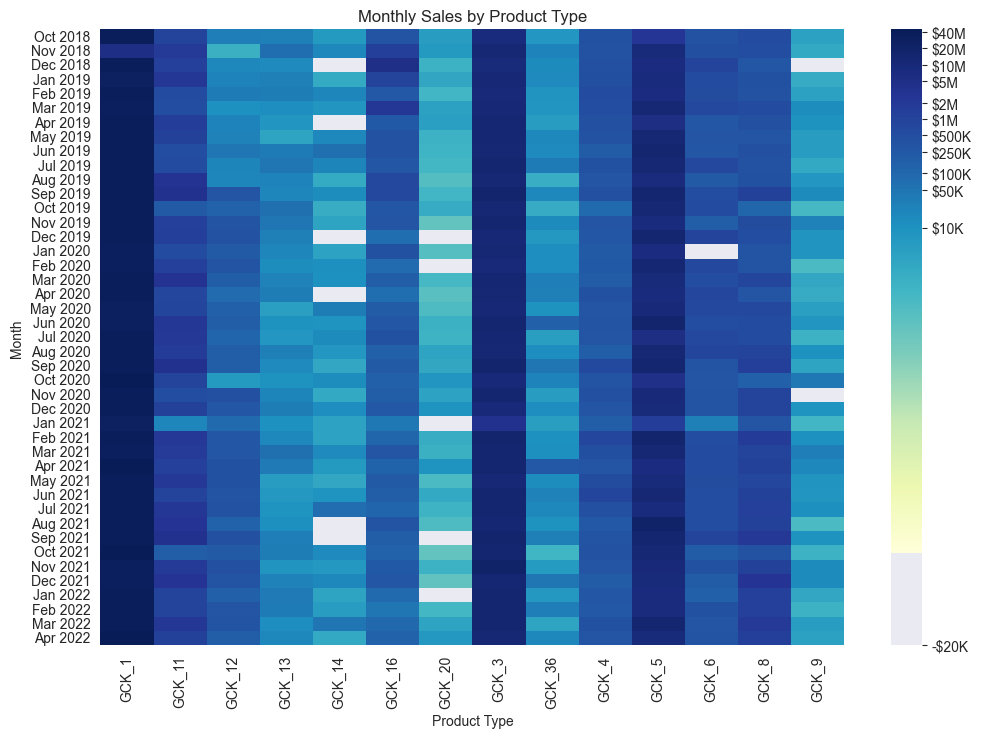

In [365]:
fig, ax = plt.subplots(figsize=(12, 8))
if sales_pivot.values.min() < 0:
    vmin = 0.01
else:
    vmin = None

heatmap = sns.heatmap(sales_pivot, cmap="YlGnBu", ax=ax, norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=sales_pivot.max().max()), fmt=".1f")

# Format the date labels
date_labels = [d.strftime('%b %Y') for d in sales_pivot.index]
ax.set_yticklabels(date_labels)

# Set the colorbar ticks
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([2e-4, 10000, 50000, 100000, 250000, 500000, 1000000, 2000000, 5000000, 10000000, 20000000, 40000000])
cbar.set_ticklabels(['-$20K', '$10K', '$50K', '$100K', '$250K', '$500K', '$1M', '$2M', '$5M', '$10M', '$20M', '$40M'])

plt.title("Monthly Sales by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Month")
plt.show()

In [366]:
# Here we can have a quick look at our sales data.
# There are four Products (14, 20, 6, 9) with null or negative sales months.
# Products 9, 13, 14 and 20 being the company’s smallest products, sales-wise.

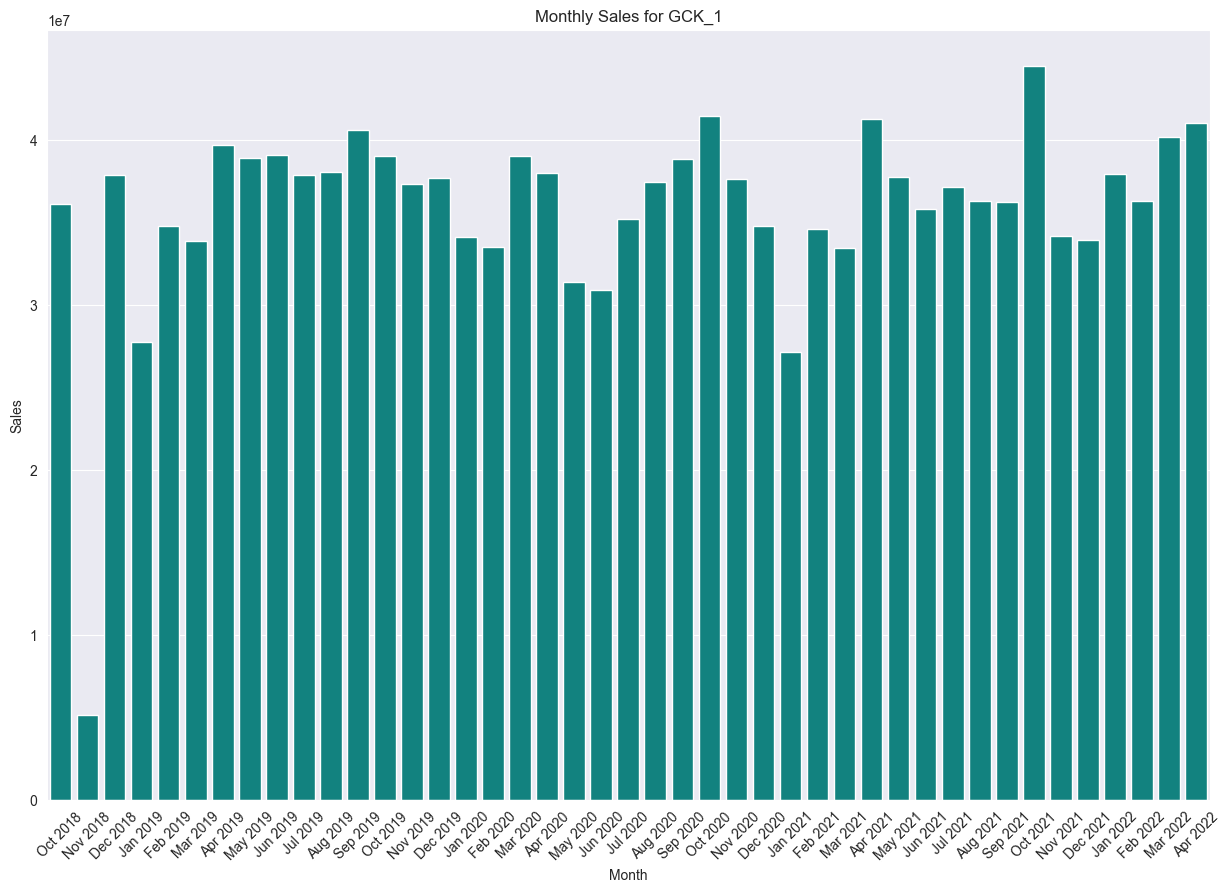

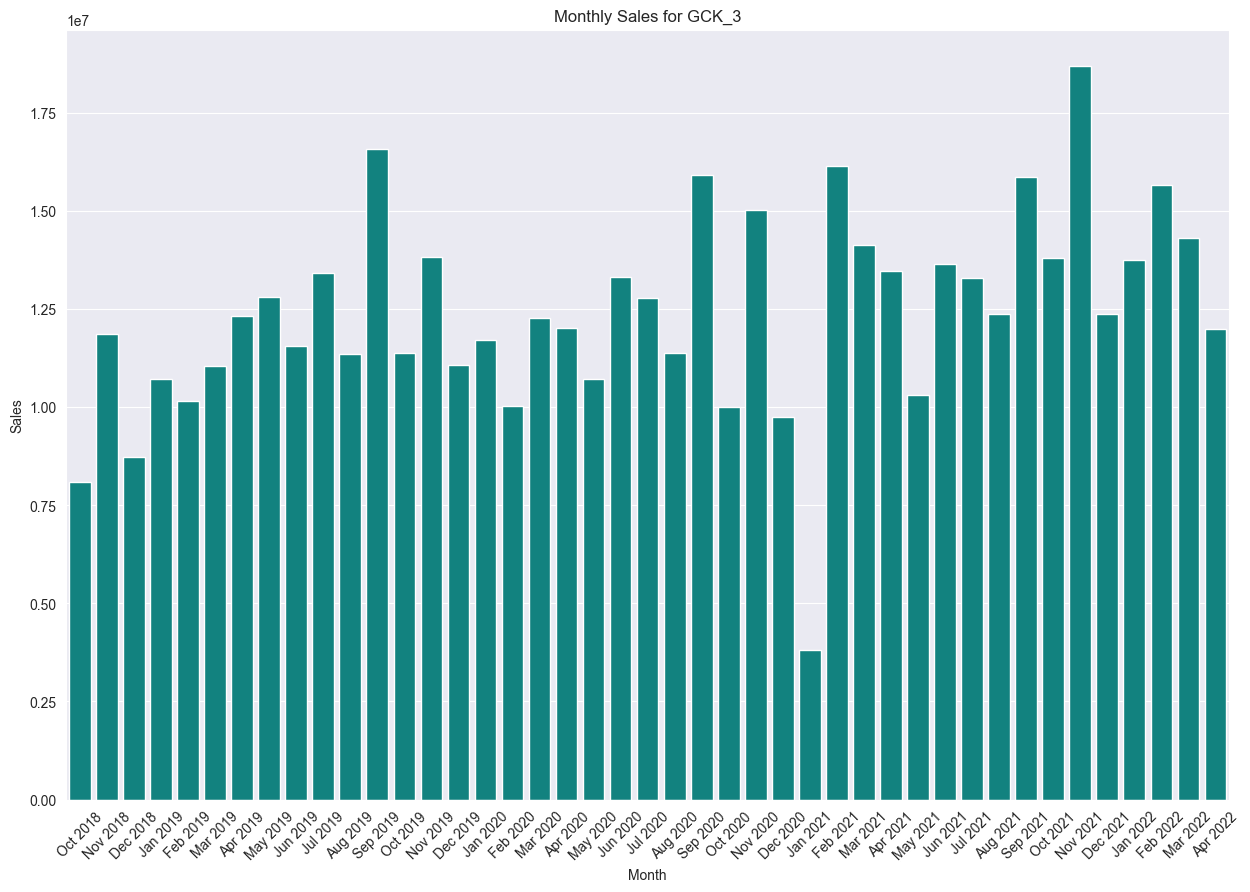

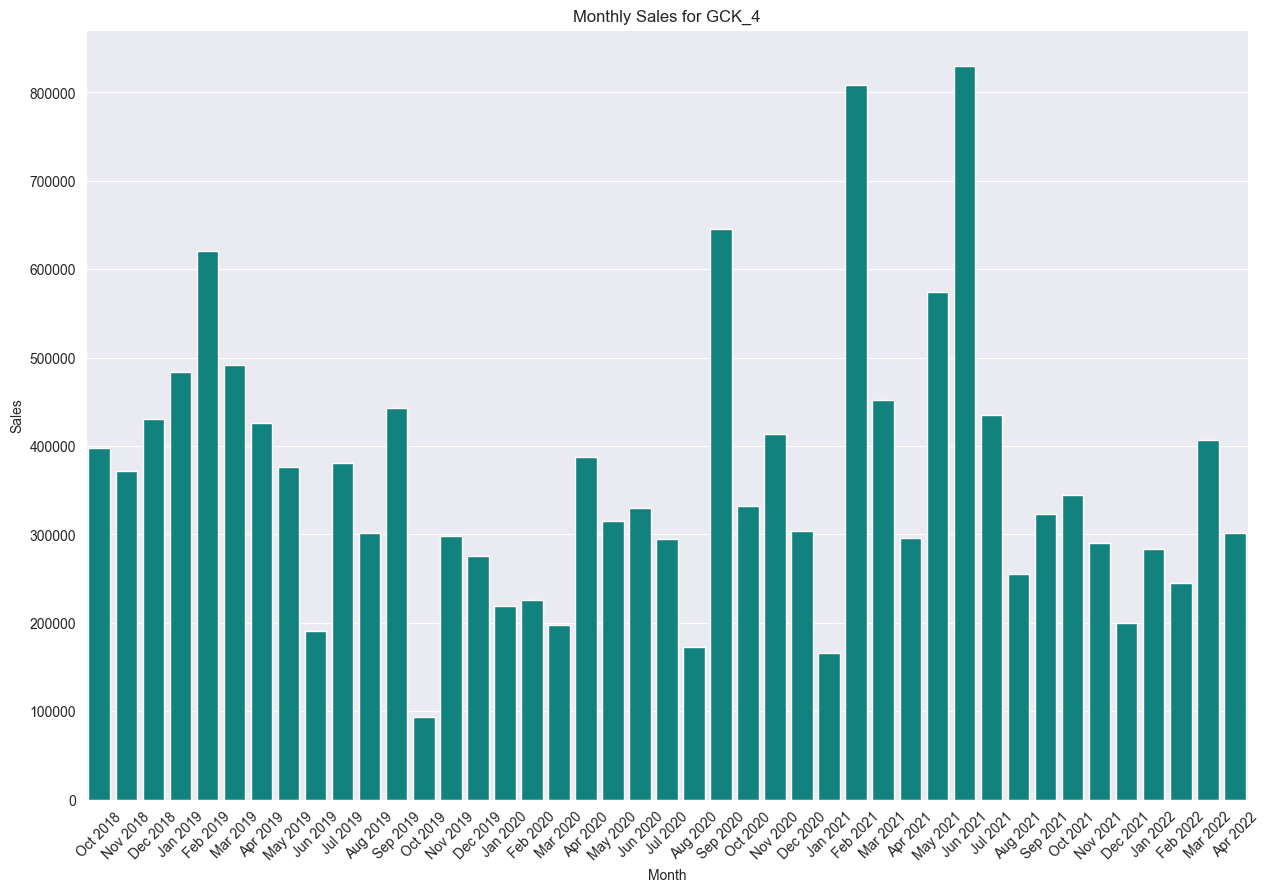

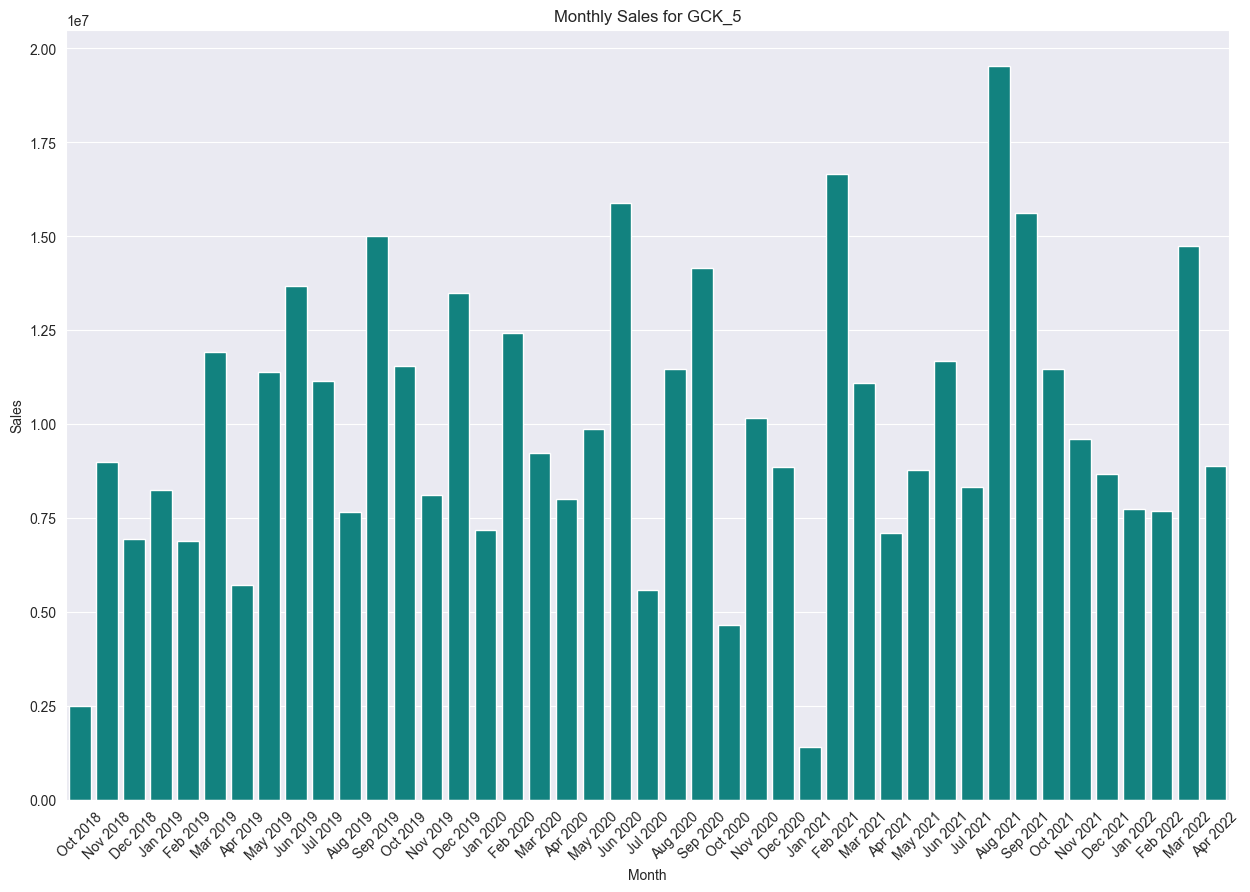

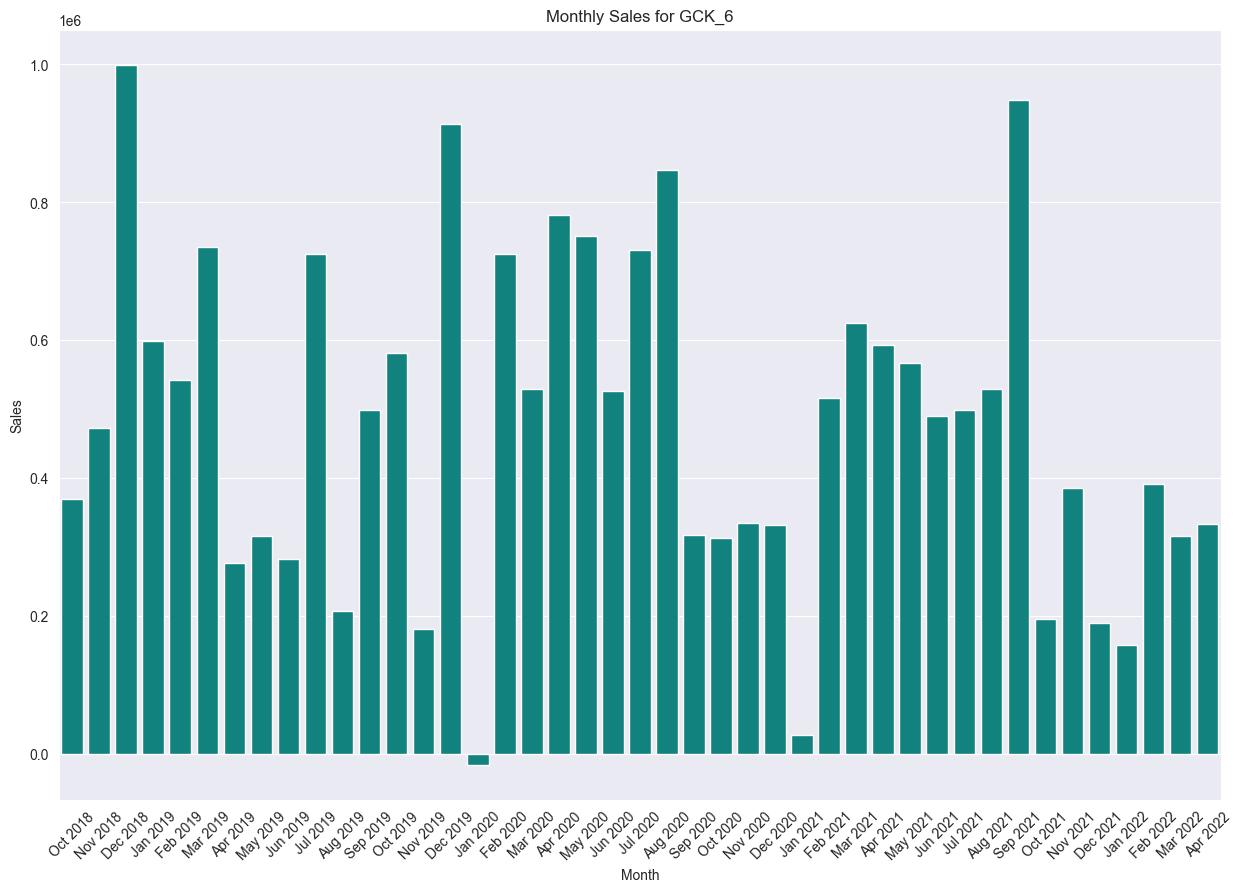

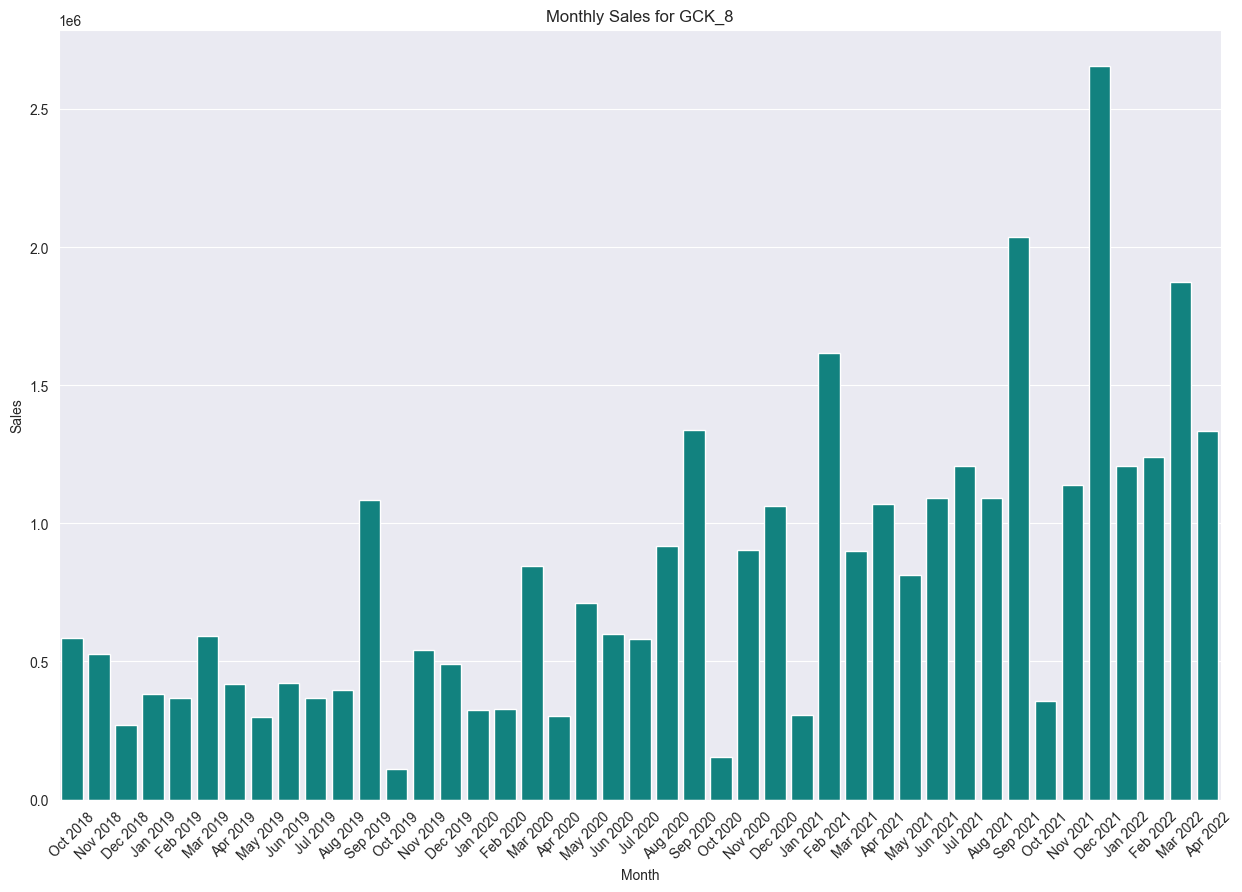

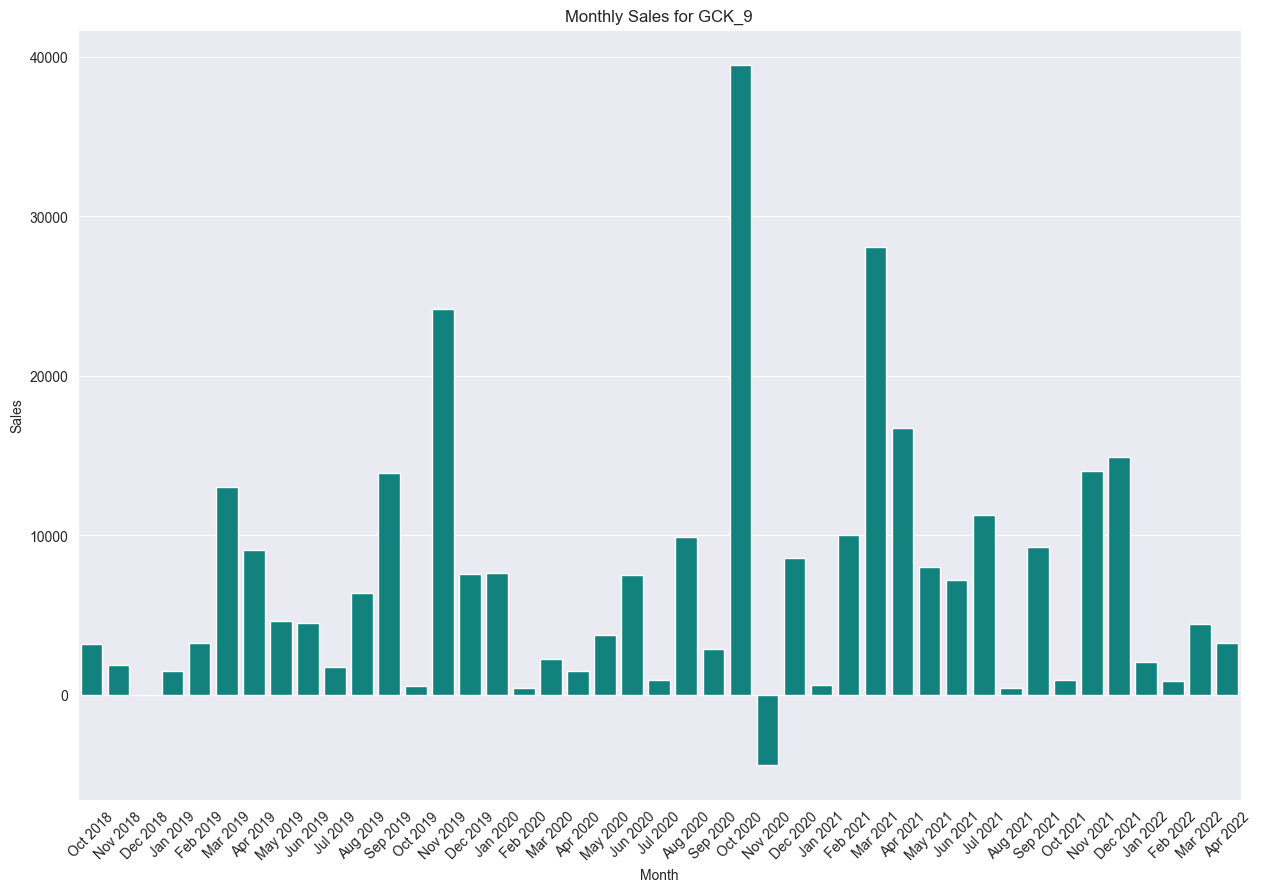

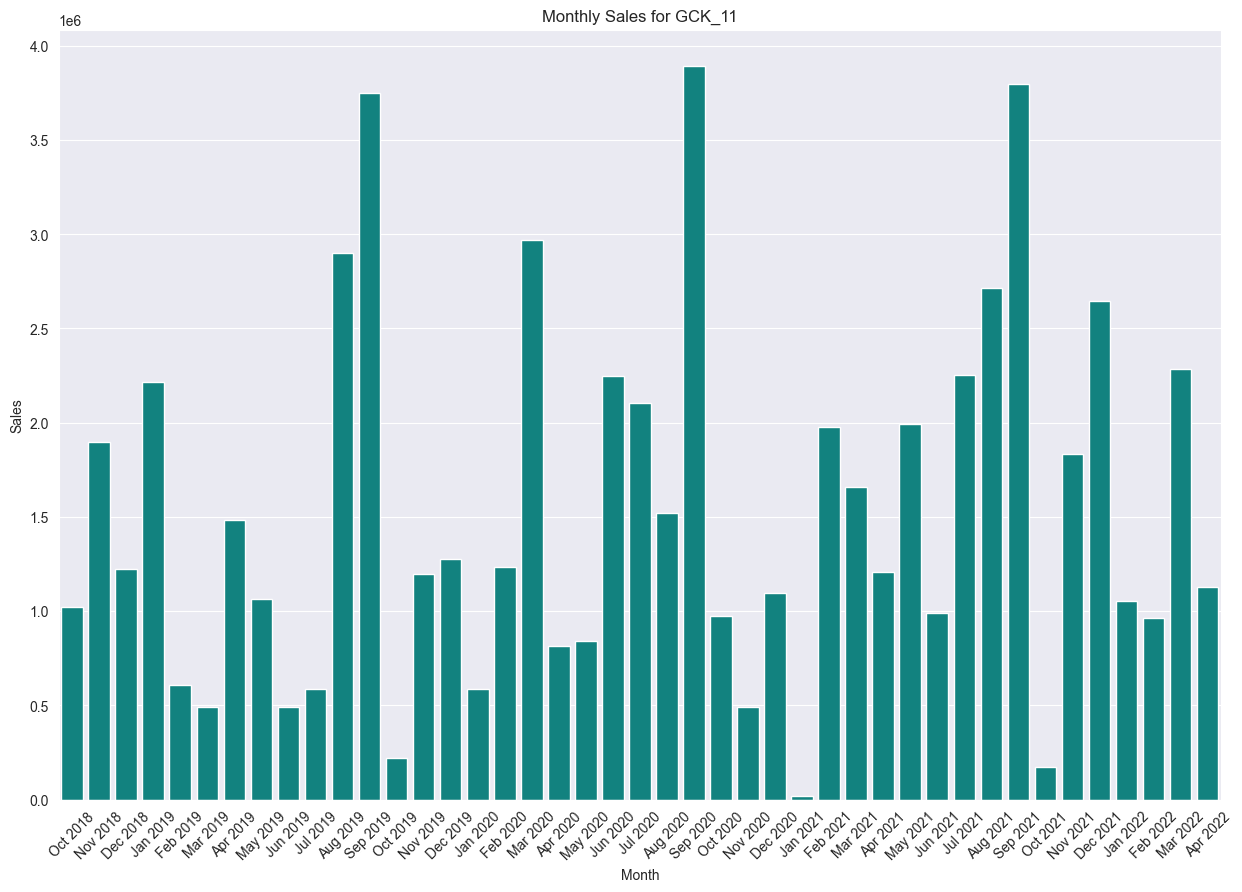

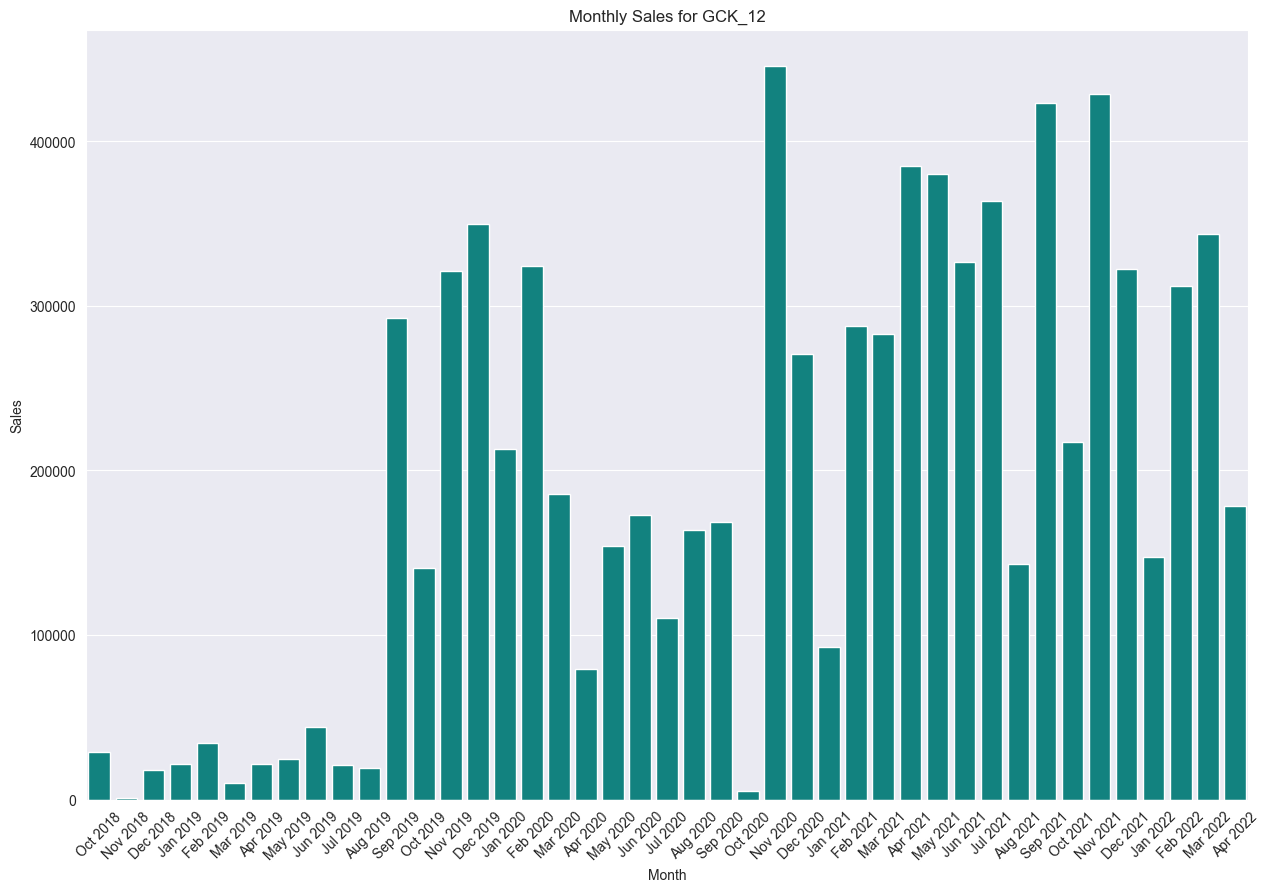

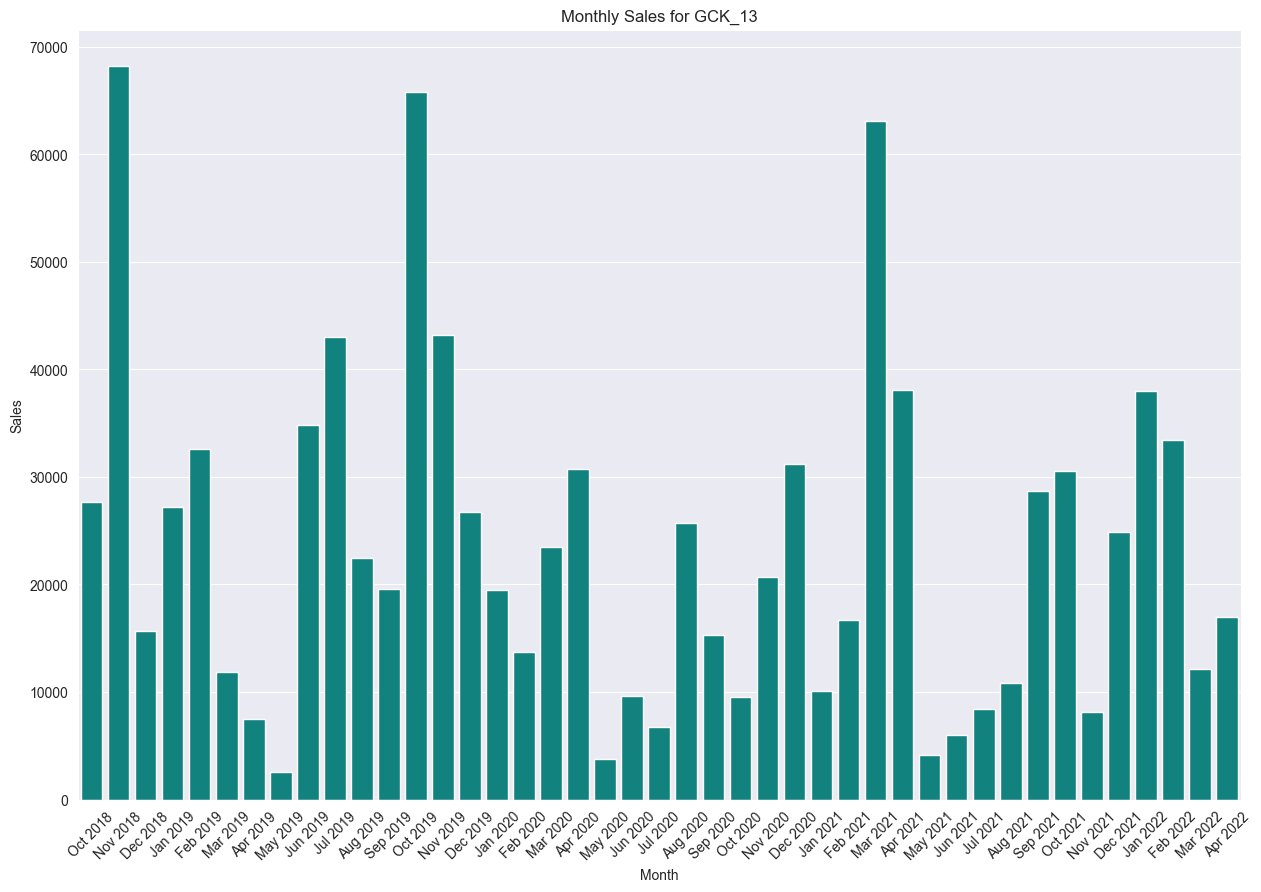

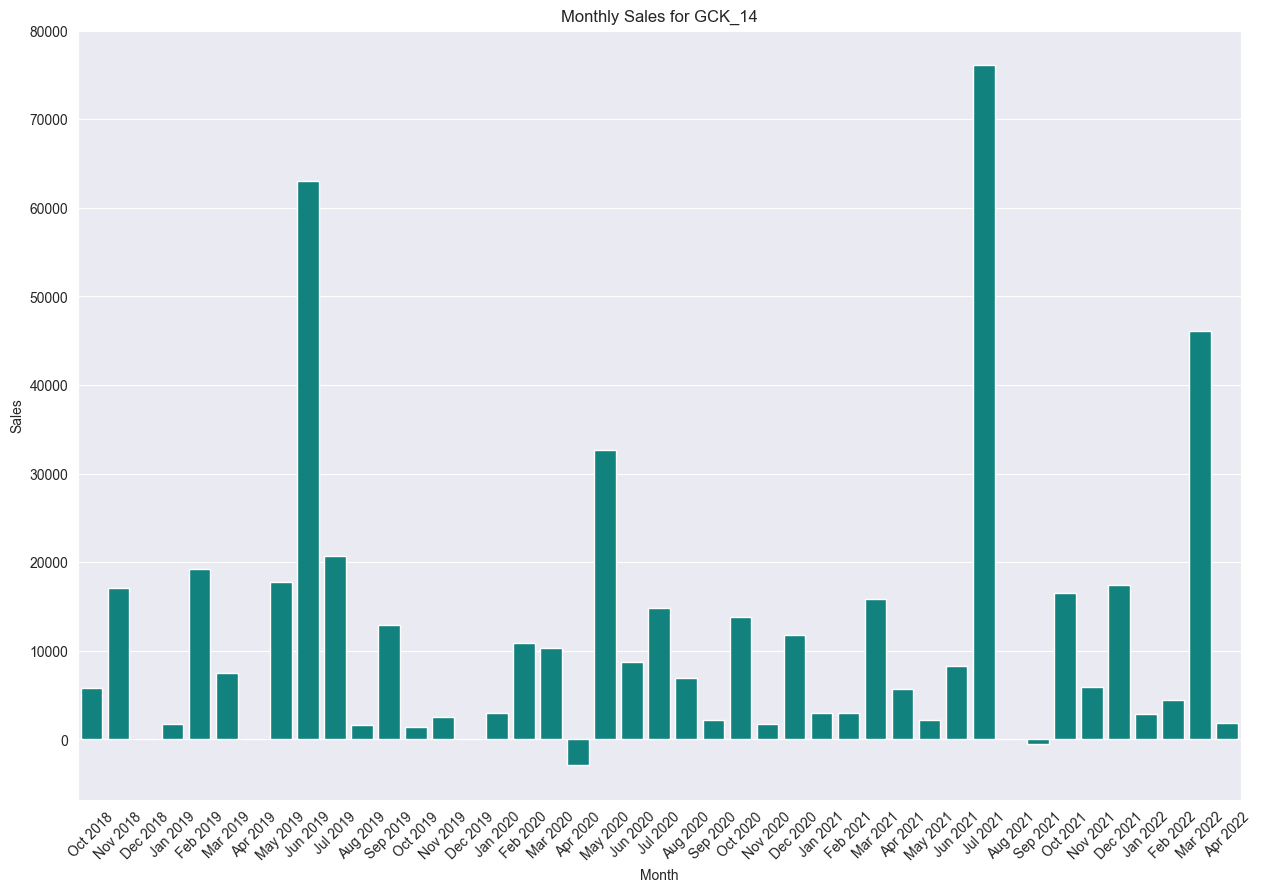

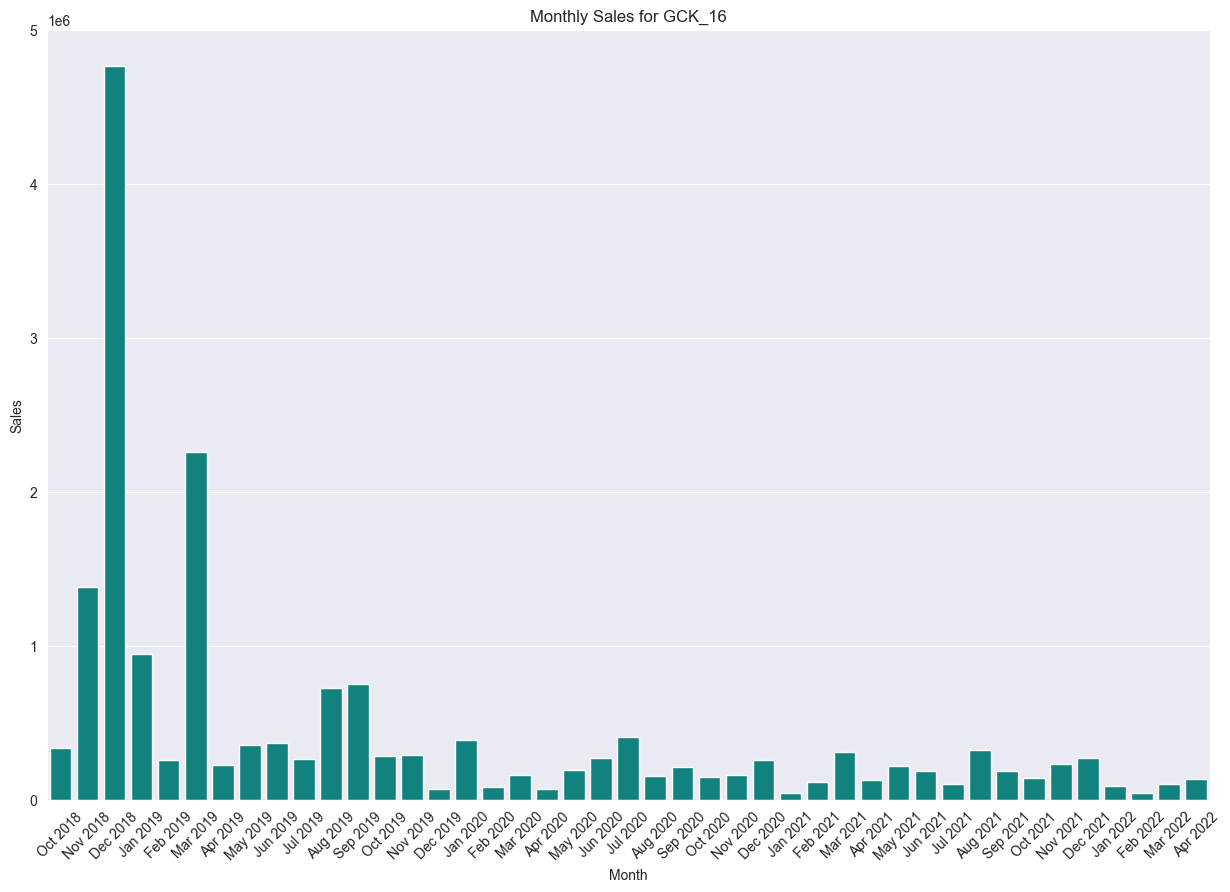

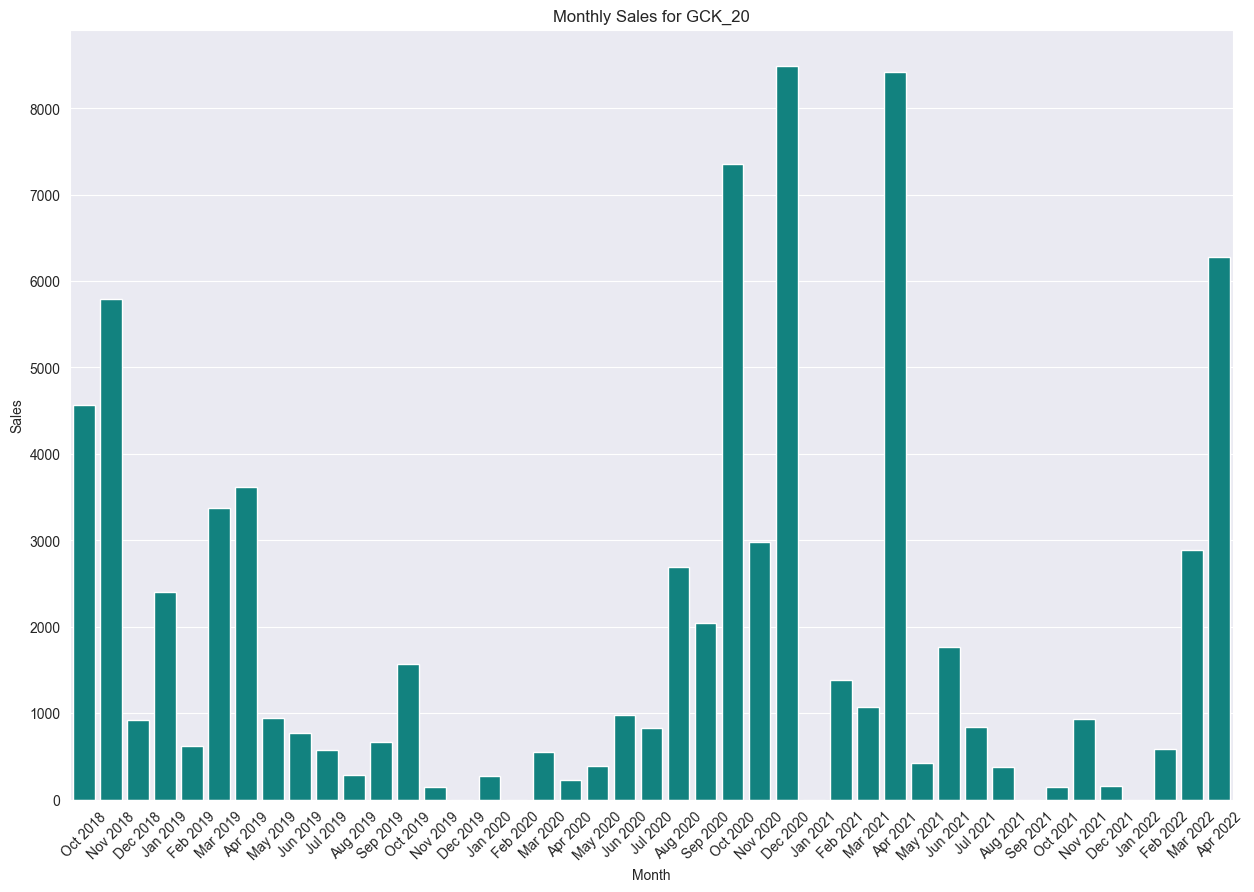

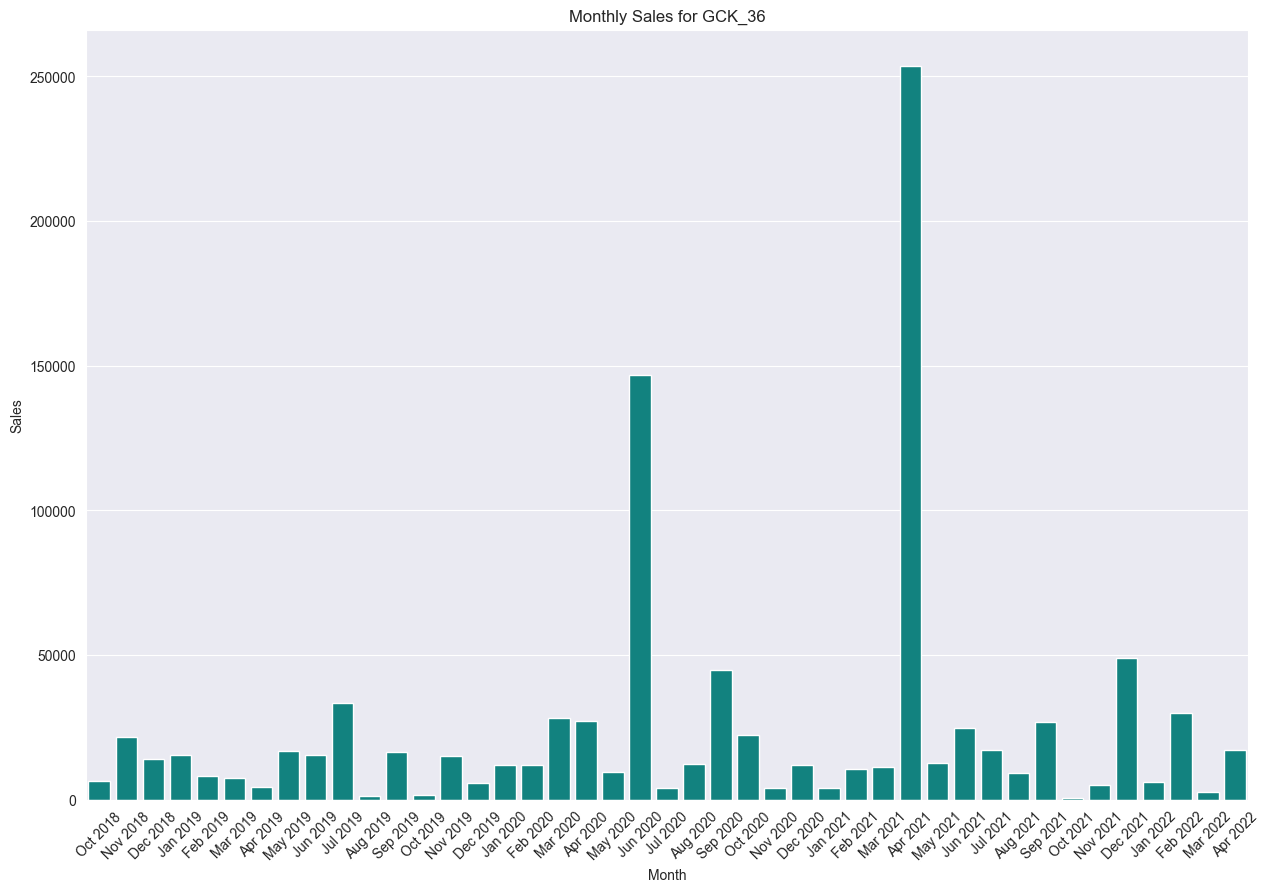

In [367]:
# Get a list of all unique product types
product_types = sales_data.columns.tolist()[1:]

# Plot each product type once
for product_type in product_types:
    plot_monthly_sales_by_product_type(sales_data, product_type)

In [368]:
# Product 1 and 3 showed overall constant sales values with a strong breakdown in one of the months. 
# Product 8 sales increased over time while Product 16 having an unusual sales month and from there slowly decreasing its sales.
# Product 11 seems to have a cyclic behavior having exceptionally great sales every September and dropping sales values 
#by at least more than two thirds right on the next month.

In [369]:
# Set the 'date' column as the index
sales_data.set_index('date', inplace=True)

<a class="anchor" id="covid_exploration">
    
## 6.3. Covid Data
    
</a>

In [370]:
covid_data.head()

Cases_China  Cases_Europe  Cases_France  Cases_Germany  \
date                                                                 
2020-01-31       9720.0          25.0           6.0            6.0   
2020-02-29      69669.0        1227.0          51.0          106.0   
2020-03-31       3156.0      443246.0       43920.0        67912.0   
2020-04-30       1828.0      856524.0       83089.0        92795.0   
2020-05-31        197.0      612418.0       21170.0        21068.0   

            Cases_Italy  Cases_Japan  Cases_Switzerland  Cases_United Kingdom  \
date                                                                            
2020-01-31          3.0         12.0                0.0                   0.0   
2020-02-29        885.0        218.0               32.0                  56.0   
2020-03-31     100851.0       1723.0            17877.0               29316.0   
2020-04-30     101852.0      12135.0            11768.0              137022.0   
2020-05-31      29073.0       2763.0             1156.0               87826.0   

            Cases_United States  Deaths_China  ...  Deaths_United States  \
date                                           ...                         
2020-01-31                  8.0         213.0  ...                   0.0   
2020-02-29                 61.0        2625.0  ...                   1.0   
2020-03-31             173074.0         476.0  ...                3326.0   
2020-04-30             857163.0        1329.0  ...               57134.0   
2020-05-31             755116.0           2.0  ...               44864.0   

            Stringency_China  Stringency_Europe  Stringency_France  \
date                                                                 
2020-01-31         58.336000                NaN           5.004000   
2020-02-29         76.992759                NaN           7.714483   
2020-03-31         79.526452                NaN          65.738710   
2020-04-30         60.213000                NaN          87.960000   
2020-05-31         74.681935                NaN          80.075806   

            Stringency_Germany  Stringency_Italy  Stringency_Japan  \
date                                                                 
2020-01-31            4.448000          4.723000          2.780000   
2020-02-29           10.154483         31.174828         21.804483   
2020-03-31           48.774516         80.424516         41.158710   
2020-04-30           76.850000         90.650333         45.739667   
2020-05-31           63.841935         73.684516         41.994194   

            Stringency_Switzerland  Stringency_United Kingdom  \
date                                                            
2020-01-31                0.000000                   5.837000   
2020-02-29                2.394138                  11.014138   
2020-03-31               49.372903                  36.633226   
2020-04-30               72.655333                  79.630000   
2020-05-31               61.735161                  74.225161   

            Stringency_United States  
date                                  
2020-01-31                  0.000000  
2020-02-29                  7.183103  
2020-03-31                 45.864194  
2020-04-30                 72.690000  
2020-05-31                 72.690000  

[5 rows x 27 columns]

In [371]:
covid_data.shape

(40, 27)

<a class="anchor" id="subtitle6.3.1">
    
### 6.3.1. Missing Values
    
</a>

In [372]:
covid_data.isna().sum()
#There are no missing values


Cases_China                   0
Cases_Europe                  0
Cases_France                  0
Cases_Germany                 0
Cases_Italy                   0
Cases_Japan                   0
Cases_Switzerland             0
Cases_United Kingdom          0
Cases_United States           0
Deaths_China                  0
Deaths_Europe                 0
Deaths_France                 0
Deaths_Germany                0
Deaths_Italy                  0
Deaths_Japan                  0
Deaths_Switzerland            0
Deaths_United Kingdom         0
Deaths_United States          0
Stringency_China              4
Stringency_Europe            40
Stringency_France             4
Stringency_Germany            4
Stringency_Italy              4
Stringency_Japan              4
Stringency_Switzerland        4
Stringency_United Kingdom     4
Stringency_United States      4
dtype: int64

<a class="anchor" id="subtitle6.3.2">
    
### 6.3.2. Duplicated Columns/ Cases distribution amongst countries
    
</a>

In [373]:
# Checking columns with same descriptive statistics
describe_df=covid_data.describe().T
describe_df[describe_df.duplicated(keep=False)]
#There are no countries with the same exact cases distribution.

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<a class="anchor" id="subtitle6.3.3">
    
### 6.3.3. Duplicated Values
    
</a>

In [374]:
covid_data.duplicated(keep=False).sum()
#There no duplicated rows

0

<a class="anchor" id="subtitle6.3.4">
    
### 6.3.4. Checking inconsistencies
    
</a>

**Different date index ranges**

In [375]:
print("Sales Data: ", sales_data.index.min(),"|", sales_data.index.max())
print("Covid Data: ", covid_data.index.min(),"|",  covid_data.index.max())
# Market_data dates don't coincide with the sales dales

Sales Data:  2018-10-31 00:00:00 | 2022-04-30 00:00:00
Covid Data:  2020-01-31 00:00:00 | 2023-04-30 00:00:00


<a class="anchor" id="subtitle6.3.5">
    
### 6.3.5. Descriptive Statistics
    
</a>

In [376]:
covid_data.describe(include='all',datetime_is_numeric=True).T
# Does not seem to have any errors
# Since values are hard to compare, due to different population sizes, 
# they will be divided by the count of 100k habitants for analysis.

count          mean           std         min  \
                                                                           
Cases_China                 40.0  2.481111e+06  1.228701e+07  197.000000   
Cases_Europe                40.0  6.221330e+06  8.014297e+06   25.000000   
Cases_France                40.0  9.722719e+05  1.591993e+06    6.000000   
Cases_Germany               40.0  9.599115e+05  1.409449e+06    6.000000   
Cases_Italy                 40.0  6.441305e+05  9.280765e+05    3.000000   
Cases_Japan                 40.0  8.411975e+05  1.404539e+06   12.000000   
Cases_Switzerland           40.0  1.100343e+05  1.903263e+05    0.000000   
Cases_United Kingdom        40.0  6.142474e+05  8.539429e+05    0.000000   
Cases_United States         40.0  2.577036e+06  3.324980e+06    8.000000   
Deaths_China                40.0  3.023075e+03  1.056891e+04    0.000000   
Deaths_Europe               40.0  5.135568e+04  4.612729e+04    0.000000   
Deaths_France               40.0  4.066025e+03  4.662451e+03    0.000000   
Deaths_Germany              40.0  4.315875e+03  5.307048e+03    0.000000   
Deaths_Italy                40.0  4.739550e+03  5.157611e+03    0.000000   
Deaths_Japan                40.0  1.859750e+03  2.399537e+03    0.000000   
Deaths_Switzerland          40.0  3.497000e+02  6.218875e+02    0.000000   
Deaths_United Kingdom       40.0  5.584900e+03  8.065933e+03    0.000000   
Deaths_United States        40.0  2.810640e+04  2.345472e+04    0.000000   
Stringency_China            36.0  7.121632e+01  7.151887e+00   52.987742   
Stringency_Europe            0.0           NaN           NaN         NaN   
Stringency_France           36.0  4.238514e+01  2.375649e+01    5.004000   
Stringency_Germany          36.0  4.455041e+01  2.532337e+01    4.448000   
Stringency_Italy            36.0  5.241205e+01  2.449573e+01    4.723000   
Stringency_Japan            36.0  4.039222e+01  1.017970e+01    2.780000   
Stringency_Switzerland      36.0  3.486282e+01  2.137770e+01    0.000000   
Stringency_United Kingdom   36.0  4.321086e+01  2.755113e+01    5.560000   
Stringency_United States    36.0  4.840424e+01  1.974984e+01    0.000000   

                                    25%           50%           75%  \
                                                                      
Cases_China                1.772250e+03  4.849000e+03  5.279748e+05   
Cases_Europe               1.432136e+06  4.159135e+06  6.623988e+06   
Cases_France               1.352805e+05  4.689135e+05  9.284932e+05   
Cases_Germany              6.301175e+04  3.793260e+05  1.254626e+06   
Cases_Italy                9.548075e+04  3.181475e+05  8.831132e+05   
Cases_Japan                1.698125e+04  1.411415e+05  1.012678e+06   
Cases_Switzerland          7.797500e+03  5.127100e+04  1.192638e+05   
Cases_United Kingdom       9.246775e+04  2.078420e+05  9.251048e+05   
Cases_United States        1.012037e+06  1.796069e+06  2.926205e+06   
Deaths_China               8.000000e+00  1.265000e+02  1.684500e+03   
Deaths_Europe              1.559575e+04  3.157450e+04  8.933025e+04   
Deaths_France              1.005000e+03  2.071500e+03  4.759000e+03   
Deaths_Germany             8.497500e+02  2.688500e+03  5.679250e+03   
Deaths_Italy               1.243000e+03  2.418000e+03  6.346250e+03   
Deaths_Japan               3.405000e+02  1.083500e+03  2.214500e+03   
Deaths_Switzerland         4.500000e+01  1.205000e+02  3.367500e+02   
Deaths_United Kingdom      1.413750e+03  3.239500e+03  4.625750e+03   
Deaths_United States       1.134950e+04  2.106450e+04  4.158300e+04   
Stringency_China           6.768137e+01  7.343065e+01  7.715090e+01   
Stringency_Europe                   NaN           NaN           NaN   
Stringency_France          1.881218e+01  4.347122e+01  6.262679e+01   
Stringency_Germany         1.684339e+01  4.584484e+01  6.524145e+01   
Stringency_Italy           2.901128e+01  5.556796e+01  7.154863e+01   
Stringency_Japan           3.498150e+01  4.3531

<a class="anchor" id="subtitle6.3.6">
    
### 6.3.6. Normalizing Cases by 100k Habitants
    
</a>

In [377]:
# This step is crucial to be done before visual exploration, 
# to enable a better comparison of the impact in each location
# Count of 100k habitants for each location
populations_100k = {
    'China': 14402,
    'Europe': 7476,
    'France': 670,
    'Germany': 830,
    'Italy': 604,
    'Japan': 12615,
    'Switzerland': 865,
    'United Kingdom': 678,
    'United States': 3314
}

for col in covid_data.columns:
    location = col.split("_")[1]
    covid_data[col] =covid_data[col] / populations_100k[location] 

<a class="anchor" id="subtitle6.3.7">
    
### 6.3.7. Visual Exploration
    
</a>

**Cases**

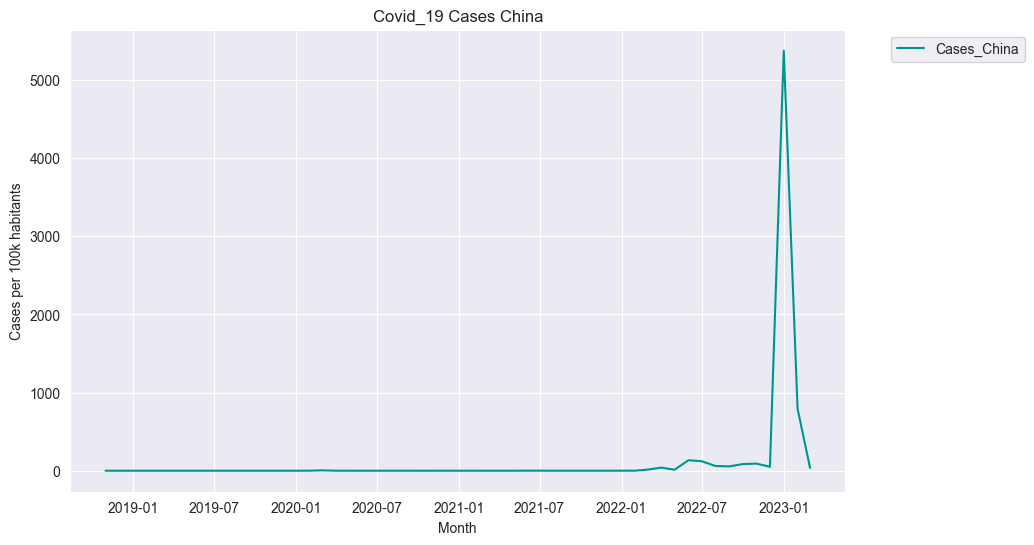

In [470]:
# Create a line chart for New Cases - China
cases = covid_data.iloc[:,0:1]

plt.figure(figsize=(10, 6))
for col in cases.columns:
    plt.plot(cases.index, cases[col], label=col,color=main_color)
plt.title('Covid_19 Cases China')
plt.xlabel('Month')
plt.ylabel('Cases per 100k habitants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [471]:
# Only with a major increase during January 2023.

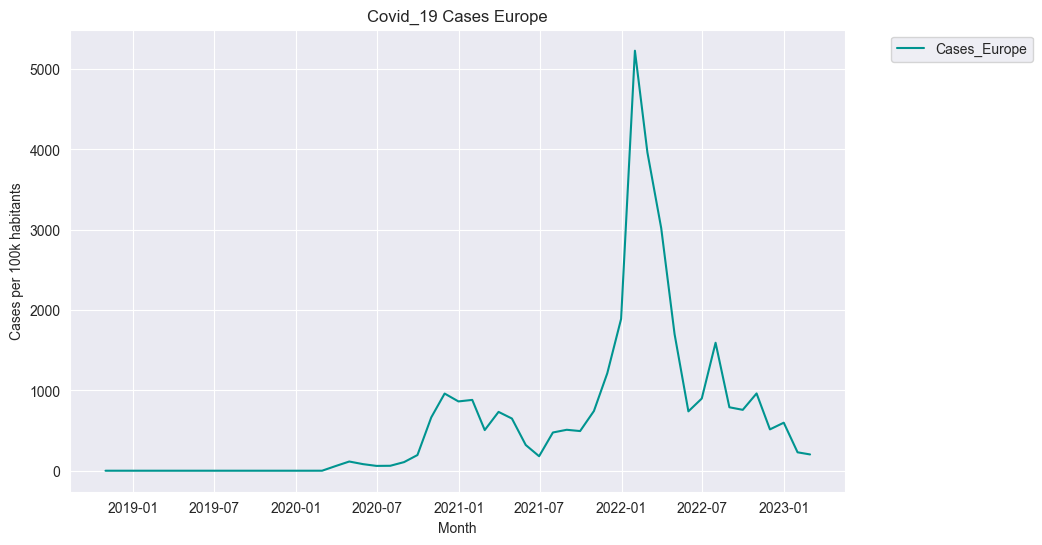

In [472]:
# Create a line chart for New Cases - Europe total
cases = covid_data.iloc[:,1:2]

plt.figure(figsize=(10, 6))
for col in cases.columns:
    plt.plot(cases.index, cases[col], label=col,color=main_color)
plt.title('Covid_19 Cases Europe')
plt.xlabel('Month')
plt.ylabel('Cases per 100k habitants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [473]:
# Various pandemic waves where the strongest one registered was in February 2022 and since then been decreasing.

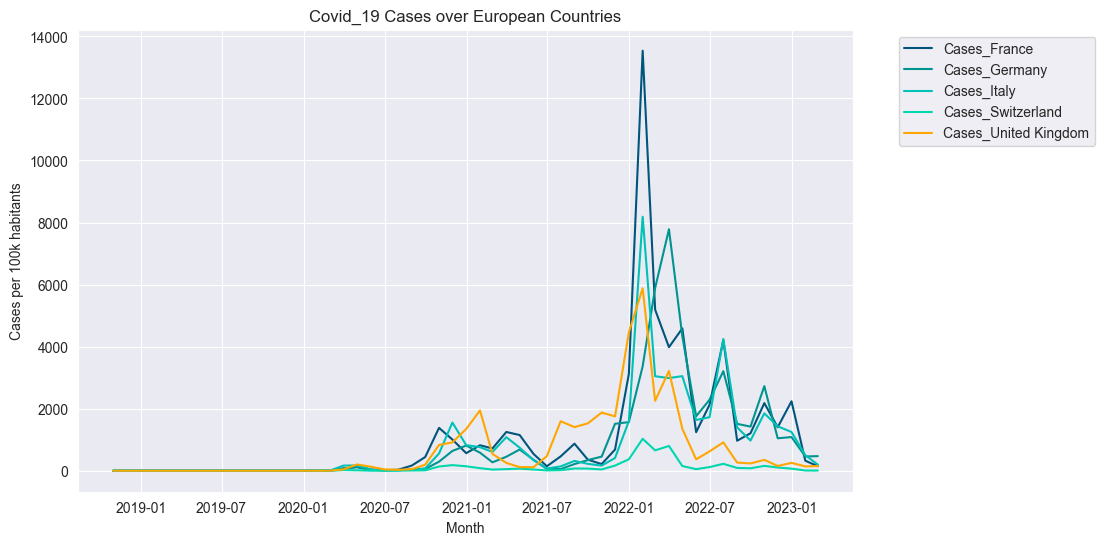

In [474]:
# Create a line chart for New Cases - European Countries
indexes_to_analyse=[2,3,4,6,7]
cases = covid_data.iloc[:,indexes_to_analyse]

plt.figure(figsize=(10, 6))
for i, col in enumerate(cases.columns):
    plt.plot(cases.index, cases[col], label=col, color=color_palette[i])
plt.title('Covid_19 Cases over European Countries')
plt.xlabel('Month')
plt.ylabel('Cases per 100k habitants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [475]:
# Similar data behavior. During one of the first larger waves UK registered the biggest number of cases per 100k habitants 
#while in the biggest one it was France.

**Deaths**

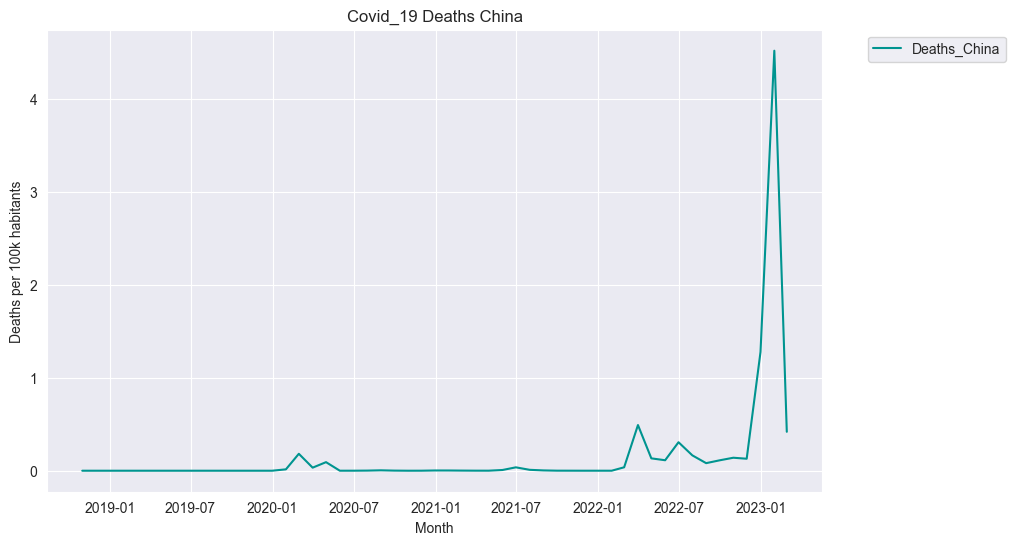

In [477]:
# Create a line chart for New Deaths - China
deaths = covid_data.iloc[:,9:10]

plt.figure(figsize=(10, 6))
for col in deaths.columns:
    plt.plot(deaths.index, deaths[col], label=col,color=main_color)
plt.title('Covid_19 Deaths China')
plt.xlabel('Month')
plt.ylabel('Deaths per 100k habitants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [478]:
# Same behavior as cases registered.

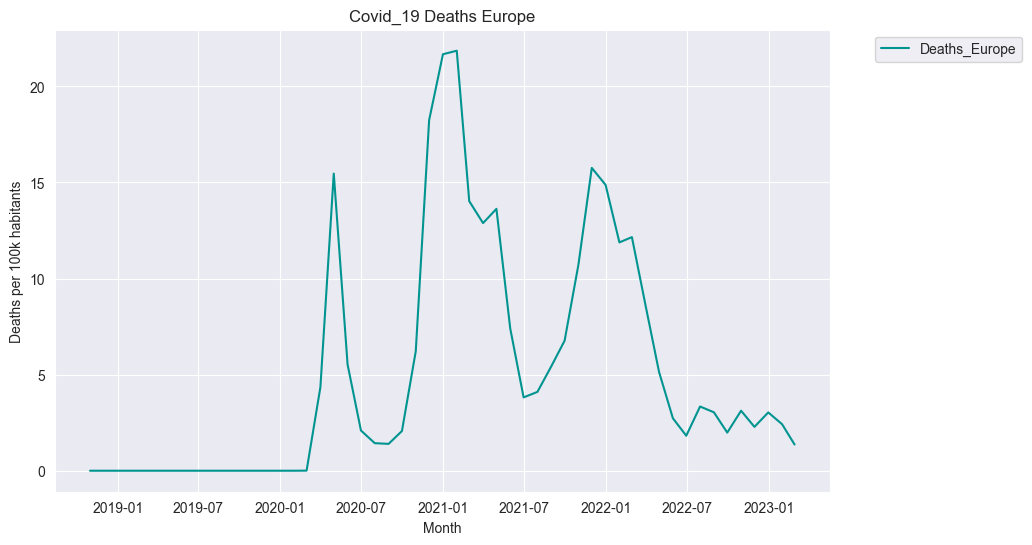

In [479]:
# Create a line chart for New Deaths - Europe total
deaths = covid_data.iloc[:,10:11]

plt.figure(figsize=(10, 6))
for col in deaths.columns:
    plt.plot(deaths.index, deaths[col], label=col,color=main_color)
plt.title('Covid_19 Deaths Europe')
plt.xlabel('Month')
plt.ylabel('Deaths per 100k habitants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [480]:
# Biggest proportion of deaths registered during the second wave with three main death waves registered. 

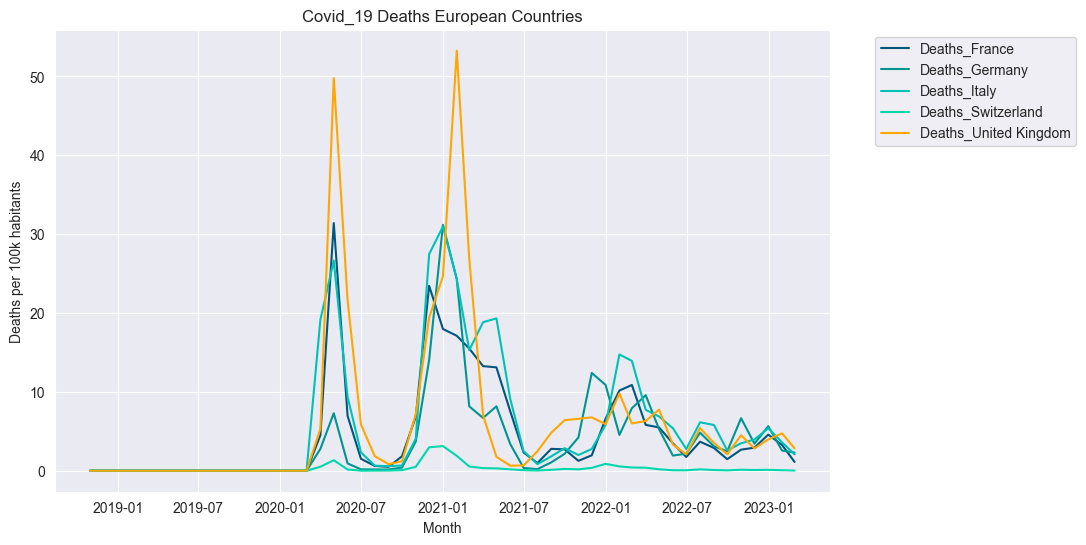

In [482]:
# Create a line chart for New Deaths - Europe total
indexes_to_analyse=[11,12,13,15,16]
deaths = covid_data.iloc[:,indexes_to_analyse]


plt.figure(figsize=(10, 6))
for i, col in enumerate(deaths.columns):
    plt.plot(deaths.index, deaths[col], label=col, color=color_palette[i])
plt.title('Covid_19 Deaths European Countries')
plt.xlabel('Month')
plt.ylabel('Deaths per 100k habitants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [483]:
# Same behavior as Europe total.

**Stringency**

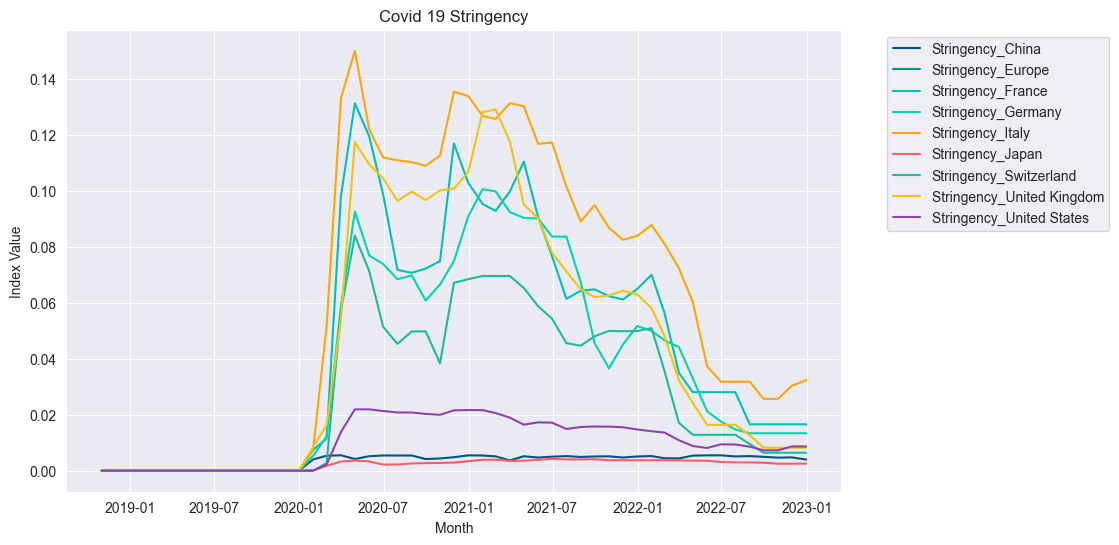

In [484]:
# Create a line chart for Strigency
deaths = covid_data.iloc[:,18:] 

plt.figure(figsize=(10, 6))
for i, col in enumerate(deaths.columns):
    plt.plot(deaths.index, deaths[col], label=col,color=color_palette[i])
plt.title('Covid 19 Stringency')
plt.xlabel('Month')
plt.ylabel('Index Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [393]:
# Biggest Stringency registered during the first global lockdown reaching its maximum in May 2020, and then during the second wave in beginning of 2021.

<hr>
<a class="anchor" id="preprocessing">
    
# 7. Data Preprocessing
    
</a>

<a class="anchor" id="subtitle7.1">
    
## 7.1. Fixing Inconsistencies
    
</a>

**Different date ranges**

In [394]:
# Filter the information according to dataset timeline October 2018 - February 2023
# If useful for analysis separete timelines accordingly (Train & Test)
#For the covid_data, a new index with monthly frequency is created, using the range of sales data index.
new_index = pd.date_range(start=sales_data.index.min(), end='2023-03-01', freq='M')

# reindex the original DataFrame with the new index and fill missing values with 0
covid_data = covid_data.reindex(new_index, fill_value=0)
covid_data.index.name="date"

**Removing duplicated index**

In [395]:
columns_to_drop=['Shipments Index Machinery & Electricals_China']
market_data.drop(columns_to_drop,axis=1,inplace=True)

<a class="anchor" id="subtitle7.2">
    
## 7.2. Missing Values Treatment
    
</a>

In [396]:
#Verifying only after 2016-12-31 because it is the minimum date used to get lag variables.
market_data[market_data.index>=pd.to_datetime('2016-12-31')].isna().\
sum()[market_data[market_data.index>=pd.to_datetime('2016-12-31')].isna().sum()>0]

# Columns with more than 1 missing value will be eliminated being that 
# using a predicted value to predict another will result in a higher bias.

# Regarding the ones with only one missing value, it will be filled with the previous one,
# as it should be a reasonable approximation, because these indexes do not vary 
# considerably from month to month


Producer Prices Electrical Equipment_United Kingdom            18
Production Index Electrical Equipment_Switzerland               1
Production Index Machinery & Electricals_Switzerland            1
Production Index Machinery And Equipment N.E.C._Switzerland     1
Shipments Index Machinery & Electricals_Switzerland             1
Shipments Index Machinery & Electricals_United Kingdom         18
Shipments Index Machinery & Electricals_United States           1
dtype: int64

In [397]:
columns_to_drop=['Producer Prices Electrical Equipment_United Kingdom',
                 'Shipments Index Machinery & Electricals_United Kingdom']
market_data.drop(columns_to_drop,axis=1,inplace=True)

In [398]:
columns_to_fill = market_data.isna().sum()[market_data.isna().sum()==1].index

In [399]:
#Replace each NaN with the last existing value.
for column in columns_to_fill:
    index_to_fill=market_data[market_data[column].isna()].index.values[0]
    index_before = market_data[market_data.index < index_to_fill].index[-1]
    market_data.loc[market_data.index==index_to_fill,column]= market_data.loc[index_before,column]

<a class="anchor" id="subtitle7.3">
    
## 7.3. Outliers Removal
    
</a>

In [400]:
# Due to lack of time, outliers removal will be integrated in a future version.
# To deploy this step, the data points detected as outliers in Outlier Detection subchapter must be removed.
# Then, a new analysis on the Stationarity and ACF/PACF may be done, to detect new possible model choices.

#The outliers detected are as following:
### For GCK1, remove any data points that are less than 2.5.
### For GCK13, remove any data points that are greater than 50000.
### For GCK14, remove any data points that are greater than 30000.
### For GCK16, remove any data points that are greater than 1.
### For GCK20, remove any data points that are greater than 60000.
### For GCK3, remove any data points that are less than 0.8 or greater than 1.8.
### For GCK_36, remove any data points that are greater than 100000.
### For GCK4, remove any data points that are greater than 700000.
### For GCK8, remove any data points that are greater than 2.5.
### For GCK9, remove any data points that are greater than 30000.

<a class="anchor" id="subtitle7.4">
    
## 7.4. Feature Engineering
    
</a>

<a class="anchor" id="subtitle7.4.1">
    
### 7.4.1. Adding Exogenous Features
    
</a>

**Holidays and Suez Canal Obstruction (probable vacation days)**

In [401]:
#filtering by state and fixing dates types
holidays['date_from']=pd.to_datetime(holidays['date_from'],format="%d.%m.%Y")
holidays['date_to']=pd.to_datetime(holidays['date_to'],format="%d.%m.%Y")
holidays=holidays.loc[holidays["bundesland"]=="Bay"]
holidays=holidays.drop("bundesland",axis=1)

# mapping holidays that are not weekends to days
days_of_holidays=[]
for index,row in holidays.iterrows():
    dates= pd.date_range(start=row['date_from'], end=row['date_to']).date
    days_of_holidays.extend(pd.to_datetime(dates))
            
# creating dataframe with holidays count by month
holidays_by_month=pd.DataFrame(index=days_of_holidays,data={'holidays_count': [1] * len(days_of_holidays)},)
holidays_by_month=holidays_by_month.resample("m").sum()

#remapping to include all dates all fill the non existing holidays_count with 0
new_index = pd.date_range(start=market_data.index.min(), end="2023-03-31", freq='M')
holidays_by_month = holidays_by_month.reindex(new_index, fill_value=0)
holidays_by_month.index.name="date"
holidays_by_month.head()

holidays_count
date                      
2004-02-29               0
2004-03-31               0
2004-04-30               0
2004-05-31               0
2004-06-30               0

In [402]:
# Adding four days of holidays, related to Suez Canal Obstruction. 
# The Suez Canal obstruction was a maritime incident that 
## disrupted global trade from 21-03-2021 to 29-03-2021 (6 days not intersect). This impacted the markets hardly.
# 6 days are added to the march 2021 holidays, since they only intersect with actual holidays on day 29.

filter_march2021=holidays_by_month.index=="2021-03-31"
holidays_by_month.loc[filter_march2021]=holidays_by_month.loc[filter_march2021]+6

#converting from holidays count to holidays to month ratio 
holidays_by_month_ratio=holidays_by_month['holidays_count']/list(map(lambda x: int(str(x).split("-")[2][0:2]),holidays_by_month.index))
holidays_by_month_ratio= pd.DataFrame(holidays_by_month_ratio.rename("Holidays to Month Ratio"))
holidays_by_month_ratio.head()

#This variable will be added to the market after feature selection

Holidays to Month Ratio
date                               
2004-02-29                      0.0
2004-03-31                      0.0
2004-04-30                      0.0
2004-05-31                      0.0
2004-06-30                      0.0

In [403]:
#Since Prophet Model have a variable holidays that ables to input holidays as a important factor, the holidays_prophet is created.

holidays_df=pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(days_of_holidays)
})
suez_df=pd.DataFrame({
  'holiday': 'Suez Canal Obstruction',
  'ds': pd.to_datetime(['2021-03-21', '2021-03-22', '2021-03-23',
                        '2021-03-24', '2021-03-25','2021-03-28'])
})
holidays_prophet = pd.concat((holidays_df, suez_df)).sort_values(by='ds')
holidays_prophet.head(3)

holiday         ds
0  holiday 2014-03-03
1  holiday 2014-03-04
2  holiday 2014-03-05

**Germany Inflation (Consumer Price Index)**

In [404]:
inflation_data.head()

year     month  Consumer Price Index
0  2004   January                  79.4
1  2004  February                  79.6
2  2004     March                  79.9
3  2004     April                  80.1
4  2004       May                  80.3

In [405]:
# Converting year and month to date
inflation_data['year']=inflation_data['year'].astype('str')

inflation_data['date'] = pd.to_datetime(inflation_data['year']+"-"+
                                        inflation_data['month']
                                       )+pd.offsets.MonthEnd(1)
inflation_data.drop(['year','month'],axis=1,inplace=True)

In [406]:
inflation_data.set_index('date',inplace=True)

**Gross Domestic Product**

In [407]:
gdp_data.head(1)

date       GDP
0  2004-01-01  550180.0

In [408]:
gdp_data['date']=pd.to_datetime(gdp_data['date'],format="%Y-%m-%d")+pd.offsets.MonthEnd(1)
gdp_data.set_index('date',inplace=True)
gdp_data= gdp_data.resample('1M').ffill()

In [409]:
market_data= market_data.merge(inflation_data,on="date",how="left")
market_data= market_data.merge(gdp_data,on="date",how="left")

<a class="anchor" id="subtitle7.4.2">
    
### 7.4.2. Converting to Lag Variables
    
</a>

**Market Data**

In [410]:
lag_months_min=10
lag_months_max=18

market_data_lagged= series_to_supervised(market_data.values, 
                         lag_months_min,lag_months_max, 0,False, 
                         varNames=market_data.columns.values.tolist())

market_data_lagged.set_index(market_data.index,drop=True ,inplace=True)
market_data_lagged.dropna(inplace=True)
market_data_lagged.head()

EUR/USD_World(t-18)  Price Of Base Metals_World(t-18)  \
date                                                                
2008-07-31               1.2999                        106.873299   
2008-08-31               1.3074                        108.461823   
2008-09-30               1.3242                        114.787087   
2008-10-31               1.3516                        126.420486   
2008-11-30               1.3511                        127.174080   

            Price Of Copper_World(t-18)  \
date                                      
2008-07-31                    75.246514   
2008-08-31                    75.336643   
2008-09-30                    85.635909   
2008-10-31                   103.074999   
2008-11-30                   101.946181   

            Price Of Crude Oil, Average_World(t-18)  \
date                                                  
2008-07-31                                67.708056   
2008-08-31                                72.826338   
2008-09-30                                76.669100   
2008-10-31                                82.308964   
2008-11-30                                82.434999   

            Price Of Energy_World(t-18)  \
date                                      
2008-07-31                    73.608133   
2008-08-31                    79.140582   
2008-09-30                    82.705339   
2008-10-31                    88.755111   
2008-11-30                    88.865324   

            Price Of Metals  & Minerals_World(t-18)  \
date                                                  
2008-07-31                                96.827437   
2008-08-31                                98.693061   
2008-09-30                               104.586920   
2008-10-31                               114.376522   
2008-11-30                               116.379343   

            Price Of Natural Gas Index_World(t-18)  \
date                                                 
2008-07-31                              125.609797   
2008-08-31                              142.174979   
2008-09-30                              130.937812   
2008-10-31                              134.971609   
2008-11-30                              135.281513   

            Producer Prices Electrical Equipment_China(t-18)  \
date                                                           
2008-07-31                                         99.731927   
2008-08-31                                         99.414879   
2008-09-30                                         99.753630   
2008-10-31                                         99.780029   
2008-11-30                                        100.994741   

            Producer Prices Electrical Equipment_France(t-18)  \
date                                                            
2008-07-31                                          96.864647   
2008-08-31                                          96.966606   
2008-09-30                                          97.170540   
2008-10-31                                          97.578384   
2008-11-30                                          97.272499   

            Producer Prices Electrical Equipment_Germany(t-18)  ...  \
date                                                            ...   
2008-07-31                                          96.597687   ...   
2008-08-31                                          96.492462   ...   
2008-09-30                                          96.597687   ...   
2008-10-31                                          97.018585   ...   
2008-11-30                                          97.123817   ...   

            Production Index Machinery And Equipment N.E.C._World(t-10)  \
date                                                                      
2008-07-31                                         118.789001             
2008-08-31                                         120.387718             
2008-09-30                                         119.850182         

In [411]:
# To the market data lagged, the holidays feature is added. This feature can improve the model, verifying the days that workers might not be working
market_data_lagged= market_data_lagged.merge(holidays_by_month_ratio,on="date",how="left")

**Sales Data**

In [412]:
max_lag_sales=8

# Creating Lag features for sales. 
# The Null rows are not dropped, because on statistical models, the lags will not be used, 
# and only the main GCK(t) with the market indexes features as exogenous variables.
# For the machine learning models, the nan's will be dropped.

sales_data_lagged= series_to_supervised(sales_data.values, 
                         1,max_lag_sales, 1,False, 
                         varNames=sales_data.columns.values.tolist())
sales_data_lagged.set_index(sales_data.index,drop=True ,inplace=True)
sales_data_lagged.head()

GCK_1(t-8)  GCK_3(t-8)  GCK_4(t-8)  GCK_5(t-8)  GCK_6(t-8)  \
date                                                                     
2018-10-31         NaN         NaN         NaN         NaN         NaN   
2018-11-30         NaN         NaN         NaN         NaN         NaN   
2018-12-31         NaN         NaN         NaN         NaN         NaN   
2019-01-31         NaN         NaN         NaN         NaN         NaN   
2019-02-28         NaN         NaN         NaN         NaN         NaN   

            GCK_8(t-8)  GCK_9(t-8)  GCK_11(t-8)  GCK_12(t-8)  GCK_13(t-8)  \
date                                                                        
2018-10-31         NaN         NaN          NaN          NaN          NaN   
2018-11-30         NaN         NaN          NaN          NaN          NaN   
2018-12-31         NaN         NaN          NaN          NaN          NaN   
2019-01-31         NaN         NaN          NaN          NaN          NaN   
2019-02-28         NaN         NaN          NaN          NaN          NaN   

            ...   GCK_6(t)   GCK_8(t)  GCK_9(t)   GCK_11(t)  GCK_12(t)  \
date        ...                                                          
2018-10-31  ...  369231.60  586052.74   3219.32  1021303.50   28686.33   
2018-11-30  ...  473046.96  526292.77   1875.90  1898844.80    1070.00   
2018-12-31  ...  999472.69  271490.71      0.00  1226122.00   17880.60   
2019-01-31  ...  598874.10  381400.15   1487.00  2216391.74   21484.00   
2019-02-28  ...  542037.52  368475.57   3234.28   610456.60   34214.74   

            GCK_13(t)  GCK_14(t)   GCK_16(t)  GCK_20(t)  GCK_36(t)  
date                                                                
2018-10-31   27666.10     5770.0   333196.87    4563.14    6474.60  
2018-11-30   68180.00    17130.0  1377694.32    5798.14   21617.61  
2018-12-31   15655.18        0.0  4762524.66     918.65   13924.52  
2019-01-31   27198.29     1686.4   942957.19    2398.04   15444.39  
2019-02-28   32638.63    19196.3   257765.04     620.66    8051.15  

[5 rows x 126 columns]

<a class="anchor" id="subtitle7.5">
    
## 7.5. Feature Selection

</a>

In [413]:
# In order to understand not only which features are more relevant for the forecast, 
# but also to understand what are the optimal lag for each Market Data variable, 
# a correlation analysis will be executed, meaning that the highest correlation lags will be selected. 

# Additionally, a filtration is made to remove redundant varibles (correlation > 0.8), keeping the most correlated
# with the target variable.

In [414]:
products_dict = {}

# Loop over each product
for product in sales_data.columns:
    # Extract a dataframe containing only the 'product' column from 'sales_data'
    products_dict[product] = sales_data[[product]]

    # Create a new dataframe 'dataframe_to_correlate' by merging the 'product' dataframe
    # with 'market_data_lagged', using the 'date' column as the join key.
    dataframe_to_correlate = products_dict[product].merge(market_data_lagged, how="left", on="date")

    # Calculate the Kendall correlation between 'product' column and
    # all other columns in the 'dataframe_to_correlate'
    correlations={}
    for column in dataframe_to_correlate.columns:
        correlations[column]=dataframe_to_correlate[product].corr(dataframe_to_correlate[column])
        
    # Select the top 10 columns with the highest correlation (excluding the 'product' column itself),
    # keeping the order of most correlated column to least.
    product_correlations=pd.DataFrame.from_dict(correlations,orient="index")
    top_corr_columns = product_correlations.abs().sort_values(by=0,ascending=False)[1:21]
    top_corr_columns = top_corr_columns.index.tolist()
    
    # To the top_corr_columns, a correlation matrix is calculated,
    # removing all the variables that are redundant and keeping the order defined earlier
    corr_matrix = dataframe_to_correlate[top_corr_columns].corr(method="kendall")
    mask = (np.abs(corr_matrix) >0.8) & (corr_matrix <1)
    
    # for each column in the correlation matrix, the loop filters out the columns with
    # correlation greater than 0.8.
    columns_to_remove=[]
    for col in corr_matrix.columns:
        if col not in columns_to_remove:
            highly_correlated_cols = corr_matrix.columns[(mask.loc[col])]
            if len(highly_correlated_cols) >= 1:
                columns_to_remove.extend(highly_correlated_cols)

    # remove the columns in columns_to_remove from top_corr_columns.
    top_corr_columns = [column for column in top_corr_columns if column not in columns_to_remove]
    
    #limit to maximum five columns
    top_corr_columns=top_corr_columns[:5]
    # Merge the original 'product' dataframe with the top correlated columns from 'market_data_lagged' dataframe
    products_dict[product] = products_dict[product].merge(
        market_data_lagged[top_corr_columns], how="left", on="date"
    )

<a class="anchor" id="subtitle7.6">
    
## 7.6. Final Dataset Preparation
    
</a>

In [415]:
#In this section, the objective is to prepare the final datasets for modelling, 
# this is, each product dataframe will have the sales values from the last 6 months, 
# together with the optimal lag index. 
# The dataframes will be saved in a dict, thus allowing easier access during the modelling phase. 

In [416]:
products_dict_final=products_dict.copy()
for product in products_dict_final.keys():
    sales_data_lagged_product=sales_data_lagged.loc[:, sales_data_lagged.columns.str.contains(product+"\(")]
    products_dict_final[product]= products_dict_final[product].merge(
        sales_data_lagged_product,how="right",on="date")
    products_dict_final[product].drop(product,axis=1,inplace=True)

<hr>
<a class="anchor" id="title8">
    
# 8. Modelling
    
</a>

**Product Group 1**

After examining the data, it has been determined that the time series is stationary, with autocorrelation and partial autocorrelation values within the orange shaded area for all lags greater than 0. As a result, models such as Prophet and Autoarima will not be utilized. Rather, approaches such as **mean**, **median** and ***XGBoost*** will be employed.

**Product Group 3**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding only one lag value of 12 in PACF). Given these findings, models such as **Prophet**, **Autoarima**, ***XGBoost*** and **Ensemble** methods will be utilized.

**Product Group 4**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding 6 lag values in PACF). Given these findings, models such as **Prophet**, **Autoarima**, ***XGBoost*** and **Ensemble** methods will be utilized.

**Product Group 5**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding only one lag value of 6 in ACF and PACF). Given these findings, models such as **Prophet**, **Autoarima**, ***XGBoost*** and **Ensemble** methods will be utilized.

**Product Group 6**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding only one lag value of 17 in PACF). Given these findings, models such as **Prophet**, **Autoarima**, ***XGBoost*** and **Ensemble** methods will be utilized.

**Product Group 8**

Considering that product 8 corresponds to a not stationary time series and presents autocorrelation with lag 3, ***Prophet***, ***Autoarima***, ***XGBoost*** and finally an ***Ensemble*** with all the combinations of the models will be used.

**Product Group 9**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding 5 lag values in PACF and only one in ACF). Given these findings, models such as ***Prophet***, ***Autoarima***, ***XGBoost*** and ***Ensemble*** methods will be utilized.

**Product Group 11**

As per the analysis conducted during the data understanding stage, it was established that the time series under consideration exhibits stationary behavior. The autocorrelation and partial autocorrelation values for all lags higher than 0 were found to be statistically insignificant, except for two lag values (12 and 16) in the partial autocorrelation function. Given these findings, models such as ***Prophet***, ***Autoarima***, ***XGBoost*** and ***ensemble*** methods will be utilized.

**Product Group 12**

After conducting an analysis of the data, it has been determined that the time series displays stationarity, as evidenced by a notable pattern in both the autocorrelation and partial autocorrelation. This suggests that an ****ARMA(3,3)*** model may be appropriate. Additionally, models such as ***Prophet*** and ***XGBoost*** will be employed. It may also be worth considering ensemble methods to further improve the model's predictive capabilities.

**Product Group 13**

After analysing the data, it was determined that the time series is not stationary. First differences were taken, transforming the time series into a stationary process. Nevertheless, significant lags in the PACF were still present (lag 16, 17 and 20). Given these findings, models such as ****Prophet***, ***Autoarima***, ***XGBoost*** and ***Ensemble*** methods will be utilized.

**Product Group 14**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding only one lag value of 6 in PACF). Given these findings, models such as ***Prophet***, ***Autoarima***, ***XGBoost*** and ***Ensemble*** methods will be utilized.

**Product Group 16**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding only one lag value of 3 in PACF and ACF). Given these findings, models such as ***Prophet***, ***Autoarima***, ***XGBoost*** and ***Ensemble*** methods will be utilized.

**Product Group 20**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding 4 lag values of 8, 10, 13 and 20 in PACF). Given these findings, models such as ***Prophet***, ***Autoarima***, ***XGBoost*** and ***Ensemble*** methods will be utilized.

**Product Group 36**

Upon analyzing the data, it has been determined that the time series exhibits stationarity, with both autocorrelation and partial autocorrelation values lying within the orange shaded area for all lags greater than 0 (excluding 4 lag values of 8, 10, 13 and 20 in PACF). Given these findings, models such as ***Prophet***, ***Autoarima***, ***XGBoost*** and ***Ensemble*** methods will be utilized.

In [417]:
#Prophet and Arima models are tested with and without exogenous variables
products_models={
    'GCK_1': ['mean','median','xgboost'],
    'GCK_3': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_4': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_5': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_6': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_8': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_9': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_11': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_12': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_13': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_14': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_16': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_20': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_36': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
}

<a class="anchor" id="subtitle8.1">
    
## 8.1. Splitting Data / Defining Target and Independent Variables
    
</a>

In [418]:
#Split into train and validation

#In the validation the last 10 months will be kept, because the goal is to predict sales for the next 10 months 
validation_size = 10

#Train dictionary that will hold X and y dataframes of each product
products_dict_train={}
#Validation dictionary that will hold X and y dataframes of each product
products_dict_val={}

for product in products_dict_final.keys():
    
    product_data = products_dict_final[product].copy()
    
    #Add train dataframes for each product to the dictionaries
    products_dict_train[product]={}
    products_dict_train[product]['X']=product_data.copy()[:-validation_size].drop(product+"(t)",axis=1)
    products_dict_train[product]['y']=product_data.copy()[:-validation_size][[product+"(t)"]]

    #Add validation dataframes for each product to the dictionaries
    products_dict_val[product]={}
    products_dict_val[product]['X']=product_data.copy()[-validation_size:].drop(product+"(t)",axis=1)
    products_dict_val[product]['y']=product_data.copy()[-validation_size:][[product+"(t)"]]

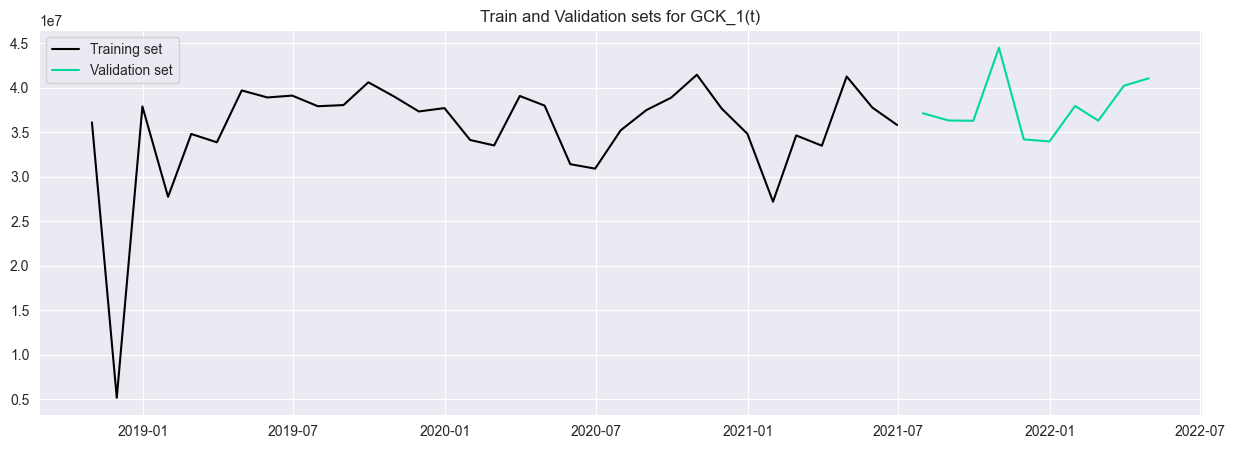

In [419]:
plotTrainValidation(products_dict_train['GCK_1']['y'],
                               y_val=products_dict_val['GCK_1']['y'])

<a class="anchor" id="subtitle8.2">
    
## 8.2. Validation Time Series Forecasting
    
</a>

In [420]:
# Extract all X and y dataframes of each product using map() and lambda function
X_train_list = list(map(lambda d: d['X'], products_dict_train.values()))
y_train_list = list(map(lambda d: d['y'], products_dict_train.values()))

X_val_list = list(map(lambda d: d['X'], products_dict_val.values()))
y_val_list = list(map(lambda d: d['y'], products_dict_val.values()))

In [421]:
# For each product, the models referred in products_models is tested.
# And the one with the least rmse on the validation dataset is printed.
estimators=[]

#list with all rmses and models names

for product,models in products_models.items():
    # Split the data into training and validation sets
    X_train = products_dict_train[product]['X']
    y_train = products_dict_train[product]['y']
    X_val = products_dict_val[product]['X']
    y_val = products_dict_val[product]['y']
    
    # Create an empty dictionary to store the forecasts for each model
    forecasts={}
    rmse_list=[]
    
    # Apply statistical models (if specified in `models`)

    if 'mean' in models:
        # Use the mean of the training data as a forecast
        forecasts['mean']= np.full(len(y_val),np.mean(y_train))
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['mean']))
        rmse_list.append(('mean',rmse))
        
    if 'median' in models:
        # Use the median of the training data as a forecast
        forecasts['median']= np.full(len(y_val),np.median(y_train))
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['median']))
        rmse_list.append(('median',rmse))
    
    if 'prophet' in models:
        # Use Facebook Prophet to make a forecast
        
        # mapping 'date' indexes as columns 'ds'.
        prophet_train_data=y_train.reset_index().rename(columns={'date':'ds',product+"(t)":"y"})
        prophet_val_data=y_val.reset_index().rename(columns={'date':'ds',product+"(t)":"y"})
        
        #prophet object is created with holidays feature being used. 
        prophet=Prophet(holidays=holidays_prophet)
        # fitting prophet with training data and regressors
        prophet.fit(prophet_train_data)
        #predicting validation data
        forecasts['prophet'] = prophet.predict(prophet_val_data)['yhat'].values
        
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['prophet']))
        rmse_list.append(('prophet',rmse))
        
    if 'prophet_w_reg' in models:
        # Use Facebook Prophet with exogenous regressors to make a forecast
        
        # Defining external variables. The lags of the product sales are not included.
        regressors_prophet = [regressor for regressor in X_train.columns if "GCK" not in regressor]
                
        # joining x and y features of train/validation, with columns date as 'ds' and product as 'y'
        prophet_train_data = y_train.merge(X_train[regressors_prophet], how='left', on="date").reset_index().rename(
            columns={'date': 'ds', product + "(t)": "y"})
        prophet_val_data = y_val.merge(X_val[regressors_prophet], how='left', on="date").reset_index().rename(
            columns={'date': 'ds', product + "(t)": "y"})
        
        #prophet object is created with holidays feature being used. 
        prophet_w_reg=Prophet(holidays=holidays_prophet)
        # Adding external variables as regressors. The lags of the product sales are not included.
        for regressor in regressors_prophet:
            if "GCK" not in regressor:
                prophet_w_reg.add_regressor(regressor)
                
        # fitting prophet with training data and regressors
        prophet_w_reg.fit(prophet_train_data)
        #predicting validation data
        forecasts['prophet_w_reg'] = prophet_w_reg.predict(prophet_val_data)['yhat'].values
        
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['prophet_w_reg']))
        rmse_list.append(('prophet_w_reg',rmse))

    if 'arima' in models:
        # Use Arima to make a forecast
        
        # fitting Arima with training datas
        arima = auto_arima(y_train,start_p=1,start_q=1, trace=False,stationary=True, 
                           steperror_action='ignore', suppress_warnings=True)
        # make prediction for the validation
        forecasts['arima'] = arima.predict(n_periods=10)
        
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['arima']))
        rmse_list.append(('arima',rmse))
        
    if 'arima_w_reg' in models:
        # Use Arima with exogenous regressors to make a forecast
        
        # Defining external variables. The lags of the product sales are not included.
        regressors_arima = [regressor for regressor in X_train.columns if "GCK" not in regressor]

        # fitting Arima with training data and regressors
        arima_w_reg = auto_arima(y_train, X_train[regressors_arima],start_p=1,start_q=1,stationary=True, trace=False, steperror_action='ignore', suppress_warnings=True)
        # make prediction for the validation
        forecasts['arima_w_reg'] = arima_w_reg.predict(n_periods=10, X=X_val[regressors_arima])
        
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['arima_w_reg']))
        rmse_list.append(('arima_w_reg',rmse))
        
    # Apply Machine Learning models (if specified in `models`)   
    
    if 'xgboost' in models:
        # Use XGBoost with exogenous regressors to make a forecast

        rmse_list_xgboost = []
        #Testing different parameters (hyperparameter tuning), and retrieving the model with the lowest rmse result on validation
        for n_estimators in [40,50,60,70,80,90,100]:
            for max_depth in [3, 5, 7,9,12]:
                for learning_rate in [0.1,0.2,0.3,0.4,0.5]:
                    # Drop null values, since this model uses the sales lag features
                    X_train_xgboost= X_train.dropna()
                    y_train_xgboost = y_train.loc[X_train_xgboost.index].copy()
                    xgboost_name= "xgboost("+str(n_estimators)+","+\
                        str(max_depth)+","+\
                        str(learning_rate)+")"
                    
                    xgboost=xgb.XGBRegressor(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)
                    # fit the model object to the training data
                    _,_,predictions = xgboostModel_predict_months(xgboost,X_train_xgboost,y_train_xgboost,len(X_val))
                    rmse_xgboost= np.sqrt(metrics.mean_squared_error(y_val, predictions))
                    rmse_list_xgboost.append((xgboost_name,xgboost, rmse_xgboost))
        
        # Find the xgboost with the lowest RMSE
        best_xgboost_name,best_xgboost, rmse = min(rmse_list_xgboost, key=lambda x: x[2])
        forecasts[best_xgboost_name] = best_xgboost.predict(X_val)
        
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts[best_xgboost_name]))
        rmse_list.append((best_xgboost_name,rmse))
        
    # Using the average of all models as forecasting method.
    if 'ensemble' in models:
        # List to store the RMSE for each combination of forecasts
        rmse_list_ensemble = []

        # Generate all possible combinations of the forecasts with more than 2 elements
        for i in range(2, len(forecasts.keys()) + 1):
            for combination in itertools.combinations(forecasts.keys(), i):
                ensemble_name= "ensemble["+';'.join(combination)+"]"
                    
                # Calculate the ensemble forecast for the current combination
                ensemble_forecast = sum(forecasts[forecast] for forecast in combination) / len(combination)
                    
                # Calculate the RMSE for the ensemble forecast
                rmse_ensemble = np.sqrt(metrics.mean_squared_error(y_val, ensemble_forecast))  
                # Add the RMSE to the list
                rmse_list_ensemble.append((combination,ensemble_name, rmse_ensemble))
                
        
        # Find the combination with the lowest RMSE
        best_combination,best_ensemble_name, rmse = min(rmse_list_ensemble, key=lambda x: x[2])
        # Calculate the final ensemble forecast using the best combination
        forecasts[best_ensemble_name] = sum(forecasts[forecast] for forecast in best_combination) / len(best_combination)
        
        
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts[best_ensemble_name]))
        rmse_list.append((best_ensemble_name,rmse))

    # Find the model with the lowest RMSE
    best_model_name, lowest_rmse = min(rmse_list, key=lambda x: x[1])
            
    print("Product",product,"best model:")
    print(best_model_name,"|RMSE:",lowest_rmse)
    
    products_dict_val[product]['pred_y']=pd.DataFrame(forecasts[best_model_name],index=y_val.index)
    estimators.append((product,best_model_name))

Product GCK_1 best model:
median |RMSE: 3117114.8338065054


22:06:43 - cmdstanpy - INFO - Chain [1] start processing
22:06:44 - cmdstanpy - INFO - Chain [1] done processing
22:06:44 - cmdstanpy - INFO - Chain [1] start processing
22:06:44 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_3 best model:
arima_w_reg |RMSE: 1841377.346238083


22:08:36 - cmdstanpy - INFO - Chain [1] start processing
22:08:37 - cmdstanpy - INFO - Chain [1] done processing
22:08:37 - cmdstanpy - INFO - Chain [1] start processing
22:08:38 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_4 best model:
arima |RMSE: 98954.2167888816


22:10:33 - cmdstanpy - INFO - Chain [1] start processing
22:10:34 - cmdstanpy - INFO - Chain [1] done processing
22:10:35 - cmdstanpy - INFO - Chain [1] start processing
22:10:35 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_5 best model:
ensemble[prophet;arima_w_reg;xgboost(40,3,0.4)] |RMSE: 3213732.041500123


22:12:29 - cmdstanpy - INFO - Chain [1] start processing
22:12:29 - cmdstanpy - INFO - Chain [1] done processing
22:12:30 - cmdstanpy - INFO - Chain [1] start processing
22:12:30 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_6 best model:
ensemble[prophet_w_reg;arima;arima_w_reg;xgboost(90,5,0.1)] |RMSE: 167023.64491878325


22:14:24 - cmdstanpy - INFO - Chain [1] start processing
22:14:24 - cmdstanpy - INFO - Chain [1] done processing
22:14:25 - cmdstanpy - INFO - Chain [1] start processing
22:14:25 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_8 best model:
ensemble[prophet;arima_w_reg] |RMSE: 534997.263591348


22:16:19 - cmdstanpy - INFO - Chain [1] start processing
22:16:20 - cmdstanpy - INFO - Chain [1] done processing
22:16:20 - cmdstanpy - INFO - Chain [1] start processing
22:16:20 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_9 best model:
arima |RMSE: 5551.012806754692


22:18:19 - cmdstanpy - INFO - Chain [1] start processing
22:18:19 - cmdstanpy - INFO - Chain [1] done processing
22:18:20 - cmdstanpy - INFO - Chain [1] start processing
22:18:20 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_11 best model:
ensemble[prophet;xgboost(50,3,0.1)] |RMSE: 659810.6227569813


22:20:16 - cmdstanpy - INFO - Chain [1] start processing
22:20:16 - cmdstanpy - INFO - Chain [1] done processing
22:20:16 - cmdstanpy - INFO - Chain [1] start processing
22:20:17 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_12 best model:
ensemble[prophet;prophet_w_reg;arima] |RMSE: 80513.70015305068


22:22:27 - cmdstanpy - INFO - Chain [1] start processing
22:22:27 - cmdstanpy - INFO - Chain [1] done processing
22:22:27 - cmdstanpy - INFO - Chain [1] start processing
22:22:28 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_13 best model:
ensemble[arima;xgboost(70,12,0.1)] |RMSE: 10050.27785658311


22:24:51 - cmdstanpy - INFO - Chain [1] start processing
22:24:51 - cmdstanpy - INFO - Chain [1] done processing
22:24:51 - cmdstanpy - INFO - Chain [1] start processing
22:24:52 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_14 best model:
arima_w_reg |RMSE: 22263.460469259888


22:27:09 - cmdstanpy - INFO - Chain [1] start processing
22:27:09 - cmdstanpy - INFO - Chain [1] done processing
22:27:10 - cmdstanpy - INFO - Chain [1] start processing
22:27:10 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_16 best model:
xgboost(40,7,0.4) |RMSE: 71040.41738945978


22:29:08 - cmdstanpy - INFO - Chain [1] start processing
22:29:08 - cmdstanpy - INFO - Chain [1] done processing
22:29:09 - cmdstanpy - INFO - Chain [1] start processing
22:29:09 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_20 best model:
arima_w_reg |RMSE: 1122.1817672397249


22:31:00 - cmdstanpy - INFO - Chain [1] start processing
22:31:00 - cmdstanpy - INFO - Chain [1] done processing
22:31:01 - cmdstanpy - INFO - Chain [1] start processing
22:31:01 - cmdstanpy - INFO - Chain [1] done processing


Product GCK_36 best model:
ensemble[arima;xgboost(40,3,0.4)] |RMSE: 14507.539453974514


<a class="anchor" id="subtitle8.3">
    
## 8.3. Test Time Series Forecasting
    
</a>

In [422]:
X_train_list=[]
X_test_list=[]
y_train_list=[]
y_test_list=[]
train_dict={}
for product in sales_data.columns:
    columns_sales= [column for column in sales_data_lagged if (product+"(") in column]
    train_dict[product]= sales_data_lagged[columns_sales]
    
    # filter column already chosen in Feature selection
    columns_market= [column for column in products_dict_final[product] if 'GCK' not in column]
    train_dict[product] = train_dict[product].merge(market_data_lagged[columns_market],how="left",on="date")
    train_dict[product].index.name="date"
    X_train= train_dict[product].drop(product+"(t)",axis=1)
    y_train= train_dict[product][[product+"(t)"]]
    X_train,y_train,_ = xgboostModel_predict_months(xgboost,X_train,y_train,10)
    
    X_train.index.name="date"
    y_train.index.name="date"
    X_train_list.append(X_train.iloc[:-10,:])
    X_test_list.append(X_train.iloc[-10:,:])
    y_train_list.append(y_train.iloc[:-10,:])
    y_test_list.append(y_train.iloc[-10:,:])

In [423]:
final_ensemble= ProductsEnsemble(estimators,holidays_prophet) 
final_predictions = final_ensemble.fit_predict_all(X_train_list,y_train_list,X_test_list,y_test_list)

22:33:20 - cmdstanpy - INFO - Chain [1] start processing
22:33:20 - cmdstanpy - INFO - Chain [1] done processing
22:33:21 - cmdstanpy - INFO - Chain [1] start processing
22:33:22 - cmdstanpy - INFO - Chain [1] done processing
22:33:22 - cmdstanpy - INFO - Chain [1] start processing
22:33:22 - cmdstanpy - INFO - Chain [1] done processing
22:33:24 - cmdstanpy - INFO - Chain [1] start processing
22:33:25 - cmdstanpy - INFO - Chain [1] done processing
22:33:26 - cmdstanpy - INFO - Chain [1] start processing
22:33:26 - cmdstanpy - INFO - Chain [1] done processing
22:33:28 - cmdstanpy - INFO - Chain [1] start processing
22:33:28 - cmdstanpy - INFO - Chain [1] done processing
22:33:29 - cmdstanpy - INFO - Chain [1] start processing
22:33:29 - cmdstanpy - INFO - Chain [1] done processing


In [424]:
test_data_export=test_data.copy()
test_data_manipulation=test_data.copy()
test_data_manipulation['Month Year']=test_data_manipulation['Month Year'].str.replace("/","-")
test_data_manipulation['Month Year'] = pd.to_datetime(test_data_manipulation['Month Year'],format="%b-%y")+pd.offsets.MonthEnd(1)
# Mappig Mapped_GCK values to GCK_number
test_data_manipulation['Mapped_GCK'] = "GCK_"+test_data_manipulation['Mapped_GCK'].str.replace('#', '')

In [425]:
values_to_input=[]
for key,row in test_data_manipulation.iterrows():
    index = list(train_dict.keys()).index(row['Mapped_GCK'])
    values_to_input.append(final_predictions[index].loc[row['Month Year'],0])

In [426]:
test_data_export['Sales_EUR']=values_to_input

In [427]:
test_data_export.to_csv('Case3_Test Set.csv',sep=";",index=False)

<hr>
<a class="anchor" id="title9">
    
# 9. Evaluation
    
</a>

<a class="anchor" id="gck1">
    
## Product Group 1
    
</a>

In [428]:
product_to_evaluate='GCK_1'

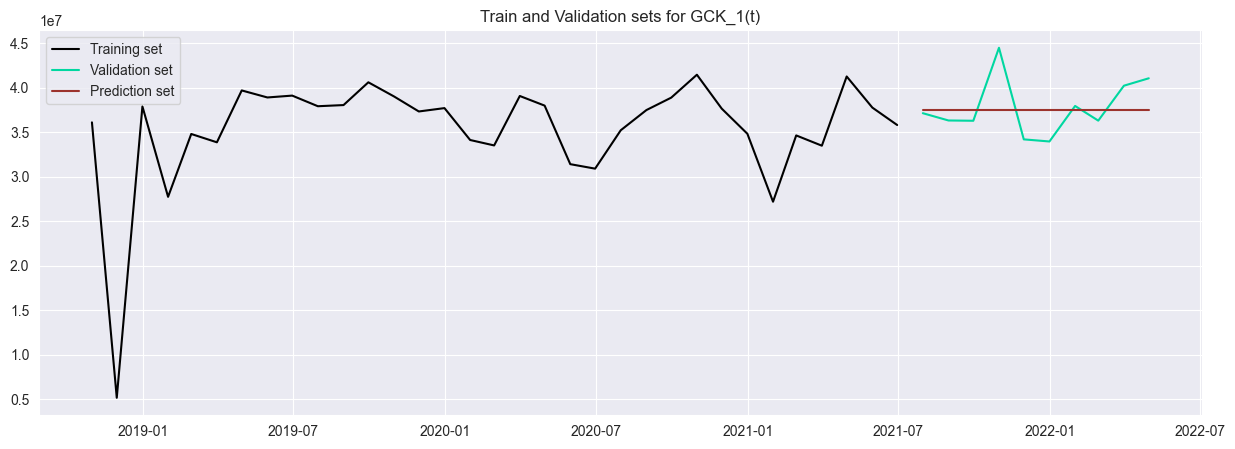

In [429]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [430]:
# Show performance results
resultsDF = performanceMetricsDF(metrics,
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure         Test
0        MAE  2451348.726
1       RMSE  3117114.834
2        R^2       -0.010
3   MAPE (%)        0.063
4  MAX Error  7000928.280

<a class="anchor" id="evaluation_gck3">
    
## Product Group 3
    
</a>

In [431]:
product_to_evaluate='GCK_3'

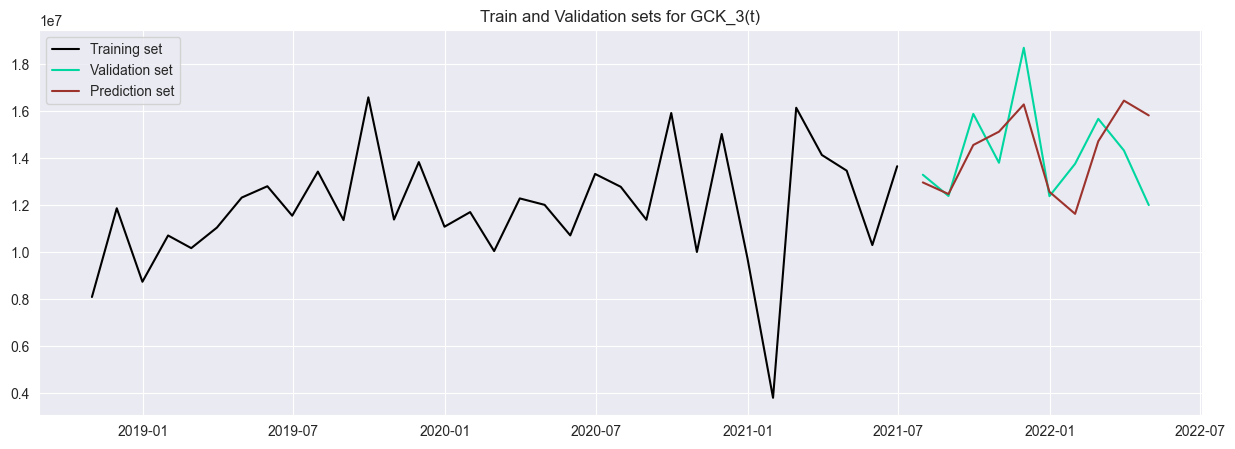

In [432]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [433]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure         Test
0        MAE  1465754.498
1       RMSE  1841377.346
2        R^2        0.102
3   MAPE (%)        0.104
4  MAX Error  3812498.883

<a class="anchor" id="evaluation_gck4">
    
## Product Group 4
    
</a>

In [434]:
product_to_evaluate='GCK_4'

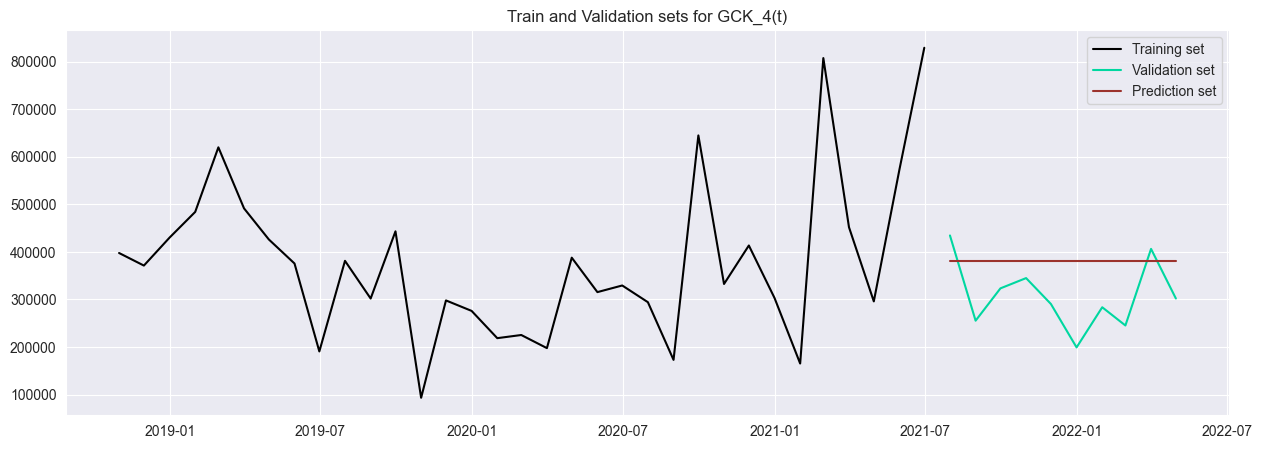

In [435]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [436]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure        Test
0        MAE   87690.941
1       RMSE   98954.217
2        R^2      -1.092
3   MAPE (%)       0.332
4  MAX Error  180861.904

<a class="anchor" id="evaluation_gck5">
    
## Product Group 5
    
</a>

In [437]:
product_to_evaluate='GCK_5'

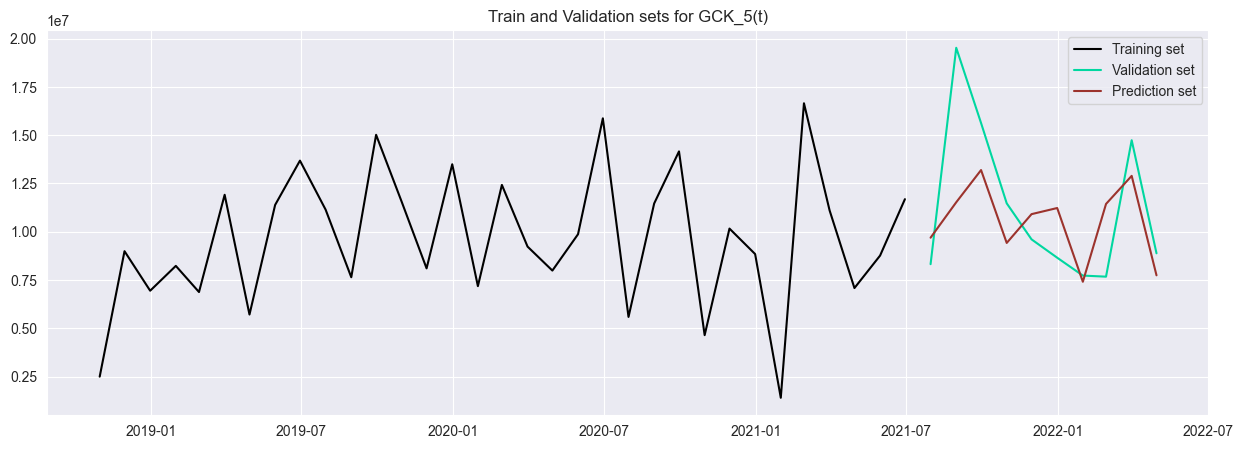

In [438]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [439]:
# Show performance results
resultsDF = performanceMetricsDF(metrics,
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure         Test
0        MAE  2480223.900
1       RMSE  3213732.042
2        R^2        0.305
3   MAPE (%)        0.213
4  MAX Error  7998087.521

<a class="anchor" id="evaluation_gck6">
    
## Product Group 6
    
</a>

In [440]:
product_to_evaluate='GCK_6'

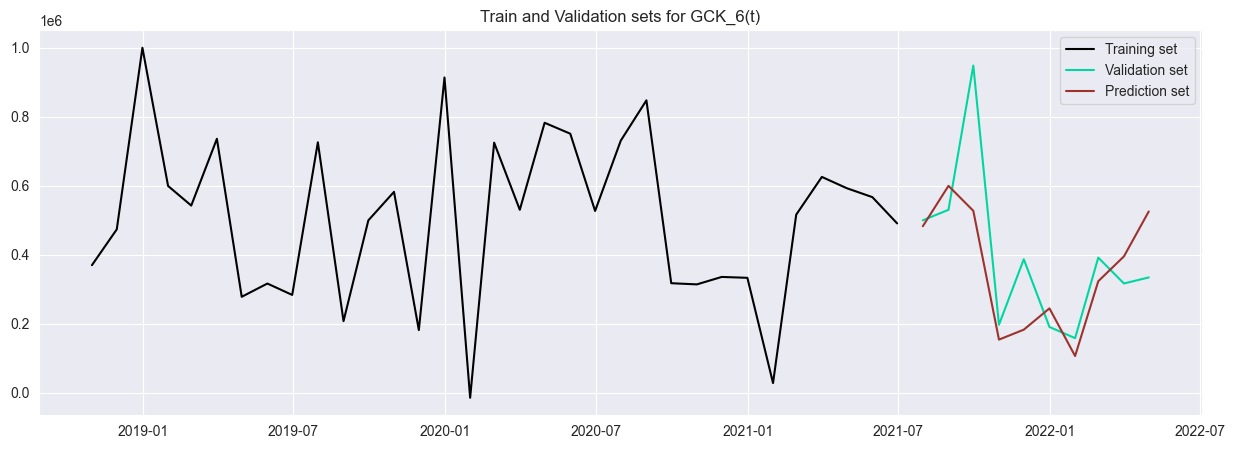

In [441]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [442]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure        Test
0        MAE  119884.206
1       RMSE  167023.645
2        R^2       0.422
3   MAPE (%)       0.297
4  MAX Error  421066.494

<a class="anchor" id="evaluation_gck8">
    
## Product Group 8
    
</a>

In [443]:
product_to_evaluate='GCK_8'

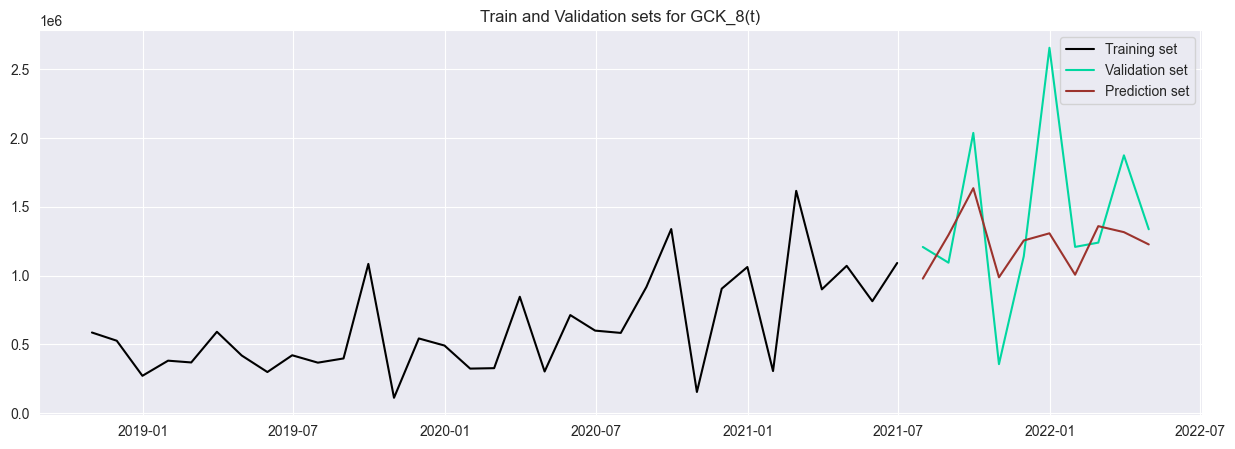

In [444]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [445]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure         Test
0        MAE   391619.941
1       RMSE   534997.264
2        R^2        0.195
3   MAPE (%)        0.359
4  MAX Error  1348219.419

<a class="anchor" id="evaluation_gck9">
    
## Product Group 9
    
</a>

In [446]:
product_to_evaluate='GCK_9'

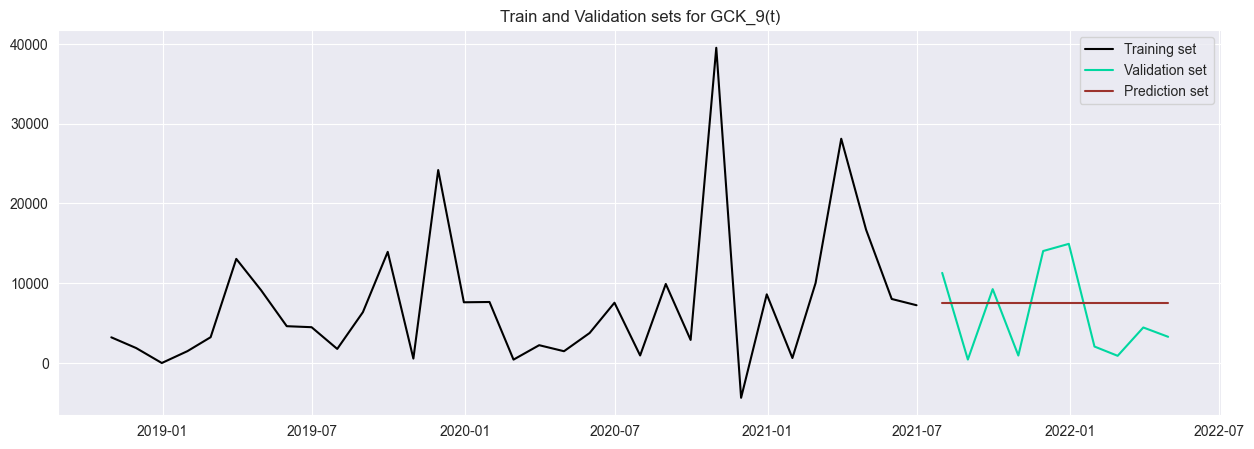

In [447]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [448]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure      Test
0        MAE  5241.337
1       RMSE  5551.013
2        R^2    -0.060
3   MAPE (%)     3.667
4  MAX Error  7454.959

<a class="anchor" id="evaluation_gck11">
    
## Product Group 11
    
</a>

In [449]:
product_to_evaluate='GCK_11'

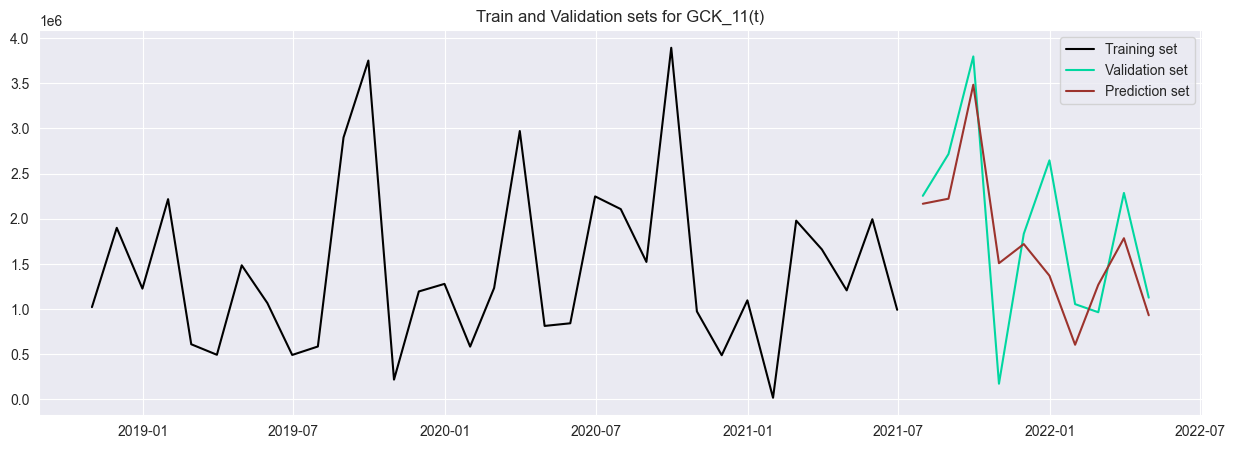

In [450]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [451]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure         Test
0        MAE   506768.481
1       RMSE   659810.623
2        R^2        0.576
3   MAPE (%)        0.966
4  MAX Error  1333714.510

<a class="anchor" id="evaluation_gck12">
    
## Product Group 12
    
</a>

In [452]:
product_to_evaluate='GCK_12'

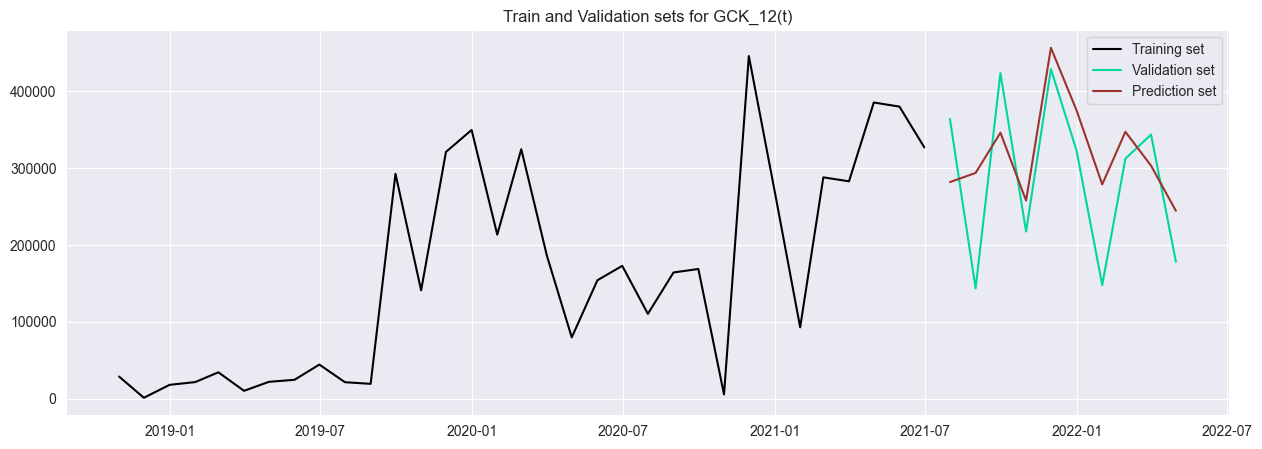

In [453]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [454]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure        Test
0        MAE   70267.651
1       RMSE   80513.700
2        R^2       0.391
3   MAPE (%)       0.336
4  MAX Error  150190.809

<a class="anchor" id="evaluation_gck13">
    
## Product Group 13
    
</a>

In [455]:
product_to_evaluate='GCK_13'

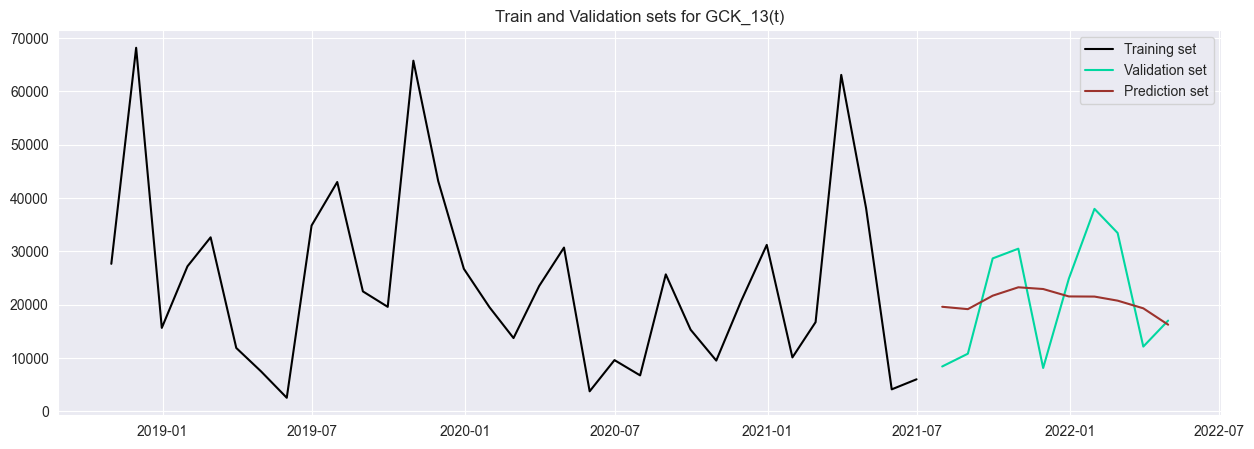

In [456]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [457]:
# Show performance results
resultsDF = performanceMetricsDF(metrics,
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure       Test
0        MAE   8896.890
1       RMSE  10050.278
2        R^2      0.105
3   MAPE (%)      0.598
4  MAX Error  16445.754

<a class="anchor" id="evaluation_gck14">
    
## Product Group 14
    
</a>

In [458]:
product_to_evaluate='GCK_14'

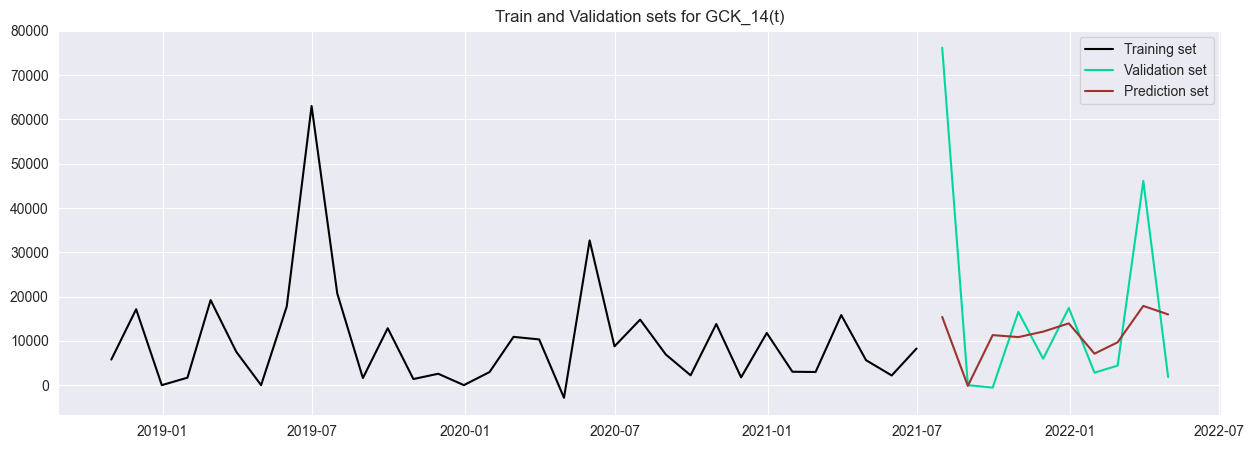

In [459]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [460]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure          Test
0        MAE  1.399788e+04
1       RMSE  2.226346e+04
2        R^2  1.240000e-01
3   MAPE (%)  7.320417e+16
4  MAX Error  6.076472e+04

<a class="anchor" id="evaluation_gck16">
    
## Product Group 16
    
</a>

In [461]:
product_to_evaluate='GCK_16'

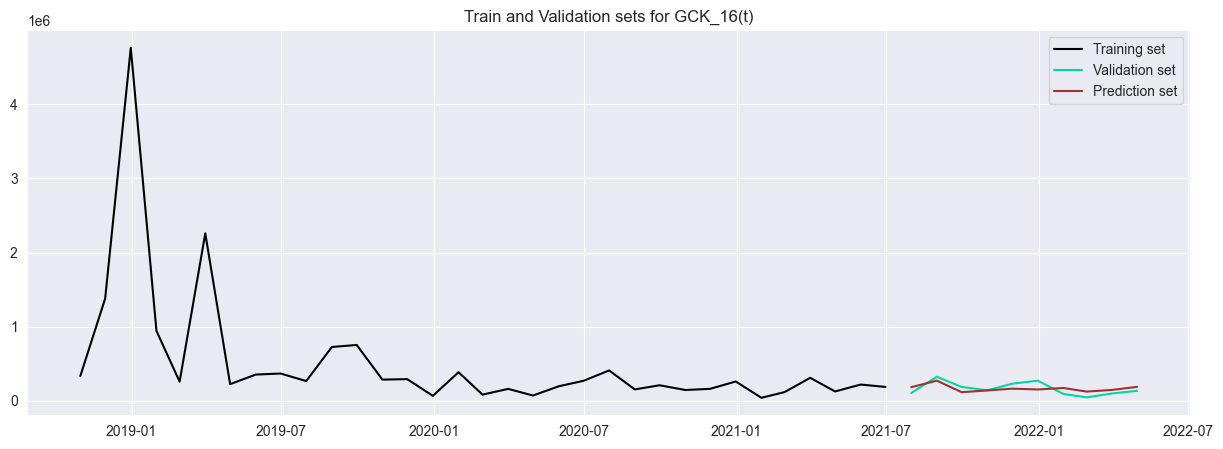

In [462]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [463]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, 
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure        Test
0        MAE   65073.207
1       RMSE   71040.417
2        R^2       0.283
3   MAPE (%)       0.554
4  MAX Error  118490.031

<a class="anchor" id="evaluation_gck20">
    
## Product Group 20
    
</a>

In [464]:
product_to_evaluate='GCK_20'

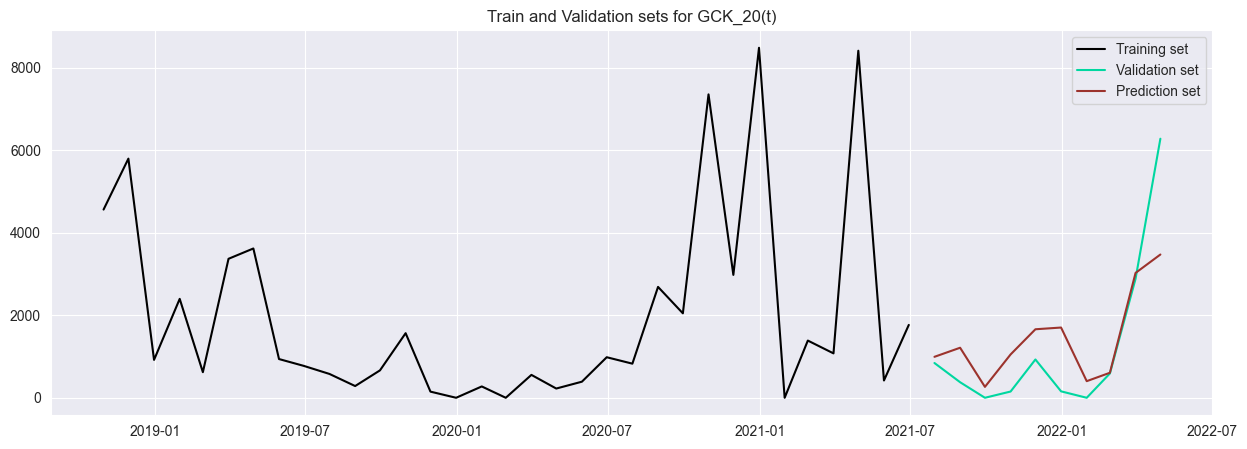

In [465]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [466]:
# Show performance results
resultsDF = performanceMetricsDF(metrics,
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure          Test
0        MAE  7.797720e+02
1       RMSE  1.122182e+03
2        R^2  6.400000e-01
3   MAPE (%)  3.005906e+17
4  MAX Error  2.807482e+03

<a class="anchor" id="evaluation_gck36">
    
## Product Group 36
    
</a>

In [467]:
product_to_evaluate='GCK_36'

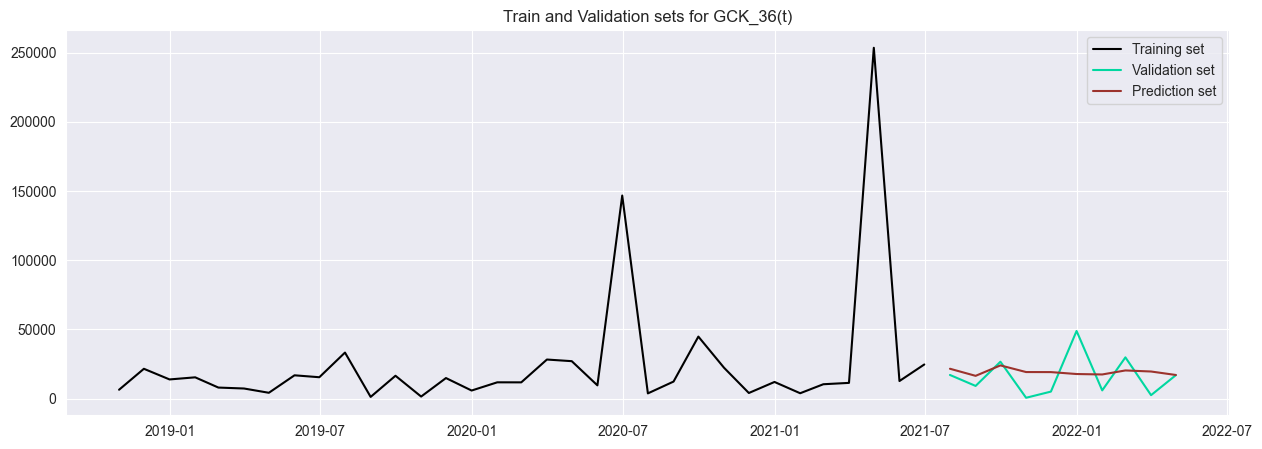

In [468]:
plotTrainValidation(products_dict_train[product_to_evaluate]['y'],
                    y_val=products_dict_val[product_to_evaluate]['y'],
                    y_pred=products_dict_val[product_to_evaluate]['pred_y']
                   )

In [469]:
# Show performance results
resultsDF = performanceMetricsDF(metrics,
                                 yTest=products_dict_val[product_to_evaluate]['y'], 
                                 yPredTest=products_dict_val[product_to_evaluate]['pred_y'])
resultsDF

Measure       Test
0        MAE  11635.373
1       RMSE  14507.539
2        R^2     -0.016
3   MAPE (%)      4.100
4  MAX Error  31097.764